In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

import os, sys
sys.path.append(os.path.join("../../../"))

# our library
from src.mcmc_sat import mcmc, sat

In [2]:
def gen_conf_matrix(y: np.ndarray):
    """
    Simple function to generate the configuration matrix for variable number of roads
    """
    num_vers = y.size+1
    num_pathways = num_vers-1

    pathways = []
    for i in range(1,num_vers+1):
        for j in range(1,num_vers+1):
            if i < j:
                pathways += [(i,j)]

    print(pathways)

    return np.array([[ 1 if (p1<=i and i<p2) else 0 for (p1,p2) in pathways] for i in range(1, num_pathways+1)])    

In [3]:
A = np.array([[1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
[0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
[0,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
[0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0],
[0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0],
[0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1]])

y=np.array([1087, 1008, 1068, 1204, 1158, 1151, 1143])

In [4]:
num_con = 3
yprime  = y[:num_con] #np.array([4*int(i/10) for i in y[:num_con]]) 
Aprime  = gen_conf_matrix(yprime)


print(Aprime)
print(yprime)
print([sum(x) for x in Aprime])

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
[[1 1 1 0 0 0]
 [0 1 1 1 1 0]
 [0 0 1 0 1 1]]
[1087 1008 1068]
[3, 4, 3]


In [5]:
trace = mcmc.sample_mh_trace_from_conf_matrix_sat(A=Aprime,y=yprime,
                                                  num_bits=11,
                                                  max_int_bv=2**9,
                                                  num_samples=10000)

Using default filename: "spur_input/samples_z3_problem.txt"
Performing Uniform Model Sampling...
Input File:  spur_input/z3_problem.cnf
Output File: spur_input/samples_z3_problem.txt

Preprocessing ... DONE
variables (all/used/free): 	660/660/0
independent support size:  	0
clauses (all/long/binary/unit): 2769/2111/634/24
Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	354 MB

STAGE #1: Build the initial partial assignments



time elapsed: 60.5592s



time elapsed: 121.559s



time elapsed: 182.559s



time elapsed: 243.559s


STAGE #1: COMPLETED building initial partial assignments
STAGE #2 - Filling in partial assignments...


Initialize cache
Size of Cacheable Component:	56
Size of MPZ Class:	16
Maximum cache size:	354 MB



Completing sample #1 of 9156 which has 94 variables unset and 1 sample.
Completing sample #2 of 9156 which has 62 variables unset and 1 sample.
Completing sample #3 of 9156 which has 68 variables unset and 1 sample.
Completing sample #4 of 9156 which has 17 variables unset and 1 sample.
Completing sample #5 of 9156 which has 51 variables unset and 1 sample.
Completing sample #6 of 9156 which has 136 variables unset and 1 sample.
Completing sample #7 of 9156 which has 74 variables unset and 1 sample.
Completing sample #8 of 9156 which has 66 variables unset and 1 sample.
Completing sample #9 of 9156 which has 117 variables unset and 1 sample.
Completing sample #10 of 9156 which has 105 variables unset and 1 sample.
Completing sample #11 of 9156 which has 19 variables unset and 1 sample.
Completing sample #12 of 9156 which has 47 variables unset and 1 sample.
Completing sample #13 of 9156 which has 34 variables unset and 1 sample.
Completing sample #14 of 9156 which has 89 variables unse

Completing sample #54 of 9156 which has 187 variables unset and 1 sample.
Completing sample #55 of 9156 which has 135 variables unset and 1 sample.
Completing sample #56 of 9156 which has 43 variables unset and 1 sample.
Completing sample #57 of 9156 which has 125 variables unset and 1 sample.
Completing sample #58 of 9156 which has 86 variables unset and 2 samples.
Completing sample #59 of 9156 which has 182 variables unset and 1 sample.
Completing sample #60 of 9156 which has 154 variables unset and 1 sample.
Completing sample #61 of 9156 which has 29 variables unset and 2 samples.
Completing sample #62 of 9156 which has 159 variables unset and 1 sample.
Completing sample #63 of 9156 which has 130 variables unset and 1 sample.
Completing sample #64 of 9156 which has 169 variables unset and 1 sample.
Completing sample #65 of 9156 which has 171 variables unset and 1 sample.
Completing sample #66 of 9156 which has 112 variables unset and 1 sample.
Completing sample #67 of 9156 which has

Completing sample #93 of 9156 which has 176 variables unset and 1 sample.
Completing sample #94 of 9156 which has 99 variables unset and 1 sample.
Completing sample #95 of 9156 which has 72 variables unset and 1 sample.
Completing sample #96 of 9156 which has 149 variables unset and 1 sample.
Completing sample #97 of 9156 which has 126 variables unset and 1 sample.
Completing sample #98 of 9156 which has 126 variables unset and 1 sample.
Completing sample #99 of 9156 which has 109 variables unset and 1 sample.
Completing sample #100 of 9156 which has 165 variables unset and 1 sample.
Completing sample #101 of 9156 which has 146 variables unset and 1 sample.
Completing sample #102 of 9156 which has 144 variables unset and 1 sample.
Completing sample #103 of 9156 which has 178 variables unset and 1 sample.
Completing sample #104 of 9156 which has 182 variables unset and 2 samples.
Completing sample #105 of 9156 which has 84 variables unset and 1 sample.
Completing sample #106 of 9156 whi

Completing sample #145 of 9156 which has 154 variables unset and 1 sample.
Completing sample #146 of 9156 which has 185 variables unset and 1 sample.
Completing sample #147 of 9156 which has 98 variables unset and 1 sample.
Completing sample #148 of 9156 which has 183 variables unset and 1 sample.
Completing sample #149 of 9156 which has 92 variables unset and 1 sample.
Completing sample #150 of 9156 which has 119 variables unset and 1 sample.
Completing sample #151 of 9156 which has 146 variables unset and 1 sample.
Completing sample #152 of 9156 which has 182 variables unset and 1 sample.
Completing sample #153 of 9156 which has 110 variables unset and 1 sample.
Completing sample #154 of 9156 which has 110 variables unset and 1 sample.
Completing sample #155 of 9156 which has 232 variables unset and 2 samples.
Completing sample #156 of 9156 which has 144 variables unset and 1 sample.
Completing sample #157 of 9156 which has 129 variables unset and 1 sample.
Completing sample #158 of 

Completing sample #185 of 9156 which has 207 variables unset and 1 sample.
Completing sample #186 of 9156 which has 137 variables unset and 1 sample.
Completing sample #187 of 9156 which has 136 variables unset and 1 sample.
Completing sample #188 of 9156 which has 109 variables unset and 1 sample.
Completing sample #189 of 9156 which has 151 variables unset and 1 sample.
Completing sample #190 of 9156 which has 243 variables unset and 2 samples.
Completing sample #191 of 9156 which has 191 variables unset and 1 sample.
Completing sample #192 of 9156 which has 28 variables unset and 1 sample.
Completing sample #193 of 9156 which has 101 variables unset and 1 sample.
Completing sample #194 of 9156 which has 83 variables unset and 1 sample.
Completing sample #195 of 9156 which has 167 variables unset and 1 sample.
Completing sample #196 of 9156 which has 137 variables unset and 1 sample.
Completing sample #197 of 9156 which has 129 variables unset and 1 sample.
Completing sample #198 of 

Completing sample #238 of 9156 which has 164 variables unset and 1 sample.
Completing sample #239 of 9156 which has 199 variables unset and 1 sample.
Completing sample #240 of 9156 which has 210 variables unset and 1 sample.
Completing sample #241 of 9156 which has 107 variables unset and 1 sample.
Completing sample #242 of 9156 which has 126 variables unset and 1 sample.
Completing sample #243 of 9156 which has 156 variables unset and 1 sample.
Completing sample #244 of 9156 which has 180 variables unset and 1 sample.
Completing sample #245 of 9156 which has 215 variables unset and 1 sample.
Completing sample #246 of 9156 which has 79 variables unset and 1 sample.
Completing sample #247 of 9156 which has 161 variables unset and 1 sample.
Completing sample #248 of 9156 which has 48 variables unset and 1 sample.
Completing sample #249 of 9156 which has 154 variables unset and 2 samples.
Completing sample #250 of 9156 which has 106 variables unset and 1 sample.
Completing sample #251 of 

Completing sample #292 of 9156 which has 149 variables unset and 1 sample.
Completing sample #293 of 9156 which has 162 variables unset and 1 sample.
Completing sample #294 of 9156 which has 156 variables unset and 1 sample.
Completing sample #295 of 9156 which has 63 variables unset and 1 sample.
Completing sample #296 of 9156 which has 110 variables unset and 1 sample.
Completing sample #297 of 9156 which has 21 variables unset and 1 sample.
Completing sample #298 of 9156 which has 72 variables unset and 1 sample.
Completing sample #299 of 9156 which has 112 variables unset and 1 sample.
Completing sample #300 of 9156 which has 62 variables unset and 1 sample.
Completing sample #301 of 9156 which has 84 variables unset and 1 sample.
Completing sample #302 of 9156 which has 118 variables unset and 1 sample.
Completing sample #303 of 9156 which has 15 variables unset and 1 sample.
Completing sample #304 of 9156 which has 178 variables unset and 1 sample.
Completing sample #305 of 9156 

Completing sample #347 of 9156 which has 196 variables unset and 1 sample.
Completing sample #348 of 9156 which has 180 variables unset and 1 sample.
Completing sample #349 of 9156 which has 100 variables unset and 1 sample.
Completing sample #350 of 9156 which has 211 variables unset and 1 sample.
Completing sample #351 of 9156 which has 206 variables unset and 1 sample.
Completing sample #352 of 9156 which has 146 variables unset and 1 sample.
Completing sample #353 of 9156 which has 107 variables unset and 1 sample.
Completing sample #354 of 9156 which has 105 variables unset and 1 sample.
Completing sample #355 of 9156 which has 201 variables unset and 1 sample.
Completing sample #356 of 9156 which has 134 variables unset and 1 sample.
Completing sample #357 of 9156 which has 78 variables unset and 1 sample.
Completing sample #358 of 9156 which has 219 variables unset and 1 sample.
Completing sample #359 of 9156 which has 167 variables unset and 1 sample.
Completing sample #360 of 

Completing sample #399 of 9156 which has 88 variables unset and 1 sample.
Completing sample #400 of 9156 which has 158 variables unset and 1 sample.
Completing sample #401 of 9156 which has 169 variables unset and 1 sample.
Completing sample #402 of 9156 which has 33 variables unset and 1 sample.
Completing sample #403 of 9156 which has 110 variables unset and 1 sample.
Completing sample #404 of 9156 which has 212 variables unset and 1 sample.
Completing sample #405 of 9156 which has 138 variables unset and 1 sample.
Completing sample #406 of 9156 which has 211 variables unset and 1 sample.
Completing sample #407 of 9156 which has 118 variables unset and 1 sample.
Completing sample #408 of 9156 which has 190 variables unset and 1 sample.
Completing sample #409 of 9156 which has 76 variables unset and 1 sample.
Completing sample #410 of 9156 which has 189 variables unset and 1 sample.
Completing sample #411 of 9156 which has 42 variables unset and 1 sample.
Completing sample #412 of 915

Completing sample #430 of 9156 which has 69 variables unset and 1 sample.
Completing sample #431 of 9156 which has 204 variables unset and 1 sample.
Completing sample #432 of 9156 which has 156 variables unset and 1 sample.
Completing sample #433 of 9156 which has 169 variables unset and 1 sample.
Completing sample #434 of 9156 which has 225 variables unset and 1 sample.
Completing sample #435 of 9156 which has 157 variables unset and 1 sample.
Completing sample #436 of 9156 which has 172 variables unset and 1 sample.
Completing sample #437 of 9156 which has 175 variables unset and 1 sample.
Completing sample #438 of 9156 which has 158 variables unset and 2 samples.
Completing sample #439 of 9156 which has 145 variables unset and 2 samples.
Completing sample #440 of 9156 which has 174 variables unset and 1 sample.
Completing sample #441 of 9156 which has 179 variables unset and 1 sample.
Completing sample #442 of 9156 which has 101 variables unset and 1 sample.
Completing sample #443 o

Completing sample #456 of 9156 which has 251 variables unset and 2 samples.
Completing sample #457 of 9156 which has 191 variables unset and 1 sample.
Completing sample #458 of 9156 which has 176 variables unset and 1 sample.
Completing sample #459 of 9156 which has 42 variables unset and 2 samples.
Completing sample #460 of 9156 which has 167 variables unset and 1 sample.
Completing sample #461 of 9156 which has 157 variables unset and 1 sample.
Completing sample #462 of 9156 which has 121 variables unset and 2 samples.
Completing sample #463 of 9156 which has 164 variables unset and 1 sample.
Completing sample #464 of 9156 which has 160 variables unset and 2 samples.
Completing sample #465 of 9156 which has 161 variables unset and 1 sample.
Completing sample #466 of 9156 which has 107 variables unset and 1 sample.
Completing sample #467 of 9156 which has 183 variables unset and 1 sample.
Completing sample #468 of 9156 which has 78 variables unset and 1 sample.
Completing sample #469 

Completing sample #480 of 9156 which has 65 variables unset and 1 sample.
Completing sample #481 of 9156 which has 124 variables unset and 1 sample.
Completing sample #482 of 9156 which has 23 variables unset and 4 samples.
Completing sample #483 of 9156 which has 85 variables unset and 1 sample.
Completing sample #484 of 9156 which has 114 variables unset and 1 sample.
Completing sample #485 of 9156 which has 75 variables unset and 1 sample.
Completing sample #486 of 9156 which has 97 variables unset and 1 sample.
Completing sample #487 of 9156 which has 104 variables unset and 1 sample.
Completing sample #488 of 9156 which has 152 variables unset and 1 sample.
Completing sample #489 of 9156 which has 97 variables unset and 1 sample.
Completing sample #490 of 9156 which has 173 variables unset and 1 sample.
Completing sample #491 of 9156 which has 138 variables unset and 1 sample.
Completing sample #492 of 9156 which has 182 variables unset and 1 sample.
Completing sample #493 of 9156

Completing sample #534 of 9156 which has 51 variables unset and 1 sample.
Completing sample #535 of 9156 which has 233 variables unset and 1 sample.
Completing sample #536 of 9156 which has 106 variables unset and 1 sample.
Completing sample #537 of 9156 which has 148 variables unset and 1 sample.
Completing sample #538 of 9156 which has 91 variables unset and 1 sample.
Completing sample #539 of 9156 which has 29 variables unset and 1 sample.
Completing sample #540 of 9156 which has 153 variables unset and 1 sample.
Completing sample #541 of 9156 which has 225 variables unset and 1 sample.
Completing sample #542 of 9156 which has 139 variables unset and 1 sample.
Completing sample #543 of 9156 which has 196 variables unset and 1 sample.
Completing sample #544 of 9156 which has 138 variables unset and 1 sample.
Completing sample #545 of 9156 which has 241 variables unset and 1 sample.
Completing sample #546 of 9156 which has 73 variables unset and 1 sample.
Completing sample #547 of 915

Completing sample #589 of 9156 which has 114 variables unset and 1 sample.
Completing sample #590 of 9156 which has 86 variables unset and 1 sample.
Completing sample #591 of 9156 which has 126 variables unset and 1 sample.
Completing sample #592 of 9156 which has 100 variables unset and 1 sample.
Completing sample #593 of 9156 which has 91 variables unset and 1 sample.
Completing sample #594 of 9156 which has 67 variables unset and 1 sample.
Completing sample #595 of 9156 which has 105 variables unset and 1 sample.
Completing sample #596 of 9156 which has 23 variables unset and 2 samples.
Completing sample #597 of 9156 which has 147 variables unset and 1 sample.
Completing sample #598 of 9156 which has 101 variables unset and 1 sample.
Completing sample #599 of 9156 which has 97 variables unset and 1 sample.
Completing sample #600 of 9156 which has 83 variables unset and 1 sample.
Completing sample #601 of 9156 which has 75 variables unset and 1 sample.
Completing sample #602 of 9156 

Completing sample #637 of 9156 which has 310 variables unset and 1 sample.
Completing sample #638 of 9156 which has 127 variables unset and 1 sample.
Completing sample #639 of 9156 which has 163 variables unset and 1 sample.
Completing sample #640 of 9156 which has 47 variables unset and 1 sample.
Completing sample #641 of 9156 which has 162 variables unset and 1 sample.
Completing sample #642 of 9156 which has 219 variables unset and 1 sample.
Completing sample #643 of 9156 which has 212 variables unset and 1 sample.
Completing sample #644 of 9156 which has 214 variables unset and 1 sample.
Completing sample #645 of 9156 which has 117 variables unset and 1 sample.
Completing sample #646 of 9156 which has 197 variables unset and 1 sample.
Completing sample #647 of 9156 which has 159 variables unset and 1 sample.
Completing sample #648 of 9156 which has 198 variables unset and 1 sample.
Completing sample #649 of 9156 which has 166 variables unset and 1 sample.
Completing sample #650 of 

Completing sample #687 of 9156 which has 122 variables unset and 1 sample.
Completing sample #688 of 9156 which has 133 variables unset and 1 sample.
Completing sample #689 of 9156 which has 140 variables unset and 1 sample.
Completing sample #690 of 9156 which has 139 variables unset and 1 sample.
Completing sample #691 of 9156 which has 163 variables unset and 1 sample.
Completing sample #692 of 9156 which has 83 variables unset and 1 sample.
Completing sample #693 of 9156 which has 131 variables unset and 1 sample.
Completing sample #694 of 9156 which has 119 variables unset and 1 sample.
Completing sample #695 of 9156 which has 86 variables unset and 1 sample.
Completing sample #696 of 9156 which has 34 variables unset and 1 sample.
Completing sample #697 of 9156 which has 84 variables unset and 1 sample.
Completing sample #698 of 9156 which has 82 variables unset and 1 sample.
Completing sample #699 of 9156 which has 59 variables unset and 1 sample.
Completing sample #700 of 9156 

Completing sample #744 of 9156 which has 114 variables unset and 1 sample.
Completing sample #745 of 9156 which has 52 variables unset and 2 samples.
Completing sample #746 of 9156 which has 100 variables unset and 1 sample.
Completing sample #747 of 9156 which has 100 variables unset and 1 sample.
Completing sample #748 of 9156 which has 126 variables unset and 1 sample.
Completing sample #749 of 9156 which has 196 variables unset and 1 sample.
Completing sample #750 of 9156 which has 133 variables unset and 1 sample.
Completing sample #751 of 9156 which has 97 variables unset and 1 sample.
Completing sample #752 of 9156 which has 105 variables unset and 1 sample.
Completing sample #753 of 9156 which has 113 variables unset and 1 sample.
Completing sample #754 of 9156 which has 167 variables unset and 1 sample.
Completing sample #755 of 9156 which has 198 variables unset and 1 sample.
Completing sample #756 of 9156 which has 224 variables unset and 1 sample.
Completing sample #757 of 

Completing sample #791 of 9156 which has 199 variables unset and 1 sample.
Completing sample #792 of 9156 which has 83 variables unset and 1 sample.
Completing sample #793 of 9156 which has 148 variables unset and 1 sample.
Completing sample #794 of 9156 which has 222 variables unset and 1 sample.
Completing sample #795 of 9156 which has 144 variables unset and 1 sample.
Completing sample #796 of 9156 which has 189 variables unset and 1 sample.
Completing sample #797 of 9156 which has 140 variables unset and 1 sample.
Completing sample #798 of 9156 which has 163 variables unset and 1 sample.
Completing sample #799 of 9156 which has 81 variables unset and 1 sample.
Completing sample #800 of 9156 which has 184 variables unset and 2 samples.
Completing sample #801 of 9156 which has 184 variables unset and 1 sample.
Completing sample #802 of 9156 which has 133 variables unset and 1 sample.
Completing sample #803 of 9156 which has 261 variables unset and 1 sample.
Completing sample #804 of 

Completing sample #838 of 9156 which has 156 variables unset and 1 sample.
Completing sample #839 of 9156 which has 143 variables unset and 2 samples.
Completing sample #840 of 9156 which has 194 variables unset and 1 sample.
Completing sample #841 of 9156 which has 236 variables unset and 1 sample.
Completing sample #842 of 9156 which has 261 variables unset and 3 samples.
Completing sample #843 of 9156 which has 169 variables unset and 1 sample.
Completing sample #844 of 9156 which has 206 variables unset and 1 sample.
Completing sample #845 of 9156 which has 206 variables unset and 1 sample.
Completing sample #846 of 9156 which has 219 variables unset and 1 sample.
Completing sample #847 of 9156 which has 169 variables unset and 1 sample.
Completing sample #848 of 9156 which has 182 variables unset and 1 sample.
Completing sample #849 of 9156 which has 217 variables unset and 1 sample.
Completing sample #850 of 9156 which has 212 variables unset and 1 sample.
Completing sample #851 

Completing sample #879 of 9156 which has 127 variables unset and 1 sample.
Completing sample #880 of 9156 which has 34 variables unset and 1 sample.
Completing sample #881 of 9156 which has 23 variables unset and 1 sample.
Completing sample #882 of 9156 which has 29 variables unset and 1 sample.
Completing sample #883 of 9156 which has 226 variables unset and 1 sample.
Completing sample #884 of 9156 which has 239 variables unset and 1 sample.
Completing sample #885 of 9156 which has 15 variables unset and 1 sample.
Completing sample #886 of 9156 which has 44 variables unset and 1 sample.
Completing sample #887 of 9156 which has 152 variables unset and 1 sample.
Completing sample #888 of 9156 which has 132 variables unset and 1 sample.
Completing sample #889 of 9156 which has 63 variables unset and 1 sample.
Completing sample #890 of 9156 which has 168 variables unset and 2 samples.
Completing sample #891 of 9156 which has 132 variables unset and 1 sample.
Completing sample #892 of 9156

Completing sample #931 of 9156 which has 60 variables unset and 1 sample.
Completing sample #932 of 9156 which has 237 variables unset and 1 sample.
Completing sample #933 of 9156 which has 114 variables unset and 1 sample.
Completing sample #934 of 9156 which has 100 variables unset and 1 sample.
Completing sample #935 of 9156 which has 160 variables unset and 1 sample.
Completing sample #936 of 9156 which has 118 variables unset and 1 sample.
Completing sample #937 of 9156 which has 185 variables unset and 1 sample.
Completing sample #938 of 9156 which has 109 variables unset and 1 sample.
Completing sample #939 of 9156 which has 77 variables unset and 1 sample.
Completing sample #940 of 9156 which has 128 variables unset and 1 sample.
Completing sample #941 of 9156 which has 102 variables unset and 1 sample.
Completing sample #942 of 9156 which has 51 variables unset and 1 sample.
Completing sample #943 of 9156 which has 168 variables unset and 1 sample.
Completing sample #944 of 91

Completing sample #979 of 9156 which has 128 variables unset and 1 sample.
Completing sample #980 of 9156 which has 87 variables unset and 1 sample.
Completing sample #981 of 9156 which has 172 variables unset and 1 sample.
Completing sample #982 of 9156 which has 184 variables unset and 1 sample.
Completing sample #983 of 9156 which has 88 variables unset and 1 sample.
Completing sample #984 of 9156 which has 141 variables unset and 1 sample.
Completing sample #985 of 9156 which has 189 variables unset and 1 sample.
Completing sample #986 of 9156 which has 218 variables unset and 1 sample.
Completing sample #987 of 9156 which has 172 variables unset and 1 sample.
Completing sample #988 of 9156 which has 224 variables unset and 1 sample.
Completing sample #989 of 9156 which has 102 variables unset and 1 sample.
Completing sample #990 of 9156 which has 34 variables unset and 2 samples.
Completing sample #991 of 9156 which has 119 variables unset and 1 sample.
Completing sample #992 of 9

Completing sample #1034 of 9156 which has 122 variables unset and 1 sample.
Completing sample #1035 of 9156 which has 43 variables unset and 1 sample.
Completing sample #1036 of 9156 which has 205 variables unset and 1 sample.
Completing sample #1037 of 9156 which has 177 variables unset and 1 sample.
Completing sample #1038 of 9156 which has 213 variables unset and 1 sample.
Completing sample #1039 of 9156 which has 301 variables unset and 1 sample.
Completing sample #1040 of 9156 which has 180 variables unset and 1 sample.
Completing sample #1041 of 9156 which has 175 variables unset and 1 sample.
Completing sample #1042 of 9156 which has 118 variables unset and 1 sample.
Completing sample #1043 of 9156 which has 114 variables unset and 1 sample.
Completing sample #1044 of 9156 which has 156 variables unset and 1 sample.
Completing sample #1045 of 9156 which has 169 variables unset and 1 sample.
Completing sample #1046 of 9156 which has 190 variables unset and 1 sample.
Completing sa

Completing sample #1074 of 9156 which has 161 variables unset and 1 sample.
Completing sample #1075 of 9156 which has 115 variables unset and 1 sample.
Completing sample #1076 of 9156 which has 114 variables unset and 1 sample.
Completing sample #1077 of 9156 which has 127 variables unset and 1 sample.
Completing sample #1078 of 9156 which has 243 variables unset and 1 sample.
Completing sample #1079 of 9156 which has 262 variables unset and 1 sample.
Completing sample #1080 of 9156 which has 201 variables unset and 1 sample.
Completing sample #1081 of 9156 which has 79 variables unset and 1 sample.
Completing sample #1082 of 9156 which has 92 variables unset and 1 sample.
Completing sample #1083 of 9156 which has 127 variables unset and 1 sample.
Completing sample #1084 of 9156 which has 139 variables unset and 1 sample.
Completing sample #1085 of 9156 which has 151 variables unset and 1 sample.
Completing sample #1086 of 9156 which has 128 variables unset and 1 sample.
Completing sam

Completing sample #1115 of 9156 which has 176 variables unset and 1 sample.
Completing sample #1116 of 9156 which has 202 variables unset and 1 sample.
Completing sample #1117 of 9156 which has 102 variables unset and 1 sample.
Completing sample #1118 of 9156 which has 141 variables unset and 1 sample.
Completing sample #1119 of 9156 which has 162 variables unset and 1 sample.
Completing sample #1120 of 9156 which has 152 variables unset and 1 sample.
Completing sample #1121 of 9156 which has 273 variables unset and 1 sample.
Completing sample #1122 of 9156 which has 262 variables unset and 1 sample.
Completing sample #1123 of 9156 which has 207 variables unset and 1 sample.
Completing sample #1124 of 9156 which has 126 variables unset and 1 sample.
Completing sample #1125 of 9156 which has 270 variables unset and 1 sample.
Completing sample #1126 of 9156 which has 98 variables unset and 1 sample.
Completing sample #1127 of 9156 which has 282 variables unset and 1 sample.
Completing sa

Completing sample #1160 of 9156 which has 99 variables unset and 1 sample.
Completing sample #1161 of 9156 which has 203 variables unset and 1 sample.
Completing sample #1162 of 9156 which has 139 variables unset and 1 sample.
Completing sample #1163 of 9156 which has 241 variables unset and 1 sample.
Completing sample #1164 of 9156 which has 247 variables unset and 1 sample.
Completing sample #1165 of 9156 which has 121 variables unset and 1 sample.
Completing sample #1166 of 9156 which has 167 variables unset and 1 sample.
Completing sample #1167 of 9156 which has 207 variables unset and 2 samples.
Completing sample #1168 of 9156 which has 168 variables unset and 1 sample.
Completing sample #1169 of 9156 which has 159 variables unset and 1 sample.
Completing sample #1170 of 9156 which has 187 variables unset and 1 sample.
Completing sample #1171 of 9156 which has 194 variables unset and 1 sample.
Completing sample #1172 of 9156 which has 115 variables unset and 3 samples.
Completing 

Completing sample #1203 of 9156 which has 153 variables unset and 1 sample.
Completing sample #1204 of 9156 which has 187 variables unset and 1 sample.
Completing sample #1205 of 9156 which has 116 variables unset and 1 sample.
Completing sample #1206 of 9156 which has 115 variables unset and 1 sample.
Completing sample #1207 of 9156 which has 193 variables unset and 1 sample.
Completing sample #1208 of 9156 which has 132 variables unset and 1 sample.
Completing sample #1209 of 9156 which has 139 variables unset and 1 sample.
Completing sample #1210 of 9156 which has 74 variables unset and 1 sample.
Completing sample #1211 of 9156 which has 128 variables unset and 1 sample.
Completing sample #1212 of 9156 which has 203 variables unset and 1 sample.
Completing sample #1213 of 9156 which has 183 variables unset and 1 sample.
Completing sample #1214 of 9156 which has 228 variables unset and 1 sample.
Completing sample #1215 of 9156 which has 150 variables unset and 1 sample.
Completing sa

Completing sample #1249 of 9156 which has 166 variables unset and 1 sample.
Completing sample #1250 of 9156 which has 249 variables unset and 1 sample.
Completing sample #1251 of 9156 which has 77 variables unset and 1 sample.
Completing sample #1252 of 9156 which has 201 variables unset and 1 sample.
Completing sample #1253 of 9156 which has 114 variables unset and 1 sample.
Completing sample #1254 of 9156 which has 215 variables unset and 1 sample.
Completing sample #1255 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1256 of 9156 which has 140 variables unset and 1 sample.
Completing sample #1257 of 9156 which has 181 variables unset and 1 sample.
Completing sample #1258 of 9156 which has 212 variables unset and 1 sample.
Completing sample #1259 of 9156 which has 104 variables unset and 1 sample.
Completing sample #1260 of 9156 which has 137 variables unset and 1 sample.
Completing sample #1261 of 9156 which has 77 variables unset and 1 sample.
Completing sam

Completing sample #1297 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1298 of 9156 which has 177 variables unset and 1 sample.
Completing sample #1299 of 9156 which has 48 variables unset and 2 samples.
Completing sample #1300 of 9156 which has 203 variables unset and 1 sample.
Completing sample #1301 of 9156 which has 215 variables unset and 1 sample.
Completing sample #1302 of 9156 which has 246 variables unset and 1 sample.
Completing sample #1303 of 9156 which has 19 variables unset and 1 sample.
Completing sample #1304 of 9156 which has 121 variables unset and 1 sample.
Completing sample #1305 of 9156 which has 193 variables unset and 1 sample.
Completing sample #1306 of 9156 which has 90 variables unset and 1 sample.
Completing sample #1307 of 9156 which has 189 variables unset and 1 sample.
Completing sample #1308 of 9156 which has 52 variables unset and 1 sample.
Completing sample #1309 of 9156 which has 156 variables unset and 1 sample.
Completing samp

Completing sample #1345 of 9156 which has 202 variables unset and 1 sample.
Completing sample #1346 of 9156 which has 260 variables unset and 1 sample.
Completing sample #1347 of 9156 which has 213 variables unset and 1 sample.
Completing sample #1348 of 9156 which has 160 variables unset and 1 sample.
Completing sample #1349 of 9156 which has 74 variables unset and 1 sample.
Completing sample #1350 of 9156 which has 180 variables unset and 1 sample.
Completing sample #1351 of 9156 which has 147 variables unset and 1 sample.
Completing sample #1352 of 9156 which has 199 variables unset and 1 sample.
Completing sample #1353 of 9156 which has 249 variables unset and 1 sample.
Completing sample #1354 of 9156 which has 194 variables unset and 1 sample.
Completing sample #1355 of 9156 which has 215 variables unset and 2 samples.
Completing sample #1356 of 9156 which has 206 variables unset and 1 sample.
Completing sample #1357 of 9156 which has 154 variables unset and 1 sample.
Completing s

Completing sample #1371 of 9156 which has 216 variables unset and 1 sample.
Completing sample #1372 of 9156 which has 225 variables unset and 1 sample.
Completing sample #1373 of 9156 which has 131 variables unset and 1 sample.
Completing sample #1374 of 9156 which has 106 variables unset and 1 sample.
Completing sample #1375 of 9156 which has 147 variables unset and 1 sample.
Completing sample #1376 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1377 of 9156 which has 212 variables unset and 1 sample.
Completing sample #1378 of 9156 which has 243 variables unset and 1 sample.
Completing sample #1379 of 9156 which has 248 variables unset and 1 sample.
Completing sample #1380 of 9156 which has 221 variables unset and 1 sample.
Completing sample #1381 of 9156 which has 165 variables unset and 1 sample.
Completing sample #1382 of 9156 which has 226 variables unset and 1 sample.
Completing sample #1383 of 9156 which has 201 variables unset and 1 sample.
Completing s

Completing sample #1394 of 9156 which has 218 variables unset and 1 sample.
Completing sample #1395 of 9156 which has 220 variables unset and 1 sample.
Completing sample #1396 of 9156 which has 201 variables unset and 2 samples.
Completing sample #1397 of 9156 which has 97 variables unset and 1 sample.
Completing sample #1398 of 9156 which has 201 variables unset and 1 sample.
Completing sample #1399 of 9156 which has 224 variables unset and 1 sample.
Completing sample #1400 of 9156 which has 227 variables unset and 1 sample.
Completing sample #1401 of 9156 which has 193 variables unset and 1 sample.
Completing sample #1402 of 9156 which has 190 variables unset and 2 samples.
Completing sample #1403 of 9156 which has 201 variables unset and 2 samples.
Completing sample #1404 of 9156 which has 181 variables unset and 2 samples.
Completing sample #1405 of 9156 which has 242 variables unset and 2 samples.
Completing sample #1406 of 9156 which has 235 variables unset and 1 sample.
Completi

Completing sample #1422 of 9156 which has 199 variables unset and 1 sample.
Completing sample #1423 of 9156 which has 166 variables unset and 1 sample.
Completing sample #1424 of 9156 which has 36 variables unset and 1 sample.
Completing sample #1425 of 9156 which has 135 variables unset and 1 sample.
Completing sample #1426 of 9156 which has 67 variables unset and 1 sample.
Completing sample #1427 of 9156 which has 149 variables unset and 1 sample.
Completing sample #1428 of 9156 which has 186 variables unset and 1 sample.
Completing sample #1429 of 9156 which has 154 variables unset and 1 sample.
Completing sample #1430 of 9156 which has 250 variables unset and 1 sample.
Completing sample #1431 of 9156 which has 213 variables unset and 1 sample.
Completing sample #1432 of 9156 which has 85 variables unset and 1 sample.
Completing sample #1433 of 9156 which has 29 variables unset and 1 sample.
Completing sample #1434 of 9156 which has 203 variables unset and 1 sample.
Completing sampl

Completing sample #1457 of 9156 which has 218 variables unset and 1 sample.
Completing sample #1458 of 9156 which has 80 variables unset and 1 sample.
Completing sample #1459 of 9156 which has 199 variables unset and 1 sample.
Completing sample #1460 of 9156 which has 180 variables unset and 1 sample.
Completing sample #1461 of 9156 which has 80 variables unset and 1 sample.
Completing sample #1462 of 9156 which has 185 variables unset and 1 sample.
Completing sample #1463 of 9156 which has 107 variables unset and 1 sample.
Completing sample #1464 of 9156 which has 177 variables unset and 1 sample.
Completing sample #1465 of 9156 which has 153 variables unset and 1 sample.
Completing sample #1466 of 9156 which has 203 variables unset and 1 sample.
Completing sample #1467 of 9156 which has 158 variables unset and 1 sample.
Completing sample #1468 of 9156 which has 99 variables unset and 1 sample.
Completing sample #1469 of 9156 which has 148 variables unset and 1 sample.
Completing samp

Completing sample #1500 of 9156 which has 136 variables unset and 1 sample.
Completing sample #1501 of 9156 which has 118 variables unset and 1 sample.
Completing sample #1502 of 9156 which has 163 variables unset and 1 sample.
Completing sample #1503 of 9156 which has 98 variables unset and 1 sample.
Completing sample #1504 of 9156 which has 149 variables unset and 1 sample.
Completing sample #1505 of 9156 which has 66 variables unset and 1 sample.
Completing sample #1506 of 9156 which has 152 variables unset and 2 samples.
Completing sample #1507 of 9156 which has 209 variables unset and 1 sample.
Completing sample #1508 of 9156 which has 95 variables unset and 1 sample.
Completing sample #1509 of 9156 which has 205 variables unset and 1 sample.
Completing sample #1510 of 9156 which has 136 variables unset and 1 sample.
Completing sample #1511 of 9156 which has 232 variables unset and 1 sample.
Completing sample #1512 of 9156 which has 216 variables unset and 1 sample.
Completing sam

Completing sample #1535 of 9156 which has 127 variables unset and 1 sample.
Completing sample #1536 of 9156 which has 136 variables unset and 1 sample.
Completing sample #1537 of 9156 which has 139 variables unset and 1 sample.
Completing sample #1538 of 9156 which has 117 variables unset and 1 sample.
Completing sample #1539 of 9156 which has 176 variables unset and 1 sample.
Completing sample #1540 of 9156 which has 217 variables unset and 1 sample.
Completing sample #1541 of 9156 which has 97 variables unset and 1 sample.
Completing sample #1542 of 9156 which has 221 variables unset and 1 sample.
Completing sample #1543 of 9156 which has 223 variables unset and 1 sample.
Completing sample #1544 of 9156 which has 219 variables unset and 1 sample.
Completing sample #1545 of 9156 which has 206 variables unset and 1 sample.
Completing sample #1546 of 9156 which has 160 variables unset and 1 sample.
Completing sample #1547 of 9156 which has 143 variables unset and 1 sample.
Completing sa

Completing sample #1566 of 9156 which has 147 variables unset and 2 samples.
Completing sample #1567 of 9156 which has 146 variables unset and 1 sample.
Completing sample #1568 of 9156 which has 189 variables unset and 1 sample.
Completing sample #1569 of 9156 which has 113 variables unset and 1 sample.
Completing sample #1570 of 9156 which has 163 variables unset and 1 sample.
Completing sample #1571 of 9156 which has 155 variables unset and 1 sample.
Completing sample #1572 of 9156 which has 94 variables unset and 1 sample.
Completing sample #1573 of 9156 which has 123 variables unset and 1 sample.
Completing sample #1574 of 9156 which has 20 variables unset and 1 sample.
Completing sample #1575 of 9156 which has 121 variables unset and 1 sample.
Completing sample #1576 of 9156 which has 87 variables unset and 1 sample.
Completing sample #1577 of 9156 which has 146 variables unset and 1 sample.
Completing sample #1578 of 9156 which has 46 variables unset and 2 samples.
Completing sam

Completing sample #1617 of 9156 which has 194 variables unset and 1 sample.
Completing sample #1618 of 9156 which has 119 variables unset and 1 sample.
Completing sample #1619 of 9156 which has 152 variables unset and 1 sample.
Completing sample #1620 of 9156 which has 57 variables unset and 1 sample.
Completing sample #1621 of 9156 which has 28 variables unset and 1 sample.
Completing sample #1622 of 9156 which has 173 variables unset and 1 sample.
Completing sample #1623 of 9156 which has 226 variables unset and 1 sample.
Completing sample #1624 of 9156 which has 87 variables unset and 1 sample.
Completing sample #1625 of 9156 which has 25 variables unset and 2 samples.
Completing sample #1626 of 9156 which has 34 variables unset and 1 sample.
Completing sample #1627 of 9156 which has 243 variables unset and 1 sample.
Completing sample #1628 of 9156 which has 228 variables unset and 1 sample.
Completing sample #1629 of 9156 which has 103 variables unset and 1 sample.
Completing sampl

Completing sample #1660 of 9156 which has 90 variables unset and 1 sample.
Completing sample #1661 of 9156 which has 171 variables unset and 1 sample.
Completing sample #1662 of 9156 which has 176 variables unset and 1 sample.
Completing sample #1663 of 9156 which has 175 variables unset and 1 sample.
Completing sample #1664 of 9156 which has 229 variables unset and 1 sample.
Completing sample #1665 of 9156 which has 148 variables unset and 1 sample.
Completing sample #1666 of 9156 which has 192 variables unset and 1 sample.
Completing sample #1667 of 9156 which has 129 variables unset and 1 sample.
Completing sample #1668 of 9156 which has 168 variables unset and 1 sample.
Completing sample #1669 of 9156 which has 146 variables unset and 1 sample.
Completing sample #1670 of 9156 which has 48 variables unset and 1 sample.
Completing sample #1671 of 9156 which has 205 variables unset and 1 sample.
Completing sample #1672 of 9156 which has 195 variables unset and 1 sample.
Completing sam

Completing sample #1710 of 9156 which has 208 variables unset and 1 sample.
Completing sample #1711 of 9156 which has 188 variables unset and 1 sample.
Completing sample #1712 of 9156 which has 194 variables unset and 1 sample.
Completing sample #1713 of 9156 which has 111 variables unset and 1 sample.
Completing sample #1714 of 9156 which has 118 variables unset and 1 sample.
Completing sample #1715 of 9156 which has 147 variables unset and 1 sample.
Completing sample #1716 of 9156 which has 127 variables unset and 1 sample.
Completing sample #1717 of 9156 which has 144 variables unset and 1 sample.
Completing sample #1718 of 9156 which has 223 variables unset and 1 sample.
Completing sample #1719 of 9156 which has 158 variables unset and 1 sample.
Completing sample #1720 of 9156 which has 215 variables unset and 1 sample.
Completing sample #1721 of 9156 which has 88 variables unset and 1 sample.
Completing sample #1722 of 9156 which has 187 variables unset and 1 sample.
Completing sa

Completing sample #1757 of 9156 which has 132 variables unset and 1 sample.
Completing sample #1758 of 9156 which has 160 variables unset and 1 sample.
Completing sample #1759 of 9156 which has 97 variables unset and 1 sample.
Completing sample #1760 of 9156 which has 241 variables unset and 1 sample.
Completing sample #1761 of 9156 which has 218 variables unset and 1 sample.
Completing sample #1762 of 9156 which has 179 variables unset and 1 sample.
Completing sample #1763 of 9156 which has 164 variables unset and 1 sample.
Completing sample #1764 of 9156 which has 149 variables unset and 2 samples.
Completing sample #1765 of 9156 which has 178 variables unset and 1 sample.
Completing sample #1766 of 9156 which has 70 variables unset and 1 sample.
Completing sample #1767 of 9156 which has 23 variables unset and 2 samples.
Completing sample #1768 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1769 of 9156 which has 99 variables unset and 1 sample.
Completing sam

Completing sample #1795 of 9156 which has 223 variables unset and 1 sample.
Completing sample #1796 of 9156 which has 185 variables unset and 1 sample.
Completing sample #1797 of 9156 which has 221 variables unset and 1 sample.
Completing sample #1798 of 9156 which has 208 variables unset and 1 sample.
Completing sample #1799 of 9156 which has 193 variables unset and 1 sample.
Completing sample #1800 of 9156 which has 187 variables unset and 1 sample.
Completing sample #1801 of 9156 which has 196 variables unset and 1 sample.
Completing sample #1802 of 9156 which has 112 variables unset and 1 sample.
Completing sample #1803 of 9156 which has 213 variables unset and 2 samples.
Completing sample #1804 of 9156 which has 159 variables unset and 1 sample.
Completing sample #1805 of 9156 which has 197 variables unset and 1 sample.
Completing sample #1806 of 9156 which has 197 variables unset and 1 sample.
Completing sample #1807 of 9156 which has 214 variables unset and 1 sample.
Completing 

Completing sample #1821 of 9156 which has 257 variables unset and 1 sample.
Completing sample #1822 of 9156 which has 227 variables unset and 1 sample.
Completing sample #1823 of 9156 which has 137 variables unset and 1 sample.
Completing sample #1824 of 9156 which has 200 variables unset and 2 samples.
Completing sample #1825 of 9156 which has 206 variables unset and 1 sample.
Completing sample #1826 of 9156 which has 216 variables unset and 1 sample.
Completing sample #1827 of 9156 which has 204 variables unset and 1 sample.
Completing sample #1828 of 9156 which has 212 variables unset and 1 sample.
Completing sample #1829 of 9156 which has 117 variables unset and 1 sample.
Completing sample #1830 of 9156 which has 201 variables unset and 1 sample.
Completing sample #1831 of 9156 which has 190 variables unset and 1 sample.
Completing sample #1832 of 9156 which has 237 variables unset and 1 sample.
Completing sample #1833 of 9156 which has 167 variables unset and 1 sample.
Completing 

Completing sample #1860 of 9156 which has 112 variables unset and 1 sample.
Completing sample #1861 of 9156 which has 211 variables unset and 1 sample.
Completing sample #1862 of 9156 which has 225 variables unset and 1 sample.
Completing sample #1863 of 9156 which has 183 variables unset and 1 sample.
Completing sample #1864 of 9156 which has 99 variables unset and 1 sample.
Completing sample #1865 of 9156 which has 164 variables unset and 1 sample.
Completing sample #1866 of 9156 which has 233 variables unset and 2 samples.
Completing sample #1867 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1868 of 9156 which has 149 variables unset and 1 sample.
Completing sample #1869 of 9156 which has 130 variables unset and 1 sample.
Completing sample #1870 of 9156 which has 212 variables unset and 1 sample.
Completing sample #1871 of 9156 which has 214 variables unset and 2 samples.
Completing sample #1872 of 9156 which has 219 variables unset and 1 sample.
Completing 

Completing sample #1900 of 9156 which has 95 variables unset and 1 sample.
Completing sample #1901 of 9156 which has 129 variables unset and 1 sample.
Completing sample #1902 of 9156 which has 98 variables unset and 1 sample.
Completing sample #1903 of 9156 which has 21 variables unset and 1 sample.
Completing sample #1904 of 9156 which has 130 variables unset and 1 sample.
Completing sample #1905 of 9156 which has 171 variables unset and 1 sample.
Completing sample #1906 of 9156 which has 184 variables unset and 1 sample.
Completing sample #1907 of 9156 which has 144 variables unset and 1 sample.
Completing sample #1908 of 9156 which has 177 variables unset and 1 sample.
Completing sample #1909 of 9156 which has 113 variables unset and 1 sample.
Completing sample #1910 of 9156 which has 160 variables unset and 1 sample.
Completing sample #1911 of 9156 which has 124 variables unset and 1 sample.
Completing sample #1912 of 9156 which has 135 variables unset and 1 sample.
Completing samp

Completing sample #1939 of 9156 which has 179 variables unset and 1 sample.
Completing sample #1940 of 9156 which has 133 variables unset and 1 sample.
Completing sample #1941 of 9156 which has 203 variables unset and 1 sample.
Completing sample #1942 of 9156 which has 88 variables unset and 1 sample.
Completing sample #1943 of 9156 which has 172 variables unset and 1 sample.
Completing sample #1944 of 9156 which has 106 variables unset and 1 sample.
Completing sample #1945 of 9156 which has 109 variables unset and 1 sample.
Completing sample #1946 of 9156 which has 139 variables unset and 1 sample.
Completing sample #1947 of 9156 which has 156 variables unset and 1 sample.
Completing sample #1948 of 9156 which has 107 variables unset and 1 sample.
Completing sample #1949 of 9156 which has 69 variables unset and 1 sample.
Completing sample #1950 of 9156 which has 132 variables unset and 1 sample.
Completing sample #1951 of 9156 which has 104 variables unset and 1 sample.
Completing sam

Completing sample #1977 of 9156 which has 240 variables unset and 1 sample.
Completing sample #1978 of 9156 which has 177 variables unset and 1 sample.
Completing sample #1979 of 9156 which has 126 variables unset and 1 sample.
Completing sample #1980 of 9156 which has 128 variables unset and 1 sample.
Completing sample #1981 of 9156 which has 156 variables unset and 1 sample.
Completing sample #1982 of 9156 which has 152 variables unset and 1 sample.
Completing sample #1983 of 9156 which has 134 variables unset and 1 sample.
Completing sample #1984 of 9156 which has 127 variables unset and 1 sample.
Completing sample #1985 of 9156 which has 123 variables unset and 1 sample.
Completing sample #1986 of 9156 which has 124 variables unset and 1 sample.
Completing sample #1987 of 9156 which has 133 variables unset and 1 sample.
Completing sample #1988 of 9156 which has 105 variables unset and 2 samples.
Completing sample #1989 of 9156 which has 213 variables unset and 1 sample.
Completing 

Completing sample #2006 of 9156 which has 235 variables unset and 1 sample.
Completing sample #2007 of 9156 which has 175 variables unset and 1 sample.
Completing sample #2008 of 9156 which has 199 variables unset and 1 sample.
Completing sample #2009 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2010 of 9156 which has 231 variables unset and 1 sample.
Completing sample #2011 of 9156 which has 133 variables unset and 1 sample.
Completing sample #2012 of 9156 which has 181 variables unset and 1 sample.
Completing sample #2013 of 9156 which has 137 variables unset and 1 sample.
Completing sample #2014 of 9156 which has 93 variables unset and 1 sample.
Completing sample #2015 of 9156 which has 97 variables unset and 1 sample.
Completing sample #2016 of 9156 which has 189 variables unset and 2 samples.
Completing sample #2017 of 9156 which has 173 variables unset and 1 sample.
Completing sample #2018 of 9156 which has 145 variables unset and 1 sample.
Completing sa

Completing sample #2031 of 9156 which has 147 variables unset and 1 sample.
Completing sample #2032 of 9156 which has 175 variables unset and 2 samples.
Completing sample #2033 of 9156 which has 175 variables unset and 1 sample.
Completing sample #2034 of 9156 which has 160 variables unset and 2 samples.
Completing sample #2035 of 9156 which has 182 variables unset and 1 sample.
Completing sample #2036 of 9156 which has 156 variables unset and 1 sample.
Completing sample #2037 of 9156 which has 56 variables unset and 1 sample.
Completing sample #2038 of 9156 which has 193 variables unset and 1 sample.
Completing sample #2039 of 9156 which has 195 variables unset and 1 sample.
Completing sample #2040 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2041 of 9156 which has 190 variables unset and 2 samples.
Completing sample #2042 of 9156 which has 207 variables unset and 1 sample.
Completing sample #2043 of 9156 which has 192 variables unset and 2 samples.
Completin

Completing sample #2053 of 9156 which has 145 variables unset and 1 sample.
Completing sample #2054 of 9156 which has 124 variables unset and 1 sample.
Completing sample #2055 of 9156 which has 129 variables unset and 1 sample.
Completing sample #2056 of 9156 which has 119 variables unset and 1 sample.
Completing sample #2057 of 9156 which has 142 variables unset and 1 sample.
Completing sample #2058 of 9156 which has 85 variables unset and 1 sample.
Completing sample #2059 of 9156 which has 118 variables unset and 1 sample.
Completing sample #2060 of 9156 which has 231 variables unset and 1 sample.
Completing sample #2061 of 9156 which has 181 variables unset and 1 sample.
Completing sample #2062 of 9156 which has 44 variables unset and 1 sample.
Completing sample #2063 of 9156 which has 206 variables unset and 1 sample.
Completing sample #2064 of 9156 which has 159 variables unset and 1 sample.
Completing sample #2065 of 9156 which has 156 variables unset and 1 sample.
Completing sam

Completing sample #2103 of 9156 which has 85 variables unset and 1 sample.
Completing sample #2104 of 9156 which has 197 variables unset and 1 sample.
Completing sample #2105 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2106 of 9156 which has 125 variables unset and 1 sample.
Completing sample #2107 of 9156 which has 171 variables unset and 1 sample.
Completing sample #2108 of 9156 which has 223 variables unset and 1 sample.
Completing sample #2109 of 9156 which has 158 variables unset and 1 sample.
Completing sample #2110 of 9156 which has 100 variables unset and 1 sample.
Completing sample #2111 of 9156 which has 115 variables unset and 1 sample.
Completing sample #2112 of 9156 which has 123 variables unset and 1 sample.
Completing sample #2113 of 9156 which has 130 variables unset and 1 sample.
Completing sample #2114 of 9156 which has 152 variables unset and 1 sample.
Completing sample #2115 of 9156 which has 173 variables unset and 1 sample.
Completing sa

Completing sample #2149 of 9156 which has 168 variables unset and 1 sample.
Completing sample #2150 of 9156 which has 181 variables unset and 1 sample.
Completing sample #2151 of 9156 which has 178 variables unset and 1 sample.
Completing sample #2152 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2153 of 9156 which has 168 variables unset and 1 sample.
Completing sample #2154 of 9156 which has 190 variables unset and 1 sample.
Completing sample #2155 of 9156 which has 217 variables unset and 1 sample.
Completing sample #2156 of 9156 which has 165 variables unset and 1 sample.
Completing sample #2157 of 9156 which has 87 variables unset and 1 sample.
Completing sample #2158 of 9156 which has 63 variables unset and 1 sample.
Completing sample #2159 of 9156 which has 127 variables unset and 1 sample.
Completing sample #2160 of 9156 which has 154 variables unset and 1 sample.
Completing sample #2161 of 9156 which has 109 variables unset and 1 sample.
Completing sam

Completing sample #2188 of 9156 which has 226 variables unset and 1 sample.
Completing sample #2189 of 9156 which has 198 variables unset and 2 samples.
Completing sample #2190 of 9156 which has 52 variables unset and 1 sample.
Completing sample #2191 of 9156 which has 149 variables unset and 1 sample.
Completing sample #2192 of 9156 which has 43 variables unset and 1 sample.
Completing sample #2193 of 9156 which has 114 variables unset and 1 sample.
Completing sample #2194 of 9156 which has 39 variables unset and 1 sample.
Completing sample #2195 of 9156 which has 54 variables unset and 1 sample.
Completing sample #2196 of 9156 which has 178 variables unset and 1 sample.
Completing sample #2197 of 9156 which has 143 variables unset and 1 sample.
Completing sample #2198 of 9156 which has 204 variables unset and 1 sample.
Completing sample #2199 of 9156 which has 156 variables unset and 1 sample.
Completing sample #2200 of 9156 which has 195 variables unset and 1 sample.
Completing samp

Completing sample #2234 of 9156 which has 176 variables unset and 1 sample.
Completing sample #2235 of 9156 which has 172 variables unset and 1 sample.
Completing sample #2236 of 9156 which has 126 variables unset and 1 sample.
Completing sample #2237 of 9156 which has 157 variables unset and 1 sample.
Completing sample #2238 of 9156 which has 136 variables unset and 1 sample.
Completing sample #2239 of 9156 which has 94 variables unset and 1 sample.
Completing sample #2240 of 9156 which has 144 variables unset and 1 sample.
Completing sample #2241 of 9156 which has 174 variables unset and 1 sample.
Completing sample #2242 of 9156 which has 131 variables unset and 1 sample.
Completing sample #2243 of 9156 which has 172 variables unset and 1 sample.
Completing sample #2244 of 9156 which has 150 variables unset and 1 sample.
Completing sample #2245 of 9156 which has 160 variables unset and 1 sample.
Completing sample #2246 of 9156 which has 181 variables unset and 1 sample.
Completing sa

Completing sample #2270 of 9156 which has 197 variables unset and 1 sample.
Completing sample #2271 of 9156 which has 78 variables unset and 1 sample.
Completing sample #2272 of 9156 which has 60 variables unset and 1 sample.
Completing sample #2273 of 9156 which has 60 variables unset and 1 sample.
Completing sample #2274 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2275 of 9156 which has 161 variables unset and 1 sample.
Completing sample #2276 of 9156 which has 153 variables unset and 1 sample.
Completing sample #2277 of 9156 which has 244 variables unset and 1 sample.
Completing sample #2278 of 9156 which has 237 variables unset and 1 sample.
Completing sample #2279 of 9156 which has 173 variables unset and 1 sample.
Completing sample #2280 of 9156 which has 111 variables unset and 1 sample.
Completing sample #2281 of 9156 which has 71 variables unset and 1 sample.
Completing sample #2282 of 9156 which has 172 variables unset and 1 sample.
Completing sampl

Completing sample #2313 of 9156 which has 216 variables unset and 1 sample.
Completing sample #2314 of 9156 which has 131 variables unset and 1 sample.
Completing sample #2315 of 9156 which has 59 variables unset and 1 sample.
Completing sample #2316 of 9156 which has 27 variables unset and 2 samples.
Completing sample #2317 of 9156 which has 105 variables unset and 1 sample.
Completing sample #2318 of 9156 which has 225 variables unset and 1 sample.
Completing sample #2319 of 9156 which has 17 variables unset and 2 samples.
Completing sample #2320 of 9156 which has 61 variables unset and 1 sample.
Completing sample #2321 of 9156 which has 83 variables unset and 1 sample.
Completing sample #2322 of 9156 which has 95 variables unset and 1 sample.
Completing sample #2323 of 9156 which has 66 variables unset and 2 samples.
Completing sample #2324 of 9156 which has 173 variables unset and 1 sample.
Completing sample #2325 of 9156 which has 135 variables unset and 1 sample.
Completing sampl

Completing sample #2357 of 9156 which has 215 variables unset and 1 sample.
Completing sample #2358 of 9156 which has 226 variables unset and 1 sample.
Completing sample #2359 of 9156 which has 215 variables unset and 1 sample.
Completing sample #2360 of 9156 which has 218 variables unset and 1 sample.
Completing sample #2361 of 9156 which has 205 variables unset and 1 sample.
Completing sample #2362 of 9156 which has 95 variables unset and 1 sample.
Completing sample #2363 of 9156 which has 222 variables unset and 1 sample.
Completing sample #2364 of 9156 which has 179 variables unset and 3 samples.
Completing sample #2365 of 9156 which has 142 variables unset and 1 sample.
Completing sample #2366 of 9156 which has 211 variables unset and 1 sample.
Completing sample #2367 of 9156 which has 88 variables unset and 1 sample.
Completing sample #2368 of 9156 which has 219 variables unset and 1 sample.
Completing sample #2369 of 9156 which has 128 variables unset and 1 sample.
Completing sa

Completing sample #2383 of 9156 which has 111 variables unset and 6 samples.
Completing sample #2384 of 9156 which has 110 variables unset and 1 sample.
Completing sample #2385 of 9156 which has 128 variables unset and 1 sample.
Completing sample #2386 of 9156 which has 78 variables unset and 1 sample.
Completing sample #2387 of 9156 which has 139 variables unset and 1 sample.
Completing sample #2388 of 9156 which has 188 variables unset and 1 sample.
Completing sample #2389 of 9156 which has 154 variables unset and 1 sample.
Completing sample #2390 of 9156 which has 214 variables unset and 1 sample.
Completing sample #2391 of 9156 which has 245 variables unset and 1 sample.
Completing sample #2392 of 9156 which has 133 variables unset and 1 sample.
Completing sample #2393 of 9156 which has 131 variables unset and 1 sample.
Completing sample #2394 of 9156 which has 303 variables unset and 1 sample.
Completing sample #2395 of 9156 which has 226 variables unset and 1 sample.
Completing s

Completing sample #2421 of 9156 which has 213 variables unset and 1 sample.
Completing sample #2422 of 9156 which has 31 variables unset and 1 sample.
Completing sample #2423 of 9156 which has 162 variables unset and 1 sample.
Completing sample #2424 of 9156 which has 229 variables unset and 1 sample.
Completing sample #2425 of 9156 which has 135 variables unset and 1 sample.
Completing sample #2426 of 9156 which has 159 variables unset and 1 sample.
Completing sample #2427 of 9156 which has 144 variables unset and 1 sample.
Completing sample #2428 of 9156 which has 139 variables unset and 2 samples.
Completing sample #2429 of 9156 which has 72 variables unset and 1 sample.
Completing sample #2430 of 9156 which has 175 variables unset and 1 sample.
Completing sample #2431 of 9156 which has 90 variables unset and 1 sample.
Completing sample #2432 of 9156 which has 207 variables unset and 1 sample.
Completing sample #2433 of 9156 which has 218 variables unset and 1 sample.
Completing sam

Completing sample #2467 of 9156 which has 154 variables unset and 1 sample.
Completing sample #2468 of 9156 which has 148 variables unset and 1 sample.
Completing sample #2469 of 9156 which has 92 variables unset and 1 sample.
Completing sample #2470 of 9156 which has 141 variables unset and 1 sample.
Completing sample #2471 of 9156 which has 153 variables unset and 1 sample.
Completing sample #2472 of 9156 which has 71 variables unset and 1 sample.
Completing sample #2473 of 9156 which has 77 variables unset and 1 sample.
Completing sample #2474 of 9156 which has 81 variables unset and 1 sample.
Completing sample #2475 of 9156 which has 96 variables unset and 1 sample.
Completing sample #2476 of 9156 which has 128 variables unset and 1 sample.
Completing sample #2477 of 9156 which has 66 variables unset and 1 sample.
Completing sample #2478 of 9156 which has 130 variables unset and 1 sample.
Completing sample #2479 of 9156 which has 127 variables unset and 1 sample.
Completing sample 

Completing sample #2519 of 9156 which has 127 variables unset and 1 sample.
Completing sample #2520 of 9156 which has 185 variables unset and 1 sample.
Completing sample #2521 of 9156 which has 184 variables unset and 1 sample.
Completing sample #2522 of 9156 which has 119 variables unset and 1 sample.
Completing sample #2523 of 9156 which has 93 variables unset and 1 sample.
Completing sample #2524 of 9156 which has 244 variables unset and 1 sample.
Completing sample #2525 of 9156 which has 113 variables unset and 1 sample.
Completing sample #2526 of 9156 which has 126 variables unset and 1 sample.
Completing sample #2527 of 9156 which has 182 variables unset and 1 sample.
Completing sample #2528 of 9156 which has 82 variables unset and 1 sample.
Completing sample #2529 of 9156 which has 166 variables unset and 1 sample.
Completing sample #2530 of 9156 which has 73 variables unset and 1 sample.
Completing sample #2531 of 9156 which has 20 variables unset and 1 sample.
Completing sampl

Completing sample #2542 of 9156 which has 46 variables unset and 1 sample.
Completing sample #2543 of 9156 which has 91 variables unset and 1 sample.
Completing sample #2544 of 9156 which has 211 variables unset and 1 sample.
Completing sample #2545 of 9156 which has 160 variables unset and 1 sample.
Completing sample #2546 of 9156 which has 115 variables unset and 1 sample.
Completing sample #2547 of 9156 which has 123 variables unset and 1 sample.
Completing sample #2548 of 9156 which has 156 variables unset and 1 sample.
Completing sample #2549 of 9156 which has 239 variables unset and 1 sample.
Completing sample #2550 of 9156 which has 175 variables unset and 1 sample.
Completing sample #2551 of 9156 which has 183 variables unset and 1 sample.
Completing sample #2552 of 9156 which has 275 variables unset and 2 samples.
Completing sample #2553 of 9156 which has 127 variables unset and 1 sample.
Completing sample #2554 of 9156 which has 145 variables unset and 1 sample.
Completing sa

Completing sample #2593 of 9156 which has 93 variables unset and 1 sample.
Completing sample #2594 of 9156 which has 158 variables unset and 1 sample.
Completing sample #2595 of 9156 which has 182 variables unset and 1 sample.
Completing sample #2596 of 9156 which has 191 variables unset and 1 sample.
Completing sample #2597 of 9156 which has 134 variables unset and 1 sample.
Completing sample #2598 of 9156 which has 185 variables unset and 1 sample.
Completing sample #2599 of 9156 which has 195 variables unset and 1 sample.
Completing sample #2600 of 9156 which has 211 variables unset and 1 sample.
Completing sample #2601 of 9156 which has 66 variables unset and 1 sample.
Completing sample #2602 of 9156 which has 157 variables unset and 1 sample.
Completing sample #2603 of 9156 which has 244 variables unset and 1 sample.
Completing sample #2604 of 9156 which has 127 variables unset and 1 sample.
Completing sample #2605 of 9156 which has 192 variables unset and 1 sample.
Completing sam

Completing sample #2629 of 9156 which has 193 variables unset and 1 sample.
Completing sample #2630 of 9156 which has 229 variables unset and 1 sample.
Completing sample #2631 of 9156 which has 248 variables unset and 1 sample.
Completing sample #2632 of 9156 which has 146 variables unset and 2 samples.
Completing sample #2633 of 9156 which has 150 variables unset and 1 sample.
Completing sample #2634 of 9156 which has 84 variables unset and 1 sample.
Completing sample #2635 of 9156 which has 219 variables unset and 1 sample.
Completing sample #2636 of 9156 which has 227 variables unset and 1 sample.
Completing sample #2637 of 9156 which has 139 variables unset and 1 sample.
Completing sample #2638 of 9156 which has 166 variables unset and 1 sample.
Completing sample #2639 of 9156 which has 136 variables unset and 1 sample.
Completing sample #2640 of 9156 which has 137 variables unset and 1 sample.
Completing sample #2641 of 9156 which has 96 variables unset and 1 sample.
Completing sa

Completing sample #2672 of 9156 which has 166 variables unset and 2 samples.
Completing sample #2673 of 9156 which has 219 variables unset and 1 sample.
Completing sample #2674 of 9156 which has 173 variables unset and 1 sample.
Completing sample #2675 of 9156 which has 199 variables unset and 1 sample.
Completing sample #2676 of 9156 which has 141 variables unset and 1 sample.
Completing sample #2677 of 9156 which has 96 variables unset and 1 sample.
Completing sample #2678 of 9156 which has 125 variables unset and 1 sample.
Completing sample #2679 of 9156 which has 134 variables unset and 1 sample.
Completing sample #2680 of 9156 which has 262 variables unset and 1 sample.
Completing sample #2681 of 9156 which has 161 variables unset and 2 samples.
Completing sample #2682 of 9156 which has 182 variables unset and 1 sample.
Completing sample #2683 of 9156 which has 149 variables unset and 1 sample.
Completing sample #2684 of 9156 which has 122 variables unset and 1 sample.
Completing 

Completing sample #2711 of 9156 which has 123 variables unset and 2 samples.
Completing sample #2712 of 9156 which has 233 variables unset and 1 sample.
Completing sample #2713 of 9156 which has 202 variables unset and 1 sample.
Completing sample #2714 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2715 of 9156 which has 70 variables unset and 1 sample.
Completing sample #2716 of 9156 which has 230 variables unset and 1 sample.
Completing sample #2717 of 9156 which has 171 variables unset and 1 sample.
Completing sample #2718 of 9156 which has 185 variables unset and 1 sample.
Completing sample #2719 of 9156 which has 20 variables unset and 1 sample.
Completing sample #2720 of 9156 which has 125 variables unset and 2 samples.
Completing sample #2721 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2722 of 9156 which has 208 variables unset and 1 sample.
Completing sample #2723 of 9156 which has 149 variables unset and 1 sample.
Completing s

Completing sample #2749 of 9156 which has 192 variables unset and 1 sample.
Completing sample #2750 of 9156 which has 210 variables unset and 1 sample.
Completing sample #2751 of 9156 which has 217 variables unset and 1 sample.
Completing sample #2752 of 9156 which has 219 variables unset and 1 sample.
Completing sample #2753 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2754 of 9156 which has 153 variables unset and 1 sample.
Completing sample #2755 of 9156 which has 169 variables unset and 1 sample.
Completing sample #2756 of 9156 which has 215 variables unset and 1 sample.
Completing sample #2757 of 9156 which has 207 variables unset and 1 sample.
Completing sample #2758 of 9156 which has 92 variables unset and 1 sample.
Completing sample #2759 of 9156 which has 201 variables unset and 1 sample.
Completing sample #2760 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2761 of 9156 which has 182 variables unset and 1 sample.
Completing sa

Completing sample #2789 of 9156 which has 235 variables unset and 2 samples.
Completing sample #2790 of 9156 which has 115 variables unset and 1 sample.
Completing sample #2791 of 9156 which has 193 variables unset and 1 sample.
Completing sample #2792 of 9156 which has 151 variables unset and 1 sample.
Completing sample #2793 of 9156 which has 183 variables unset and 1 sample.
Completing sample #2794 of 9156 which has 186 variables unset and 1 sample.
Completing sample #2795 of 9156 which has 156 variables unset and 1 sample.
Completing sample #2796 of 9156 which has 53 variables unset and 1 sample.
Completing sample #2797 of 9156 which has 169 variables unset and 1 sample.
Completing sample #2798 of 9156 which has 163 variables unset and 1 sample.
Completing sample #2799 of 9156 which has 215 variables unset and 1 sample.
Completing sample #2800 of 9156 which has 132 variables unset and 1 sample.
Completing sample #2801 of 9156 which has 85 variables unset and 1 sample.
Completing sa

Completing sample #2827 of 9156 which has 29 variables unset and 1 sample.
Completing sample #2828 of 9156 which has 188 variables unset and 1 sample.
Completing sample #2829 of 9156 which has 169 variables unset and 1 sample.
Completing sample #2830 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2831 of 9156 which has 258 variables unset and 1 sample.
Completing sample #2832 of 9156 which has 84 variables unset and 1 sample.
Completing sample #2833 of 9156 which has 169 variables unset and 1 sample.
Completing sample #2834 of 9156 which has 103 variables unset and 1 sample.
Completing sample #2835 of 9156 which has 76 variables unset and 1 sample.
Completing sample #2836 of 9156 which has 112 variables unset and 1 sample.
Completing sample #2837 of 9156 which has 171 variables unset and 1 sample.
Completing sample #2838 of 9156 which has 125 variables unset and 2 samples.
Completing sample #2839 of 9156 which has 135 variables unset and 1 sample.
Completing sam

Completing sample #2866 of 9156 which has 194 variables unset and 1 sample.
Completing sample #2867 of 9156 which has 167 variables unset and 1 sample.
Completing sample #2868 of 9156 which has 147 variables unset and 1 sample.
Completing sample #2869 of 9156 which has 83 variables unset and 1 sample.
Completing sample #2870 of 9156 which has 56 variables unset and 1 sample.
Completing sample #2871 of 9156 which has 170 variables unset and 1 sample.
Completing sample #2872 of 9156 which has 161 variables unset and 1 sample.
Completing sample #2873 of 9156 which has 200 variables unset and 1 sample.
Completing sample #2874 of 9156 which has 105 variables unset and 2 samples.
Completing sample #2875 of 9156 which has 158 variables unset and 1 sample.
Completing sample #2876 of 9156 which has 233 variables unset and 1 sample.
Completing sample #2877 of 9156 which has 134 variables unset and 1 sample.
Completing sample #2878 of 9156 which has 86 variables unset and 1 sample.
Completing sam

Completing sample #2912 of 9156 which has 289 variables unset and 1 sample.
Completing sample #2913 of 9156 which has 162 variables unset and 1 sample.
Completing sample #2914 of 9156 which has 90 variables unset and 1 sample.
Completing sample #2915 of 9156 which has 59 variables unset and 1 sample.
Completing sample #2916 of 9156 which has 64 variables unset and 1 sample.
Completing sample #2917 of 9156 which has 63 variables unset and 1 sample.
Completing sample #2918 of 9156 which has 93 variables unset and 1 sample.
Completing sample #2919 of 9156 which has 163 variables unset and 1 sample.
Completing sample #2920 of 9156 which has 72 variables unset and 1 sample.
Completing sample #2921 of 9156 which has 133 variables unset and 1 sample.
Completing sample #2922 of 9156 which has 84 variables unset and 1 sample.
Completing sample #2923 of 9156 which has 84 variables unset and 1 sample.
Completing sample #2924 of 9156 which has 196 variables unset and 1 sample.
Completing sample #2

Completing sample #2958 of 9156 which has 103 variables unset and 1 sample.
Completing sample #2959 of 9156 which has 161 variables unset and 1 sample.
Completing sample #2960 of 9156 which has 161 variables unset and 1 sample.
Completing sample #2961 of 9156 which has 252 variables unset and 1 sample.
Completing sample #2962 of 9156 which has 194 variables unset and 1 sample.
Completing sample #2963 of 9156 which has 205 variables unset and 2 samples.
Completing sample #2964 of 9156 which has 195 variables unset and 1 sample.
Completing sample #2965 of 9156 which has 187 variables unset and 1 sample.
Completing sample #2966 of 9156 which has 183 variables unset and 1 sample.
Completing sample #2967 of 9156 which has 205 variables unset and 1 sample.
Completing sample #2968 of 9156 which has 224 variables unset and 1 sample.
Completing sample #2969 of 9156 which has 189 variables unset and 1 sample.
Completing sample #2970 of 9156 which has 143 variables unset and 1 sample.
Completing 

Completing sample #2999 of 9156 which has 214 variables unset and 1 sample.
Completing sample #3000 of 9156 which has 175 variables unset and 1 sample.
Completing sample #3001 of 9156 which has 254 variables unset and 2 samples.
Completing sample #3002 of 9156 which has 214 variables unset and 1 sample.
Completing sample #3003 of 9156 which has 162 variables unset and 1 sample.
Completing sample #3004 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3005 of 9156 which has 173 variables unset and 1 sample.
Completing sample #3006 of 9156 which has 127 variables unset and 1 sample.
Completing sample #3007 of 9156 which has 213 variables unset and 1 sample.
Completing sample #3008 of 9156 which has 205 variables unset and 1 sample.
Completing sample #3009 of 9156 which has 180 variables unset and 1 sample.
Completing sample #3010 of 9156 which has 119 variables unset and 1 sample.
Completing sample #3011 of 9156 which has 123 variables unset and 1 sample.
Completing 

Completing sample #3022 of 9156 which has 239 variables unset and 1 sample.
Completing sample #3023 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3024 of 9156 which has 192 variables unset and 1 sample.
Completing sample #3025 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3026 of 9156 which has 208 variables unset and 1 sample.
Completing sample #3027 of 9156 which has 129 variables unset and 1 sample.
Completing sample #3028 of 9156 which has 181 variables unset and 1 sample.
Completing sample #3029 of 9156 which has 241 variables unset and 1 sample.
Completing sample #3030 of 9156 which has 163 variables unset and 1 sample.
Completing sample #3031 of 9156 which has 88 variables unset and 1 sample.
Completing sample #3032 of 9156 which has 64 variables unset and 1 sample.
Completing sample #3033 of 9156 which has 146 variables unset and 1 sample.
Completing sample #3034 of 9156 which has 188 variables unset and 1 sample.
Completing sam

Completing sample #3061 of 9156 which has 214 variables unset and 1 sample.
Completing sample #3062 of 9156 which has 133 variables unset and 1 sample.
Completing sample #3063 of 9156 which has 53 variables unset and 1 sample.
Completing sample #3064 of 9156 which has 164 variables unset and 1 sample.
Completing sample #3065 of 9156 which has 205 variables unset and 1 sample.
Completing sample #3066 of 9156 which has 94 variables unset and 1 sample.
Completing sample #3067 of 9156 which has 87 variables unset and 1 sample.
Completing sample #3068 of 9156 which has 147 variables unset and 1 sample.
Completing sample #3069 of 9156 which has 130 variables unset and 1 sample.
Completing sample #3070 of 9156 which has 262 variables unset and 1 sample.
Completing sample #3071 of 9156 which has 208 variables unset and 1 sample.
Completing sample #3072 of 9156 which has 234 variables unset and 1 sample.
Completing sample #3073 of 9156 which has 194 variables unset and 1 sample.
Completing samp

Completing sample #3091 of 9156 which has 167 variables unset and 1 sample.
Completing sample #3092 of 9156 which has 186 variables unset and 1 sample.
Completing sample #3093 of 9156 which has 96 variables unset and 1 sample.
Completing sample #3094 of 9156 which has 165 variables unset and 1 sample.
Completing sample #3095 of 9156 which has 252 variables unset and 1 sample.
Completing sample #3096 of 9156 which has 72 variables unset and 1 sample.
Completing sample #3097 of 9156 which has 59 variables unset and 1 sample.
Completing sample #3098 of 9156 which has 114 variables unset and 1 sample.
Completing sample #3099 of 9156 which has 93 variables unset and 1 sample.
Completing sample #3100 of 9156 which has 67 variables unset and 1 sample.
Completing sample #3101 of 9156 which has 168 variables unset and 1 sample.
Completing sample #3102 of 9156 which has 110 variables unset and 1 sample.
Completing sample #3103 of 9156 which has 230 variables unset and 1 sample.
Completing sample

Completing sample #3132 of 9156 which has 71 variables unset and 1 sample.
Completing sample #3133 of 9156 which has 55 variables unset and 1 sample.
Completing sample #3134 of 9156 which has 207 variables unset and 1 sample.
Completing sample #3135 of 9156 which has 85 variables unset and 1 sample.
Completing sample #3136 of 9156 which has 205 variables unset and 1 sample.
Completing sample #3137 of 9156 which has 125 variables unset and 1 sample.
Completing sample #3138 of 9156 which has 257 variables unset and 1 sample.
Completing sample #3139 of 9156 which has 199 variables unset and 1 sample.
Completing sample #3140 of 9156 which has 292 variables unset and 1 sample.
Completing sample #3141 of 9156 which has 152 variables unset and 1 sample.
Completing sample #3142 of 9156 which has 82 variables unset and 1 sample.
Completing sample #3143 of 9156 which has 56 variables unset and 1 sample.
Completing sample #3144 of 9156 which has 125 variables unset and 2 samples.
Completing sampl

Completing sample #3168 of 9156 which has 208 variables unset and 1 sample.
Completing sample #3169 of 9156 which has 122 variables unset and 1 sample.
Completing sample #3170 of 9156 which has 98 variables unset and 1 sample.
Completing sample #3171 of 9156 which has 158 variables unset and 1 sample.
Completing sample #3172 of 9156 which has 108 variables unset and 1 sample.
Completing sample #3173 of 9156 which has 181 variables unset and 1 sample.
Completing sample #3174 of 9156 which has 152 variables unset and 1 sample.
Completing sample #3175 of 9156 which has 158 variables unset and 1 sample.
Completing sample #3176 of 9156 which has 62 variables unset and 1 sample.
Completing sample #3177 of 9156 which has 208 variables unset and 1 sample.
Completing sample #3178 of 9156 which has 187 variables unset and 2 samples.
Completing sample #3179 of 9156 which has 203 variables unset and 1 sample.
Completing sample #3180 of 9156 which has 144 variables unset and 1 sample.
Completing sa

Completing sample #3201 of 9156 which has 158 variables unset and 1 sample.
Completing sample #3202 of 9156 which has 195 variables unset and 1 sample.
Completing sample #3203 of 9156 which has 150 variables unset and 1 sample.
Completing sample #3204 of 9156 which has 164 variables unset and 1 sample.
Completing sample #3205 of 9156 which has 108 variables unset and 1 sample.
Completing sample #3206 of 9156 which has 20 variables unset and 1 sample.
Completing sample #3207 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3208 of 9156 which has 80 variables unset and 1 sample.
Completing sample #3209 of 9156 which has 160 variables unset and 1 sample.
Completing sample #3210 of 9156 which has 92 variables unset and 1 sample.
Completing sample #3211 of 9156 which has 172 variables unset and 1 sample.
Completing sample #3212 of 9156 which has 181 variables unset and 2 samples.
Completing sample #3213 of 9156 which has 150 variables unset and 1 sample.
Completing sam

Completing sample #3237 of 9156 which has 200 variables unset and 1 sample.
Completing sample #3238 of 9156 which has 160 variables unset and 1 sample.
Completing sample #3239 of 9156 which has 167 variables unset and 1 sample.
Completing sample #3240 of 9156 which has 257 variables unset and 1 sample.
Completing sample #3241 of 9156 which has 68 variables unset and 1 sample.
Completing sample #3242 of 9156 which has 104 variables unset and 1 sample.
Completing sample #3243 of 9156 which has 211 variables unset and 1 sample.
Completing sample #3244 of 9156 which has 26 variables unset and 2 samples.
Completing sample #3245 of 9156 which has 141 variables unset and 1 sample.
Completing sample #3246 of 9156 which has 164 variables unset and 1 sample.
Completing sample #3247 of 9156 which has 174 variables unset and 1 sample.
Completing sample #3248 of 9156 which has 217 variables unset and 2 samples.
Completing sample #3249 of 9156 which has 215 variables unset and 1 sample.
Completing s

Completing sample #3286 of 9156 which has 76 variables unset and 1 sample.
Completing sample #3287 of 9156 which has 256 variables unset and 1 sample.
Completing sample #3288 of 9156 which has 198 variables unset and 1 sample.
Completing sample #3289 of 9156 which has 182 variables unset and 1 sample.
Completing sample #3290 of 9156 which has 145 variables unset and 1 sample.
Completing sample #3291 of 9156 which has 221 variables unset and 1 sample.
Completing sample #3292 of 9156 which has 171 variables unset and 1 sample.
Completing sample #3293 of 9156 which has 157 variables unset and 1 sample.
Completing sample #3294 of 9156 which has 255 variables unset and 1 sample.
Completing sample #3295 of 9156 which has 239 variables unset and 1 sample.
Completing sample #3296 of 9156 which has 181 variables unset and 1 sample.
Completing sample #3297 of 9156 which has 166 variables unset and 1 sample.
Completing sample #3298 of 9156 which has 191 variables unset and 1 sample.
Completing sa

Completing sample #3313 of 9156 which has 190 variables unset and 1 sample.
Completing sample #3314 of 9156 which has 141 variables unset and 1 sample.
Completing sample #3315 of 9156 which has 104 variables unset and 1 sample.
Completing sample #3316 of 9156 which has 93 variables unset and 1 sample.
Completing sample #3317 of 9156 which has 64 variables unset and 1 sample.
Completing sample #3318 of 9156 which has 152 variables unset and 1 sample.
Completing sample #3319 of 9156 which has 68 variables unset and 1 sample.
Completing sample #3320 of 9156 which has 167 variables unset and 1 sample.
Completing sample #3321 of 9156 which has 196 variables unset and 1 sample.
Completing sample #3322 of 9156 which has 66 variables unset and 1 sample.
Completing sample #3323 of 9156 which has 235 variables unset and 1 sample.
Completing sample #3324 of 9156 which has 255 variables unset and 2 samples.
Completing sample #3325 of 9156 which has 61 variables unset and 1 sample.
Completing sampl

Completing sample #3359 of 9156 which has 185 variables unset and 1 sample.
Completing sample #3360 of 9156 which has 230 variables unset and 1 sample.
Completing sample #3361 of 9156 which has 133 variables unset and 1 sample.
Completing sample #3362 of 9156 which has 197 variables unset and 1 sample.
Completing sample #3363 of 9156 which has 182 variables unset and 1 sample.
Completing sample #3364 of 9156 which has 195 variables unset and 1 sample.
Completing sample #3365 of 9156 which has 234 variables unset and 1 sample.
Completing sample #3366 of 9156 which has 157 variables unset and 1 sample.
Completing sample #3367 of 9156 which has 241 variables unset and 1 sample.
Completing sample #3368 of 9156 which has 216 variables unset and 1 sample.
Completing sample #3369 of 9156 which has 198 variables unset and 1 sample.
Completing sample #3370 of 9156 which has 92 variables unset and 1 sample.
Completing sample #3371 of 9156 which has 163 variables unset and 1 sample.
Completing sa

Completing sample #3390 of 9156 which has 219 variables unset and 1 sample.
Completing sample #3391 of 9156 which has 136 variables unset and 1 sample.
Completing sample #3392 of 9156 which has 173 variables unset and 1 sample.
Completing sample #3393 of 9156 which has 228 variables unset and 1 sample.
Completing sample #3394 of 9156 which has 178 variables unset and 1 sample.
Completing sample #3395 of 9156 which has 199 variables unset and 2 samples.
Completing sample #3396 of 9156 which has 144 variables unset and 1 sample.
Completing sample #3397 of 9156 which has 153 variables unset and 1 sample.
Completing sample #3398 of 9156 which has 196 variables unset and 1 sample.
Completing sample #3399 of 9156 which has 102 variables unset and 1 sample.
Completing sample #3400 of 9156 which has 177 variables unset and 1 sample.
Completing sample #3401 of 9156 which has 211 variables unset and 1 sample.
Completing sample #3402 of 9156 which has 156 variables unset and 1 sample.
Completing 

Completing sample #3419 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3420 of 9156 which has 186 variables unset and 1 sample.
Completing sample #3421 of 9156 which has 207 variables unset and 1 sample.
Completing sample #3422 of 9156 which has 146 variables unset and 1 sample.
Completing sample #3423 of 9156 which has 190 variables unset and 1 sample.
Completing sample #3424 of 9156 which has 228 variables unset and 1 sample.
Completing sample #3425 of 9156 which has 190 variables unset and 1 sample.
Completing sample #3426 of 9156 which has 221 variables unset and 1 sample.
Completing sample #3427 of 9156 which has 241 variables unset and 1 sample.
Completing sample #3428 of 9156 which has 190 variables unset and 2 samples.
Completing sample #3429 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3430 of 9156 which has 118 variables unset and 2 samples.
Completing sample #3431 of 9156 which has 118 variables unset and 1 sample.
Completing

Completing sample #3452 of 9156 which has 237 variables unset and 2 samples.
Completing sample #3453 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3454 of 9156 which has 212 variables unset and 2 samples.
Completing sample #3455 of 9156 which has 218 variables unset and 2 samples.
Completing sample #3456 of 9156 which has 243 variables unset and 1 sample.
Completing sample #3457 of 9156 which has 243 variables unset and 2 samples.
Completing sample #3458 of 9156 which has 120 variables unset and 1 sample.
Completing sample #3459 of 9156 which has 194 variables unset and 1 sample.
Completing sample #3460 of 9156 which has 216 variables unset and 1 sample.
Completing sample #3461 of 9156 which has 105 variables unset and 1 sample.
Completing sample #3462 of 9156 which has 238 variables unset and 1 sample.
Completing sample #3463 of 9156 which has 242 variables unset and 2 samples.
Completing sample #3464 of 9156 which has 247 variables unset and 2 samples.
Comple

Completing sample #3471 of 9156 which has 192 variables unset and 1 sample.
Completing sample #3472 of 9156 which has 204 variables unset and 1 sample.
Completing sample #3473 of 9156 which has 258 variables unset and 2 samples.
Completing sample #3474 of 9156 which has 192 variables unset and 1 sample.
Completing sample #3475 of 9156 which has 213 variables unset and 1 sample.
Completing sample #3476 of 9156 which has 250 variables unset and 1 sample.
Completing sample #3477 of 9156 which has 93 variables unset and 1 sample.
Completing sample #3478 of 9156 which has 277 variables unset and 1 sample.
Completing sample #3479 of 9156 which has 212 variables unset and 1 sample.
Completing sample #3480 of 9156 which has 251 variables unset and 1 sample.
Completing sample #3481 of 9156 which has 227 variables unset and 2 samples.
Completing sample #3482 of 9156 which has 196 variables unset and 1 sample.
Completing sample #3483 of 9156 which has 89 variables unset and 1 sample.
Completing s

Completing sample #3494 of 9156 which has 188 variables unset and 1 sample.
Completing sample #3495 of 9156 which has 174 variables unset and 1 sample.
Completing sample #3496 of 9156 which has 151 variables unset and 1 sample.
Completing sample #3497 of 9156 which has 127 variables unset and 2 samples.
Completing sample #3498 of 9156 which has 142 variables unset and 1 sample.
Completing sample #3499 of 9156 which has 160 variables unset and 2 samples.
Completing sample #3500 of 9156 which has 193 variables unset and 1 sample.
Completing sample #3501 of 9156 which has 189 variables unset and 1 sample.
Completing sample #3502 of 9156 which has 155 variables unset and 1 sample.
Completing sample #3503 of 9156 which has 155 variables unset and 1 sample.
Completing sample #3504 of 9156 which has 49 variables unset and 1 sample.
Completing sample #3505 of 9156 which has 126 variables unset and 1 sample.
Completing sample #3506 of 9156 which has 226 variables unset and 1 sample.
Completing 

Completing sample #3514 of 9156 which has 198 variables unset and 2 samples.
Completing sample #3515 of 9156 which has 227 variables unset and 3 samples.
Completing sample #3516 of 9156 which has 182 variables unset and 1 sample.
Completing sample #3517 of 9156 which has 181 variables unset and 2 samples.
Completing sample #3518 of 9156 which has 144 variables unset and 2 samples.
Completing sample #3519 of 9156 which has 138 variables unset and 1 sample.
Completing sample #3520 of 9156 which has 158 variables unset and 1 sample.
Completing sample #3521 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3522 of 9156 which has 165 variables unset and 1 sample.
Completing sample #3523 of 9156 which has 169 variables unset and 1 sample.
Completing sample #3524 of 9156 which has 163 variables unset and 1 sample.
Completing sample #3525 of 9156 which has 170 variables unset and 2 samples.
Completing sample #3526 of 9156 which has 170 variables unset and 1 sample.
Complet

Completing sample #3534 of 9156 which has 156 variables unset and 1 sample.
Completing sample #3535 of 9156 which has 191 variables unset and 1 sample.
Completing sample #3536 of 9156 which has 187 variables unset and 1 sample.
Completing sample #3537 of 9156 which has 197 variables unset and 1 sample.
Completing sample #3538 of 9156 which has 143 variables unset and 1 sample.
Completing sample #3539 of 9156 which has 173 variables unset and 1 sample.
Completing sample #3540 of 9156 which has 150 variables unset and 1 sample.
Completing sample #3541 of 9156 which has 175 variables unset and 1 sample.
Completing sample #3542 of 9156 which has 201 variables unset and 1 sample.
Completing sample #3543 of 9156 which has 63 variables unset and 1 sample.
Completing sample #3544 of 9156 which has 166 variables unset and 1 sample.
Completing sample #3545 of 9156 which has 193 variables unset and 2 samples.
Completing sample #3546 of 9156 which has 167 variables unset and 1 sample.
Completing s

Completing sample #3552 of 9156 which has 177 variables unset and 1 sample.
Completing sample #3553 of 9156 which has 192 variables unset and 1 sample.
Completing sample #3554 of 9156 which has 227 variables unset and 1 sample.
Completing sample #3555 of 9156 which has 150 variables unset and 2 samples.
Completing sample #3556 of 9156 which has 181 variables unset and 2 samples.
Completing sample #3557 of 9156 which has 259 variables unset and 2 samples.
Completing sample #3558 of 9156 which has 98 variables unset and 1 sample.
Completing sample #3559 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3560 of 9156 which has 162 variables unset and 1 sample.
Completing sample #3561 of 9156 which has 218 variables unset and 1 sample.
Completing sample #3562 of 9156 which has 250 variables unset and 1 sample.
Completing sample #3563 of 9156 which has 202 variables unset and 3 samples.
Completing sample #3564 of 9156 which has 214 variables unset and 1 sample.
Completin

Completing sample #3566 of 9156 which has 243 variables unset and 1 sample.
Completing sample #3567 of 9156 which has 218 variables unset and 1 sample.
Completing sample #3568 of 9156 which has 197 variables unset and 1 sample.
Completing sample #3569 of 9156 which has 202 variables unset and 1 sample.
Completing sample #3570 of 9156 which has 184 variables unset and 2 samples.
Completing sample #3571 of 9156 which has 212 variables unset and 2 samples.
Completing sample #3572 of 9156 which has 171 variables unset and 1 sample.
Completing sample #3573 of 9156 which has 167 variables unset and 1 sample.
Completing sample #3574 of 9156 which has 215 variables unset and 1 sample.
Completing sample #3575 of 9156 which has 227 variables unset and 1 sample.
Completing sample #3576 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3577 of 9156 which has 174 variables unset and 1 sample.
Completing sample #3578 of 9156 which has 176 variables unset and 1 sample.
Completing

Completing sample #3584 of 9156 which has 239 variables unset and 2 samples.
Completing sample #3585 of 9156 which has 191 variables unset and 1 sample.
Completing sample #3586 of 9156 which has 145 variables unset and 1 sample.
Completing sample #3587 of 9156 which has 131 variables unset and 1 sample.
Completing sample #3588 of 9156 which has 204 variables unset and 1 sample.
Completing sample #3589 of 9156 which has 192 variables unset and 2 samples.
Completing sample #3590 of 9156 which has 193 variables unset and 2 samples.
Completing sample #3591 of 9156 which has 172 variables unset and 1 sample.
Completing sample #3592 of 9156 which has 188 variables unset and 2 samples.
Completing sample #3593 of 9156 which has 187 variables unset and 4 samples.
Completing sample #3594 of 9156 which has 208 variables unset and 2 samples.
Completing sample #3595 of 9156 which has 191 variables unset and 1 sample.
Completing sample #3596 of 9156 which has 200 variables unset and 1 sample.
Comple

Completing sample #3603 of 9156 which has 179 variables unset and 1 sample.
Completing sample #3604 of 9156 which has 281 variables unset and 2 samples.
Completing sample #3605 of 9156 which has 250 variables unset and 2 samples.
Completing sample #3606 of 9156 which has 207 variables unset and 1 sample.
Completing sample #3607 of 9156 which has 222 variables unset and 1 sample.
Completing sample #3608 of 9156 which has 117 variables unset and 1 sample.
Completing sample #3609 of 9156 which has 68 variables unset and 1 sample.
Completing sample #3610 of 9156 which has 127 variables unset and 1 sample.
Completing sample #3611 of 9156 which has 87 variables unset and 1 sample.
Completing sample #3612 of 9156 which has 156 variables unset and 1 sample.
Completing sample #3613 of 9156 which has 117 variables unset and 1 sample.
Completing sample #3614 of 9156 which has 117 variables unset and 1 sample.
Completing sample #3615 of 9156 which has 128 variables unset and 1 sample.
Completing s

Completing sample #3643 of 9156 which has 173 variables unset and 1 sample.
Completing sample #3644 of 9156 which has 126 variables unset and 1 sample.
Completing sample #3645 of 9156 which has 118 variables unset and 1 sample.
Completing sample #3646 of 9156 which has 188 variables unset and 1 sample.
Completing sample #3647 of 9156 which has 182 variables unset and 1 sample.
Completing sample #3648 of 9156 which has 232 variables unset and 1 sample.
Completing sample #3649 of 9156 which has 215 variables unset and 1 sample.
Completing sample #3650 of 9156 which has 166 variables unset and 1 sample.
Completing sample #3651 of 9156 which has 37 variables unset and 2 samples.
Completing sample #3652 of 9156 which has 202 variables unset and 2 samples.
Completing sample #3653 of 9156 which has 101 variables unset and 1 sample.
Completing sample #3654 of 9156 which has 184 variables unset and 1 sample.
Completing sample #3655 of 9156 which has 88 variables unset and 1 sample.
Completing s

Completing sample #3689 of 9156 which has 193 variables unset and 1 sample.
Completing sample #3690 of 9156 which has 133 variables unset and 1 sample.
Completing sample #3691 of 9156 which has 220 variables unset and 1 sample.
Completing sample #3692 of 9156 which has 229 variables unset and 1 sample.
Completing sample #3693 of 9156 which has 176 variables unset and 1 sample.
Completing sample #3694 of 9156 which has 148 variables unset and 1 sample.
Completing sample #3695 of 9156 which has 196 variables unset and 1 sample.
Completing sample #3696 of 9156 which has 18 variables unset and 1 sample.
Completing sample #3697 of 9156 which has 116 variables unset and 1 sample.
Completing sample #3698 of 9156 which has 193 variables unset and 1 sample.
Completing sample #3699 of 9156 which has 186 variables unset and 1 sample.
Completing sample #3700 of 9156 which has 105 variables unset and 1 sample.
Completing sample #3701 of 9156 which has 183 variables unset and 2 samples.
Completing s

Completing sample #3722 of 9156 which has 60 variables unset and 1 sample.
Completing sample #3723 of 9156 which has 187 variables unset and 1 sample.
Completing sample #3724 of 9156 which has 111 variables unset and 1 sample.
Completing sample #3725 of 9156 which has 211 variables unset and 1 sample.
Completing sample #3726 of 9156 which has 116 variables unset and 1 sample.
Completing sample #3727 of 9156 which has 73 variables unset and 1 sample.
Completing sample #3728 of 9156 which has 194 variables unset and 1 sample.
Completing sample #3729 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3730 of 9156 which has 106 variables unset and 1 sample.
Completing sample #3731 of 9156 which has 226 variables unset and 1 sample.
Completing sample #3732 of 9156 which has 65 variables unset and 1 sample.
Completing sample #3733 of 9156 which has 232 variables unset and 2 samples.
Completing sample #3734 of 9156 which has 152 variables unset and 1 sample.
Completing sam

Completing sample #3772 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3773 of 9156 which has 117 variables unset and 1 sample.
Completing sample #3774 of 9156 which has 62 variables unset and 1 sample.
Completing sample #3775 of 9156 which has 226 variables unset and 1 sample.
Completing sample #3776 of 9156 which has 208 variables unset and 1 sample.
Completing sample #3777 of 9156 which has 147 variables unset and 1 sample.
Completing sample #3778 of 9156 which has 82 variables unset and 1 sample.
Completing sample #3779 of 9156 which has 96 variables unset and 1 sample.
Completing sample #3780 of 9156 which has 57 variables unset and 1 sample.
Completing sample #3781 of 9156 which has 103 variables unset and 1 sample.
Completing sample #3782 of 9156 which has 90 variables unset and 1 sample.
Completing sample #3783 of 9156 which has 70 variables unset and 1 sample.
Completing sample #3784 of 9156 which has 222 variables unset and 1 sample.
Completing sample 

Completing sample #3813 of 9156 which has 111 variables unset and 2 samples.
Completing sample #3814 of 9156 which has 141 variables unset and 1 sample.
Completing sample #3815 of 9156 which has 124 variables unset and 1 sample.
Completing sample #3816 of 9156 which has 72 variables unset and 1 sample.
Completing sample #3817 of 9156 which has 64 variables unset and 1 sample.
Completing sample #3818 of 9156 which has 134 variables unset and 1 sample.
Completing sample #3819 of 9156 which has 63 variables unset and 1 sample.
Completing sample #3820 of 9156 which has 108 variables unset and 1 sample.
Completing sample #3821 of 9156 which has 109 variables unset and 1 sample.
Completing sample #3822 of 9156 which has 99 variables unset and 1 sample.
Completing sample #3823 of 9156 which has 168 variables unset and 1 sample.
Completing sample #3824 of 9156 which has 80 variables unset and 1 sample.
Completing sample #3825 of 9156 which has 163 variables unset and 1 sample.
Completing sampl

Completing sample #3866 of 9156 which has 89 variables unset and 1 sample.
Completing sample #3867 of 9156 which has 84 variables unset and 1 sample.
Completing sample #3868 of 9156 which has 37 variables unset and 1 sample.
Completing sample #3869 of 9156 which has 224 variables unset and 2 samples.
Completing sample #3870 of 9156 which has 249 variables unset and 1 sample.
Completing sample #3871 of 9156 which has 81 variables unset and 1 sample.
Completing sample #3872 of 9156 which has 121 variables unset and 1 sample.
Completing sample #3873 of 9156 which has 70 variables unset and 1 sample.
Completing sample #3874 of 9156 which has 82 variables unset and 1 sample.
Completing sample #3875 of 9156 which has 250 variables unset and 1 sample.
Completing sample #3876 of 9156 which has 20 variables unset and 1 sample.
Completing sample #3877 of 9156 which has 222 variables unset and 1 sample.
Completing sample #3878 of 9156 which has 164 variables unset and 1 sample.
Completing sample 

Completing sample #3911 of 9156 which has 219 variables unset and 1 sample.
Completing sample #3912 of 9156 which has 184 variables unset and 1 sample.
Completing sample #3913 of 9156 which has 126 variables unset and 1 sample.
Completing sample #3914 of 9156 which has 159 variables unset and 1 sample.
Completing sample #3915 of 9156 which has 133 variables unset and 1 sample.
Completing sample #3916 of 9156 which has 172 variables unset and 1 sample.
Completing sample #3917 of 9156 which has 172 variables unset and 1 sample.
Completing sample #3918 of 9156 which has 137 variables unset and 1 sample.
Completing sample #3919 of 9156 which has 199 variables unset and 2 samples.
Completing sample #3920 of 9156 which has 165 variables unset and 1 sample.
Completing sample #3921 of 9156 which has 146 variables unset and 1 sample.
Completing sample #3922 of 9156 which has 107 variables unset and 1 sample.
Completing sample #3923 of 9156 which has 120 variables unset and 1 sample.
Completing 

Completing sample #3947 of 9156 which has 181 variables unset and 1 sample.
Completing sample #3948 of 9156 which has 75 variables unset and 2 samples.
Completing sample #3949 of 9156 which has 125 variables unset and 1 sample.
Completing sample #3950 of 9156 which has 132 variables unset and 1 sample.
Completing sample #3951 of 9156 which has 195 variables unset and 1 sample.
Completing sample #3952 of 9156 which has 184 variables unset and 1 sample.
Completing sample #3953 of 9156 which has 136 variables unset and 1 sample.
Completing sample #3954 of 9156 which has 218 variables unset and 1 sample.
Completing sample #3955 of 9156 which has 102 variables unset and 1 sample.
Completing sample #3956 of 9156 which has 174 variables unset and 1 sample.
Completing sample #3957 of 9156 which has 145 variables unset and 1 sample.
Completing sample #3958 of 9156 which has 230 variables unset and 1 sample.
Completing sample #3959 of 9156 which has 172 variables unset and 1 sample.
Completing s

Completing sample #3978 of 9156 which has 243 variables unset and 2 samples.
Completing sample #3979 of 9156 which has 161 variables unset and 1 sample.
Completing sample #3980 of 9156 which has 223 variables unset and 1 sample.
Completing sample #3981 of 9156 which has 234 variables unset and 2 samples.
Completing sample #3982 of 9156 which has 267 variables unset and 1 sample.
Completing sample #3983 of 9156 which has 211 variables unset and 1 sample.
Completing sample #3984 of 9156 which has 149 variables unset and 1 sample.
Completing sample #3985 of 9156 which has 113 variables unset and 1 sample.
Completing sample #3986 of 9156 which has 100 variables unset and 1 sample.
Completing sample #3987 of 9156 which has 174 variables unset and 1 sample.
Completing sample #3988 of 9156 which has 146 variables unset and 1 sample.
Completing sample #3989 of 9156 which has 37 variables unset and 1 sample.
Completing sample #3990 of 9156 which has 96 variables unset and 1 sample.
Completing s

Completing sample #4018 of 9156 which has 130 variables unset and 1 sample.
Completing sample #4019 of 9156 which has 180 variables unset and 1 sample.
Completing sample #4020 of 9156 which has 132 variables unset and 1 sample.
Completing sample #4021 of 9156 which has 196 variables unset and 1 sample.
Completing sample #4022 of 9156 which has 182 variables unset and 1 sample.
Completing sample #4023 of 9156 which has 193 variables unset and 1 sample.
Completing sample #4024 of 9156 which has 254 variables unset and 1 sample.
Completing sample #4025 of 9156 which has 306 variables unset and 1 sample.
Completing sample #4026 of 9156 which has 251 variables unset and 1 sample.
Completing sample #4027 of 9156 which has 131 variables unset and 1 sample.
Completing sample #4028 of 9156 which has 306 variables unset and 1 sample.
Completing sample #4029 of 9156 which has 214 variables unset and 1 sample.
Completing sample #4030 of 9156 which has 320 variables unset and 1 sample.
Completing s

Completing sample #4052 of 9156 which has 223 variables unset and 1 sample.
Completing sample #4053 of 9156 which has 207 variables unset and 1 sample.
Completing sample #4054 of 9156 which has 160 variables unset and 1 sample.
Completing sample #4055 of 9156 which has 171 variables unset and 1 sample.
Completing sample #4056 of 9156 which has 229 variables unset and 1 sample.
Completing sample #4057 of 9156 which has 181 variables unset and 1 sample.
Completing sample #4058 of 9156 which has 216 variables unset and 1 sample.
Completing sample #4059 of 9156 which has 97 variables unset and 1 sample.
Completing sample #4060 of 9156 which has 129 variables unset and 1 sample.
Completing sample #4061 of 9156 which has 213 variables unset and 1 sample.
Completing sample #4062 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4063 of 9156 which has 248 variables unset and 1 sample.
Completing sample #4064 of 9156 which has 201 variables unset and 1 sample.
Completing sa

Completing sample #4080 of 9156 which has 78 variables unset and 1 sample.
Completing sample #4081 of 9156 which has 127 variables unset and 1 sample.
Completing sample #4082 of 9156 which has 151 variables unset and 1 sample.
Completing sample #4083 of 9156 which has 75 variables unset and 1 sample.
Completing sample #4084 of 9156 which has 133 variables unset and 1 sample.
Completing sample #4085 of 9156 which has 165 variables unset and 1 sample.
Completing sample #4086 of 9156 which has 113 variables unset and 1 sample.
Completing sample #4087 of 9156 which has 87 variables unset and 1 sample.
Completing sample #4088 of 9156 which has 186 variables unset and 1 sample.
Completing sample #4089 of 9156 which has 68 variables unset and 1 sample.
Completing sample #4090 of 9156 which has 126 variables unset and 2 samples.
Completing sample #4091 of 9156 which has 106 variables unset and 1 sample.
Completing sample #4092 of 9156 which has 114 variables unset and 1 sample.
Completing samp

Completing sample #4128 of 9156 which has 95 variables unset and 1 sample.
Completing sample #4129 of 9156 which has 61 variables unset and 1 sample.
Completing sample #4130 of 9156 which has 187 variables unset and 1 sample.
Completing sample #4131 of 9156 which has 203 variables unset and 1 sample.
Completing sample #4132 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4133 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4134 of 9156 which has 149 variables unset and 1 sample.
Completing sample #4135 of 9156 which has 205 variables unset and 1 sample.
Completing sample #4136 of 9156 which has 139 variables unset and 1 sample.
Completing sample #4137 of 9156 which has 180 variables unset and 1 sample.
Completing sample #4138 of 9156 which has 152 variables unset and 1 sample.
Completing sample #4139 of 9156 which has 105 variables unset and 1 sample.
Completing sample #4140 of 9156 which has 105 variables unset and 1 sample.
Completing sam

Completing sample #4177 of 9156 which has 187 variables unset and 1 sample.
Completing sample #4178 of 9156 which has 160 variables unset and 1 sample.
Completing sample #4179 of 9156 which has 200 variables unset and 1 sample.
Completing sample #4180 of 9156 which has 191 variables unset and 1 sample.
Completing sample #4181 of 9156 which has 167 variables unset and 1 sample.
Completing sample #4182 of 9156 which has 144 variables unset and 1 sample.
Completing sample #4183 of 9156 which has 146 variables unset and 1 sample.
Completing sample #4184 of 9156 which has 192 variables unset and 1 sample.
Completing sample #4185 of 9156 which has 133 variables unset and 1 sample.
Completing sample #4186 of 9156 which has 148 variables unset and 1 sample.
Completing sample #4187 of 9156 which has 154 variables unset and 1 sample.
Completing sample #4188 of 9156 which has 115 variables unset and 1 sample.
Completing sample #4189 of 9156 which has 168 variables unset and 1 sample.
Completing s

Completing sample #4223 of 9156 which has 85 variables unset and 1 sample.
Completing sample #4224 of 9156 which has 55 variables unset and 1 sample.
Completing sample #4225 of 9156 which has 79 variables unset and 1 sample.
Completing sample #4226 of 9156 which has 102 variables unset and 1 sample.
Completing sample #4227 of 9156 which has 210 variables unset and 1 sample.
Completing sample #4228 of 9156 which has 272 variables unset and 1 sample.
Completing sample #4229 of 9156 which has 180 variables unset and 1 sample.
Completing sample #4230 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4231 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4232 of 9156 which has 124 variables unset and 1 sample.
Completing sample #4233 of 9156 which has 264 variables unset and 1 sample.
Completing sample #4234 of 9156 which has 71 variables unset and 1 sample.
Completing sample #4235 of 9156 which has 173 variables unset and 1 sample.
Completing sampl

Completing sample #4266 of 9156 which has 194 variables unset and 1 sample.
Completing sample #4267 of 9156 which has 140 variables unset and 1 sample.
Completing sample #4268 of 9156 which has 176 variables unset and 1 sample.
Completing sample #4269 of 9156 which has 163 variables unset and 1 sample.
Completing sample #4270 of 9156 which has 192 variables unset and 1 sample.
Completing sample #4271 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4272 of 9156 which has 193 variables unset and 1 sample.
Completing sample #4273 of 9156 which has 177 variables unset and 1 sample.
Completing sample #4274 of 9156 which has 211 variables unset and 1 sample.
Completing sample #4275 of 9156 which has 268 variables unset and 1 sample.
Completing sample #4276 of 9156 which has 237 variables unset and 1 sample.
Completing sample #4277 of 9156 which has 250 variables unset and 1 sample.
Completing sample #4278 of 9156 which has 136 variables unset and 1 sample.
Completing s

Completing sample #4296 of 9156 which has 178 variables unset and 1 sample.
Completing sample #4297 of 9156 which has 174 variables unset and 1 sample.
Completing sample #4298 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4299 of 9156 which has 191 variables unset and 1 sample.
Completing sample #4300 of 9156 which has 186 variables unset and 1 sample.
Completing sample #4301 of 9156 which has 206 variables unset and 1 sample.
Completing sample #4302 of 9156 which has 233 variables unset and 1 sample.
Completing sample #4303 of 9156 which has 201 variables unset and 1 sample.
Completing sample #4304 of 9156 which has 257 variables unset and 1 sample.
Completing sample #4305 of 9156 which has 244 variables unset and 1 sample.
Completing sample #4306 of 9156 which has 254 variables unset and 2 samples.
Completing sample #4307 of 9156 which has 273 variables unset and 1 sample.
Completing sample #4308 of 9156 which has 277 variables unset and 1 sample.
Completing 

Completing sample #4314 of 9156 which has 256 variables unset and 2 samples.
Completing sample #4315 of 9156 which has 193 variables unset and 1 sample.
Completing sample #4316 of 9156 which has 191 variables unset and 1 sample.
Completing sample #4317 of 9156 which has 190 variables unset and 1 sample.
Completing sample #4318 of 9156 which has 196 variables unset and 1 sample.
Completing sample #4319 of 9156 which has 194 variables unset and 1 sample.
Completing sample #4320 of 9156 which has 236 variables unset and 1 sample.
Completing sample #4321 of 9156 which has 282 variables unset and 1 sample.
Completing sample #4322 of 9156 which has 93 variables unset and 1 sample.
Completing sample #4323 of 9156 which has 186 variables unset and 1 sample.
Completing sample #4324 of 9156 which has 179 variables unset and 1 sample.
Completing sample #4325 of 9156 which has 240 variables unset and 1 sample.
Completing sample #4326 of 9156 which has 159 variables unset and 1 sample.
Completing s

Completing sample #4334 of 9156 which has 176 variables unset and 1 sample.
Completing sample #4335 of 9156 which has 160 variables unset and 1 sample.
Completing sample #4336 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4337 of 9156 which has 21 variables unset and 2 samples.
Completing sample #4338 of 9156 which has 234 variables unset and 1 sample.
Completing sample #4339 of 9156 which has 230 variables unset and 2 samples.
Completing sample #4340 of 9156 which has 173 variables unset and 1 sample.
Completing sample #4341 of 9156 which has 195 variables unset and 1 sample.
Completing sample #4342 of 9156 which has 211 variables unset and 1 sample.
Completing sample #4343 of 9156 which has 168 variables unset and 1 sample.
Completing sample #4344 of 9156 which has 82 variables unset and 1 sample.
Completing sample #4345 of 9156 which has 219 variables unset and 1 sample.
Completing sample #4346 of 9156 which has 141 variables unset and 1 sample.
Completing s

Completing sample #4369 of 9156 which has 229 variables unset and 1 sample.
Completing sample #4370 of 9156 which has 144 variables unset and 1 sample.
Completing sample #4371 of 9156 which has 82 variables unset and 1 sample.
Completing sample #4372 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4373 of 9156 which has 86 variables unset and 1 sample.
Completing sample #4374 of 9156 which has 178 variables unset and 1 sample.
Completing sample #4375 of 9156 which has 303 variables unset and 2 samples.
Completing sample #4376 of 9156 which has 212 variables unset and 1 sample.
Completing sample #4377 of 9156 which has 109 variables unset and 1 sample.
Completing sample #4378 of 9156 which has 186 variables unset and 1 sample.
Completing sample #4379 of 9156 which has 189 variables unset and 1 sample.
Completing sample #4380 of 9156 which has 83 variables unset and 1 sample.
Completing sample #4381 of 9156 which has 167 variables unset and 1 sample.
Completing sam

Completing sample #4399 of 9156 which has 78 variables unset and 1 sample.
Completing sample #4400 of 9156 which has 109 variables unset and 1 sample.
Completing sample #4401 of 9156 which has 156 variables unset and 1 sample.
Completing sample #4402 of 9156 which has 109 variables unset and 1 sample.
Completing sample #4403 of 9156 which has 47 variables unset and 1 sample.
Completing sample #4404 of 9156 which has 184 variables unset and 1 sample.
Completing sample #4405 of 9156 which has 67 variables unset and 1 sample.
Completing sample #4406 of 9156 which has 128 variables unset and 1 sample.
Completing sample #4407 of 9156 which has 72 variables unset and 1 sample.
Completing sample #4408 of 9156 which has 107 variables unset and 1 sample.
Completing sample #4409 of 9156 which has 181 variables unset and 3 samples.
Completing sample #4410 of 9156 which has 196 variables unset and 1 sample.
Completing sample #4411 of 9156 which has 172 variables unset and 1 sample.
Completing samp

Completing sample #4446 of 9156 which has 156 variables unset and 1 sample.
Completing sample #4447 of 9156 which has 210 variables unset and 1 sample.
Completing sample #4448 of 9156 which has 247 variables unset and 1 sample.
Completing sample #4449 of 9156 which has 108 variables unset and 1 sample.
Completing sample #4450 of 9156 which has 97 variables unset and 1 sample.
Completing sample #4451 of 9156 which has 138 variables unset and 1 sample.
Completing sample #4452 of 9156 which has 154 variables unset and 1 sample.
Completing sample #4453 of 9156 which has 118 variables unset and 1 sample.
Completing sample #4454 of 9156 which has 173 variables unset and 1 sample.
Completing sample #4455 of 9156 which has 37 variables unset and 1 sample.
Completing sample #4456 of 9156 which has 49 variables unset and 1 sample.
Completing sample #4457 of 9156 which has 218 variables unset and 1 sample.
Completing sample #4458 of 9156 which has 101 variables unset and 1 sample.
Completing samp

Completing sample #4488 of 9156 which has 211 variables unset and 1 sample.
Completing sample #4489 of 9156 which has 191 variables unset and 1 sample.
Completing sample #4490 of 9156 which has 229 variables unset and 2 samples.
Completing sample #4491 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4492 of 9156 which has 184 variables unset and 1 sample.
Completing sample #4493 of 9156 which has 173 variables unset and 1 sample.
Completing sample #4494 of 9156 which has 210 variables unset and 1 sample.
Completing sample #4495 of 9156 which has 235 variables unset and 1 sample.
Completing sample #4496 of 9156 which has 124 variables unset and 1 sample.
Completing sample #4497 of 9156 which has 39 variables unset and 1 sample.
Completing sample #4498 of 9156 which has 134 variables unset and 1 sample.
Completing sample #4499 of 9156 which has 194 variables unset and 1 sample.
Completing sample #4500 of 9156 which has 83 variables unset and 2 samples.
Completing s

Completing sample #4522 of 9156 which has 218 variables unset and 1 sample.
Completing sample #4523 of 9156 which has 216 variables unset and 1 sample.
Completing sample #4524 of 9156 which has 217 variables unset and 1 sample.
Completing sample #4525 of 9156 which has 204 variables unset and 1 sample.
Completing sample #4526 of 9156 which has 237 variables unset and 1 sample.
Completing sample #4527 of 9156 which has 206 variables unset and 1 sample.
Completing sample #4528 of 9156 which has 266 variables unset and 1 sample.
Completing sample #4529 of 9156 which has 194 variables unset and 1 sample.
Completing sample #4530 of 9156 which has 198 variables unset and 1 sample.
Completing sample #4531 of 9156 which has 201 variables unset and 1 sample.
Completing sample #4532 of 9156 which has 228 variables unset and 1 sample.
Completing sample #4533 of 9156 which has 93 variables unset and 1 sample.
Completing sample #4534 of 9156 which has 214 variables unset and 1 sample.
Completing sa

Completing sample #4551 of 9156 which has 212 variables unset and 1 sample.
Completing sample #4552 of 9156 which has 255 variables unset and 1 sample.
Completing sample #4553 of 9156 which has 125 variables unset and 1 sample.
Completing sample #4554 of 9156 which has 235 variables unset and 1 sample.
Completing sample #4555 of 9156 which has 141 variables unset and 1 sample.
Completing sample #4556 of 9156 which has 165 variables unset and 1 sample.
Completing sample #4557 of 9156 which has 170 variables unset and 1 sample.
Completing sample #4558 of 9156 which has 141 variables unset and 1 sample.
Completing sample #4559 of 9156 which has 186 variables unset and 1 sample.
Completing sample #4560 of 9156 which has 161 variables unset and 1 sample.
Completing sample #4561 of 9156 which has 121 variables unset and 1 sample.
Completing sample #4562 of 9156 which has 156 variables unset and 1 sample.
Completing sample #4563 of 9156 which has 153 variables unset and 1 sample.
Completing s

Completing sample #4596 of 9156 which has 122 variables unset and 1 sample.
Completing sample #4597 of 9156 which has 27 variables unset and 1 sample.
Completing sample #4598 of 9156 which has 121 variables unset and 1 sample.
Completing sample #4599 of 9156 which has 44 variables unset and 1 sample.
Completing sample #4600 of 9156 which has 83 variables unset and 1 sample.
Completing sample #4601 of 9156 which has 170 variables unset and 2 samples.
Completing sample #4602 of 9156 which has 54 variables unset and 1 sample.
Completing sample #4603 of 9156 which has 71 variables unset and 1 sample.
Completing sample #4604 of 9156 which has 193 variables unset and 1 sample.
Completing sample #4605 of 9156 which has 75 variables unset and 1 sample.
Completing sample #4606 of 9156 which has 79 variables unset and 1 sample.
Completing sample #4607 of 9156 which has 184 variables unset and 1 sample.
Completing sample #4608 of 9156 which has 225 variables unset and 1 sample.
Completing sample 

Completing sample #4653 of 9156 which has 204 variables unset and 1 sample.
Completing sample #4654 of 9156 which has 144 variables unset and 1 sample.
Completing sample #4655 of 9156 which has 142 variables unset and 1 sample.
Completing sample #4656 of 9156 which has 79 variables unset and 1 sample.
Completing sample #4657 of 9156 which has 167 variables unset and 1 sample.
Completing sample #4658 of 9156 which has 100 variables unset and 1 sample.
Completing sample #4659 of 9156 which has 161 variables unset and 1 sample.
Completing sample #4660 of 9156 which has 145 variables unset and 1 sample.
Completing sample #4661 of 9156 which has 137 variables unset and 1 sample.
Completing sample #4662 of 9156 which has 240 variables unset and 1 sample.
Completing sample #4663 of 9156 which has 133 variables unset and 1 sample.
Completing sample #4664 of 9156 which has 85 variables unset and 1 sample.
Completing sample #4665 of 9156 which has 179 variables unset and 1 sample.
Completing sam

Completing sample #4708 of 9156 which has 138 variables unset and 1 sample.
Completing sample #4709 of 9156 which has 42 variables unset and 1 sample.
Completing sample #4710 of 9156 which has 139 variables unset and 1 sample.
Completing sample #4711 of 9156 which has 265 variables unset and 1 sample.
Completing sample #4712 of 9156 which has 151 variables unset and 1 sample.
Completing sample #4713 of 9156 which has 134 variables unset and 1 sample.
Completing sample #4714 of 9156 which has 174 variables unset and 1 sample.
Completing sample #4715 of 9156 which has 88 variables unset and 1 sample.
Completing sample #4716 of 9156 which has 143 variables unset and 1 sample.
Completing sample #4717 of 9156 which has 67 variables unset and 1 sample.
Completing sample #4718 of 9156 which has 91 variables unset and 1 sample.
Completing sample #4719 of 9156 which has 77 variables unset and 1 sample.
Completing sample #4720 of 9156 which has 94 variables unset and 1 sample.
Completing sample 

Completing sample #4761 of 9156 which has 170 variables unset and 1 sample.
Completing sample #4762 of 9156 which has 122 variables unset and 1 sample.
Completing sample #4763 of 9156 which has 102 variables unset and 2 samples.
Completing sample #4764 of 9156 which has 100 variables unset and 1 sample.
Completing sample #4765 of 9156 which has 137 variables unset and 1 sample.
Completing sample #4766 of 9156 which has 124 variables unset and 1 sample.
Completing sample #4767 of 9156 which has 193 variables unset and 2 samples.
Completing sample #4768 of 9156 which has 213 variables unset and 1 sample.
Completing sample #4769 of 9156 which has 137 variables unset and 1 sample.
Completing sample #4770 of 9156 which has 83 variables unset and 2 samples.
Completing sample #4771 of 9156 which has 95 variables unset and 1 sample.
Completing sample #4772 of 9156 which has 73 variables unset and 1 sample.
Completing sample #4773 of 9156 which has 109 variables unset and 2 samples.
Completing 

Completing sample #4814 of 9156 which has 73 variables unset and 1 sample.
Completing sample #4815 of 9156 which has 100 variables unset and 1 sample.
Completing sample #4816 of 9156 which has 167 variables unset and 1 sample.
Completing sample #4817 of 9156 which has 81 variables unset and 1 sample.
Completing sample #4818 of 9156 which has 80 variables unset and 1 sample.
Completing sample #4819 of 9156 which has 187 variables unset and 1 sample.
Completing sample #4820 of 9156 which has 152 variables unset and 1 sample.
Completing sample #4821 of 9156 which has 199 variables unset and 1 sample.
Completing sample #4822 of 9156 which has 122 variables unset and 1 sample.
Completing sample #4823 of 9156 which has 154 variables unset and 1 sample.
Completing sample #4824 of 9156 which has 103 variables unset and 1 sample.
Completing sample #4825 of 9156 which has 225 variables unset and 2 samples.
Completing sample #4826 of 9156 which has 134 variables unset and 1 sample.
Completing sam

Completing sample #4866 of 9156 which has 100 variables unset and 1 sample.
Completing sample #4867 of 9156 which has 135 variables unset and 1 sample.
Completing sample #4868 of 9156 which has 164 variables unset and 1 sample.
Completing sample #4869 of 9156 which has 150 variables unset and 1 sample.
Completing sample #4870 of 9156 which has 136 variables unset and 1 sample.
Completing sample #4871 of 9156 which has 227 variables unset and 1 sample.
Completing sample #4872 of 9156 which has 195 variables unset and 1 sample.
Completing sample #4873 of 9156 which has 169 variables unset and 1 sample.
Completing sample #4874 of 9156 which has 44 variables unset and 1 sample.
Completing sample #4875 of 9156 which has 31 variables unset and 1 sample.
Completing sample #4876 of 9156 which has 191 variables unset and 1 sample.
Completing sample #4877 of 9156 which has 139 variables unset and 1 sample.
Completing sample #4878 of 9156 which has 108 variables unset and 1 sample.
Completing sam

Completing sample #4924 of 9156 which has 123 variables unset and 1 sample.
Completing sample #4925 of 9156 which has 103 variables unset and 1 sample.
Completing sample #4926 of 9156 which has 137 variables unset and 1 sample.
Completing sample #4927 of 9156 which has 97 variables unset and 1 sample.
Completing sample #4928 of 9156 which has 171 variables unset and 1 sample.
Completing sample #4929 of 9156 which has 132 variables unset and 1 sample.
Completing sample #4930 of 9156 which has 112 variables unset and 1 sample.
Completing sample #4931 of 9156 which has 266 variables unset and 1 sample.
Completing sample #4932 of 9156 which has 66 variables unset and 1 sample.
Completing sample #4933 of 9156 which has 262 variables unset and 3 samples.
Completing sample #4934 of 9156 which has 199 variables unset and 1 sample.
Completing sample #4935 of 9156 which has 82 variables unset and 1 sample.
Completing sample #4936 of 9156 which has 210 variables unset and 1 sample.
Completing sam

Completing sample #4976 of 9156 which has 114 variables unset and 1 sample.
Completing sample #4977 of 9156 which has 92 variables unset and 1 sample.
Completing sample #4978 of 9156 which has 178 variables unset and 1 sample.
Completing sample #4979 of 9156 which has 98 variables unset and 1 sample.
Completing sample #4980 of 9156 which has 37 variables unset and 1 sample.
Completing sample #4981 of 9156 which has 110 variables unset and 1 sample.
Completing sample #4982 of 9156 which has 125 variables unset and 1 sample.
Completing sample #4983 of 9156 which has 167 variables unset and 1 sample.
Completing sample #4984 of 9156 which has 91 variables unset and 1 sample.
Completing sample #4985 of 9156 which has 150 variables unset and 1 sample.
Completing sample #4986 of 9156 which has 161 variables unset and 1 sample.
Completing sample #4987 of 9156 which has 159 variables unset and 1 sample.
Completing sample #4988 of 9156 which has 154 variables unset and 1 sample.
Completing sampl

Completing sample #5029 of 9156 which has 135 variables unset and 1 sample.
Completing sample #5030 of 9156 which has 82 variables unset and 1 sample.
Completing sample #5031 of 9156 which has 97 variables unset and 1 sample.
Completing sample #5032 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5033 of 9156 which has 153 variables unset and 1 sample.
Completing sample #5034 of 9156 which has 212 variables unset and 1 sample.
Completing sample #5035 of 9156 which has 19 variables unset and 2 samples.
Completing sample #5036 of 9156 which has 154 variables unset and 1 sample.
Completing sample #5037 of 9156 which has 146 variables unset and 1 sample.
Completing sample #5038 of 9156 which has 110 variables unset and 1 sample.
Completing sample #5039 of 9156 which has 226 variables unset and 1 sample.
Completing sample #5040 of 9156 which has 102 variables unset and 1 sample.
Completing sample #5041 of 9156 which has 211 variables unset and 2 samples.
Completing sa

Completing sample #5071 of 9156 which has 165 variables unset and 1 sample.
Completing sample #5072 of 9156 which has 221 variables unset and 1 sample.
Completing sample #5073 of 9156 which has 206 variables unset and 1 sample.
Completing sample #5074 of 9156 which has 91 variables unset and 1 sample.
Completing sample #5075 of 9156 which has 124 variables unset and 1 sample.
Completing sample #5076 of 9156 which has 199 variables unset and 2 samples.
Completing sample #5077 of 9156 which has 202 variables unset and 1 sample.
Completing sample #5078 of 9156 which has 170 variables unset and 1 sample.
Completing sample #5079 of 9156 which has 173 variables unset and 1 sample.
Completing sample #5080 of 9156 which has 99 variables unset and 1 sample.
Completing sample #5081 of 9156 which has 149 variables unset and 1 sample.
Completing sample #5082 of 9156 which has 255 variables unset and 1 sample.
Completing sample #5083 of 9156 which has 161 variables unset and 1 sample.
Completing sa

Completing sample #5105 of 9156 which has 103 variables unset and 1 sample.
Completing sample #5106 of 9156 which has 266 variables unset and 2 samples.
Completing sample #5107 of 9156 which has 233 variables unset and 1 sample.
Completing sample #5108 of 9156 which has 175 variables unset and 1 sample.
Completing sample #5109 of 9156 which has 153 variables unset and 1 sample.
Completing sample #5110 of 9156 which has 209 variables unset and 1 sample.
Completing sample #5111 of 9156 which has 92 variables unset and 1 sample.
Completing sample #5112 of 9156 which has 79 variables unset and 1 sample.
Completing sample #5113 of 9156 which has 242 variables unset and 1 sample.
Completing sample #5114 of 9156 which has 218 variables unset and 1 sample.
Completing sample #5115 of 9156 which has 165 variables unset and 1 sample.
Completing sample #5116 of 9156 which has 209 variables unset and 1 sample.
Completing sample #5117 of 9156 which has 145 variables unset and 1 sample.
Completing sa

Completing sample #5150 of 9156 which has 172 variables unset and 1 sample.
Completing sample #5151 of 9156 which has 313 variables unset and 1 sample.
Completing sample #5152 of 9156 which has 131 variables unset and 1 sample.
Completing sample #5153 of 9156 which has 228 variables unset and 1 sample.
Completing sample #5154 of 9156 which has 105 variables unset and 1 sample.
Completing sample #5155 of 9156 which has 183 variables unset and 1 sample.
Completing sample #5156 of 9156 which has 117 variables unset and 1 sample.
Completing sample #5157 of 9156 which has 91 variables unset and 1 sample.
Completing sample #5158 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5159 of 9156 which has 181 variables unset and 1 sample.
Completing sample #5160 of 9156 which has 165 variables unset and 1 sample.
Completing sample #5161 of 9156 which has 131 variables unset and 1 sample.
Completing sample #5162 of 9156 which has 297 variables unset and 1 sample.
Completing sa

Completing sample #5195 of 9156 which has 232 variables unset and 1 sample.
Completing sample #5196 of 9156 which has 121 variables unset and 1 sample.
Completing sample #5197 of 9156 which has 132 variables unset and 1 sample.
Completing sample #5198 of 9156 which has 174 variables unset and 1 sample.
Completing sample #5199 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5200 of 9156 which has 166 variables unset and 1 sample.
Completing sample #5201 of 9156 which has 135 variables unset and 1 sample.
Completing sample #5202 of 9156 which has 98 variables unset and 1 sample.
Completing sample #5203 of 9156 which has 122 variables unset and 1 sample.
Completing sample #5204 of 9156 which has 128 variables unset and 1 sample.
Completing sample #5205 of 9156 which has 100 variables unset and 1 sample.
Completing sample #5206 of 9156 which has 136 variables unset and 1 sample.
Completing sample #5207 of 9156 which has 109 variables unset and 1 sample.
Completing sa

Completing sample #5255 of 9156 which has 75 variables unset and 1 sample.
Completing sample #5256 of 9156 which has 97 variables unset and 1 sample.
Completing sample #5257 of 9156 which has 174 variables unset and 1 sample.
Completing sample #5258 of 9156 which has 146 variables unset and 1 sample.
Completing sample #5259 of 9156 which has 187 variables unset and 1 sample.
Completing sample #5260 of 9156 which has 83 variables unset and 1 sample.
Completing sample #5261 of 9156 which has 140 variables unset and 1 sample.
Completing sample #5262 of 9156 which has 146 variables unset and 1 sample.
Completing sample #5263 of 9156 which has 136 variables unset and 1 sample.
Completing sample #5264 of 9156 which has 117 variables unset and 1 sample.
Completing sample #5265 of 9156 which has 31 variables unset and 1 sample.
Completing sample #5266 of 9156 which has 103 variables unset and 1 sample.
Completing sample #5267 of 9156 which has 246 variables unset and 1 sample.
Completing sampl

Completing sample #5310 of 9156 which has 160 variables unset and 2 samples.
Completing sample #5311 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5312 of 9156 which has 174 variables unset and 1 sample.
Completing sample #5313 of 9156 which has 102 variables unset and 1 sample.
Completing sample #5314 of 9156 which has 79 variables unset and 1 sample.
Completing sample #5315 of 9156 which has 118 variables unset and 1 sample.
Completing sample #5316 of 9156 which has 87 variables unset and 1 sample.
Completing sample #5317 of 9156 which has 184 variables unset and 1 sample.
Completing sample #5318 of 9156 which has 196 variables unset and 1 sample.
Completing sample #5319 of 9156 which has 153 variables unset and 1 sample.
Completing sample #5320 of 9156 which has 183 variables unset and 1 sample.
Completing sample #5321 of 9156 which has 221 variables unset and 1 sample.
Completing sample #5322 of 9156 which has 171 variables unset and 1 sample.
Completing sa

Completing sample #5356 of 9156 which has 91 variables unset and 1 sample.
Completing sample #5357 of 9156 which has 129 variables unset and 1 sample.
Completing sample #5358 of 9156 which has 143 variables unset and 1 sample.
Completing sample #5359 of 9156 which has 190 variables unset and 1 sample.
Completing sample #5360 of 9156 which has 170 variables unset and 1 sample.
Completing sample #5361 of 9156 which has 195 variables unset and 1 sample.
Completing sample #5362 of 9156 which has 139 variables unset and 1 sample.
Completing sample #5363 of 9156 which has 196 variables unset and 1 sample.
Completing sample #5364 of 9156 which has 152 variables unset and 2 samples.
Completing sample #5365 of 9156 which has 250 variables unset and 1 sample.
Completing sample #5366 of 9156 which has 182 variables unset and 1 sample.
Completing sample #5367 of 9156 which has 156 variables unset and 1 sample.
Completing sample #5368 of 9156 which has 215 variables unset and 1 sample.
Completing s

Completing sample #5402 of 9156 which has 72 variables unset and 1 sample.
Completing sample #5403 of 9156 which has 181 variables unset and 1 sample.
Completing sample #5404 of 9156 which has 176 variables unset and 1 sample.
Completing sample #5405 of 9156 which has 172 variables unset and 1 sample.
Completing sample #5406 of 9156 which has 205 variables unset and 1 sample.
Completing sample #5407 of 9156 which has 179 variables unset and 1 sample.
Completing sample #5408 of 9156 which has 159 variables unset and 1 sample.
Completing sample #5409 of 9156 which has 240 variables unset and 1 sample.
Completing sample #5410 of 9156 which has 134 variables unset and 1 sample.
Completing sample #5411 of 9156 which has 159 variables unset and 1 sample.
Completing sample #5412 of 9156 which has 169 variables unset and 1 sample.
Completing sample #5413 of 9156 which has 165 variables unset and 1 sample.
Completing sample #5414 of 9156 which has 64 variables unset and 1 sample.
Completing sam

Completing sample #5458 of 9156 which has 185 variables unset and 1 sample.
Completing sample #5459 of 9156 which has 203 variables unset and 1 sample.
Completing sample #5460 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5461 of 9156 which has 122 variables unset and 1 sample.
Completing sample #5462 of 9156 which has 151 variables unset and 1 sample.
Completing sample #5463 of 9156 which has 113 variables unset and 1 sample.
Completing sample #5464 of 9156 which has 222 variables unset and 1 sample.
Completing sample #5465 of 9156 which has 216 variables unset and 1 sample.
Completing sample #5466 of 9156 which has 224 variables unset and 1 sample.
Completing sample #5467 of 9156 which has 181 variables unset and 1 sample.
Completing sample #5468 of 9156 which has 185 variables unset and 2 samples.
Completing sample #5469 of 9156 which has 185 variables unset and 1 sample.
Completing sample #5470 of 9156 which has 210 variables unset and 1 sample.
Completing 

Completing sample #5490 of 9156 which has 71 variables unset and 1 sample.
Completing sample #5491 of 9156 which has 55 variables unset and 1 sample.
Completing sample #5492 of 9156 which has 121 variables unset and 1 sample.
Completing sample #5493 of 9156 which has 218 variables unset and 1 sample.
Completing sample #5494 of 9156 which has 158 variables unset and 1 sample.
Completing sample #5495 of 9156 which has 179 variables unset and 1 sample.
Completing sample #5496 of 9156 which has 143 variables unset and 1 sample.
Completing sample #5497 of 9156 which has 191 variables unset and 1 sample.
Completing sample #5498 of 9156 which has 135 variables unset and 1 sample.
Completing sample #5499 of 9156 which has 172 variables unset and 1 sample.
Completing sample #5500 of 9156 which has 203 variables unset and 1 sample.
Completing sample #5501 of 9156 which has 33 variables unset and 1 sample.
Completing sample #5502 of 9156 which has 98 variables unset and 1 sample.
Completing sampl

Completing sample #5544 of 9156 which has 105 variables unset and 1 sample.
Completing sample #5545 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5546 of 9156 which has 176 variables unset and 1 sample.
Completing sample #5547 of 9156 which has 158 variables unset and 1 sample.
Completing sample #5548 of 9156 which has 97 variables unset and 1 sample.
Completing sample #5549 of 9156 which has 159 variables unset and 1 sample.
Completing sample #5550 of 9156 which has 204 variables unset and 1 sample.
Completing sample #5551 of 9156 which has 138 variables unset and 1 sample.
Completing sample #5552 of 9156 which has 37 variables unset and 1 sample.
Completing sample #5553 of 9156 which has 60 variables unset and 1 sample.
Completing sample #5554 of 9156 which has 140 variables unset and 1 sample.
Completing sample #5555 of 9156 which has 82 variables unset and 1 sample.
Completing sample #5556 of 9156 which has 224 variables unset and 2 samples.
Completing samp

Completing sample #5593 of 9156 which has 100 variables unset and 1 sample.
Completing sample #5594 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5595 of 9156 which has 195 variables unset and 1 sample.
Completing sample #5596 of 9156 which has 120 variables unset and 1 sample.
Completing sample #5597 of 9156 which has 146 variables unset and 1 sample.
Completing sample #5598 of 9156 which has 160 variables unset and 1 sample.
Completing sample #5599 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5600 of 9156 which has 190 variables unset and 1 sample.
Completing sample #5601 of 9156 which has 138 variables unset and 1 sample.
Completing sample #5602 of 9156 which has 242 variables unset and 1 sample.
Completing sample #5603 of 9156 which has 220 variables unset and 1 sample.
Completing sample #5604 of 9156 which has 159 variables unset and 1 sample.
Completing sample #5605 of 9156 which has 274 variables unset and 1 sample.
Completing s

Completing sample #5643 of 9156 which has 201 variables unset and 1 sample.
Completing sample #5644 of 9156 which has 255 variables unset and 1 sample.
Completing sample #5645 of 9156 which has 193 variables unset and 1 sample.
Completing sample #5646 of 9156 which has 133 variables unset and 1 sample.
Completing sample #5647 of 9156 which has 99 variables unset and 1 sample.
Completing sample #5648 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5649 of 9156 which has 68 variables unset and 1 sample.
Completing sample #5650 of 9156 which has 75 variables unset and 1 sample.
Completing sample #5651 of 9156 which has 90 variables unset and 1 sample.
Completing sample #5652 of 9156 which has 149 variables unset and 1 sample.
Completing sample #5653 of 9156 which has 176 variables unset and 1 sample.
Completing sample #5654 of 9156 which has 124 variables unset and 1 sample.
Completing sample #5655 of 9156 which has 155 variables unset and 1 sample.
Completing sampl

Completing sample #5692 of 9156 which has 239 variables unset and 1 sample.
Completing sample #5693 of 9156 which has 246 variables unset and 1 sample.
Completing sample #5694 of 9156 which has 253 variables unset and 1 sample.
Completing sample #5695 of 9156 which has 185 variables unset and 1 sample.
Completing sample #5696 of 9156 which has 217 variables unset and 1 sample.
Completing sample #5697 of 9156 which has 147 variables unset and 1 sample.
Completing sample #5698 of 9156 which has 129 variables unset and 1 sample.
Completing sample #5699 of 9156 which has 166 variables unset and 1 sample.
Completing sample #5700 of 9156 which has 61 variables unset and 1 sample.
Completing sample #5701 of 9156 which has 175 variables unset and 1 sample.
Completing sample #5702 of 9156 which has 133 variables unset and 1 sample.
Completing sample #5703 of 9156 which has 184 variables unset and 1 sample.
Completing sample #5704 of 9156 which has 103 variables unset and 1 sample.
Completing sa

Completing sample #5749 of 9156 which has 219 variables unset and 1 sample.
Completing sample #5750 of 9156 which has 243 variables unset and 1 sample.
Completing sample #5751 of 9156 which has 168 variables unset and 1 sample.
Completing sample #5752 of 9156 which has 28 variables unset and 1 sample.
Completing sample #5753 of 9156 which has 30 variables unset and 1 sample.
Completing sample #5754 of 9156 which has 95 variables unset and 1 sample.
Completing sample #5755 of 9156 which has 93 variables unset and 1 sample.
Completing sample #5756 of 9156 which has 43 variables unset and 1 sample.
Completing sample #5757 of 9156 which has 149 variables unset and 1 sample.
Completing sample #5758 of 9156 which has 111 variables unset and 1 sample.
Completing sample #5759 of 9156 which has 234 variables unset and 1 sample.
Completing sample #5760 of 9156 which has 169 variables unset and 1 sample.
Completing sample #5761 of 9156 which has 172 variables unset and 1 sample.
Completing sample

Completing sample #5788 of 9156 which has 176 variables unset and 1 sample.
Completing sample #5789 of 9156 which has 188 variables unset and 1 sample.
Completing sample #5790 of 9156 which has 71 variables unset and 1 sample.
Completing sample #5791 of 9156 which has 78 variables unset and 1 sample.
Completing sample #5792 of 9156 which has 21 variables unset and 1 sample.
Completing sample #5793 of 9156 which has 185 variables unset and 1 sample.
Completing sample #5794 of 9156 which has 189 variables unset and 1 sample.
Completing sample #5795 of 9156 which has 255 variables unset and 1 sample.
Completing sample #5796 of 9156 which has 188 variables unset and 1 sample.
Completing sample #5797 of 9156 which has 87 variables unset and 1 sample.
Completing sample #5798 of 9156 which has 126 variables unset and 1 sample.
Completing sample #5799 of 9156 which has 129 variables unset and 1 sample.
Completing sample #5800 of 9156 which has 66 variables unset and 1 sample.
Completing sample

Completing sample #5844 of 9156 which has 200 variables unset and 1 sample.
Completing sample #5845 of 9156 which has 112 variables unset and 1 sample.
Completing sample #5846 of 9156 which has 142 variables unset and 1 sample.
Completing sample #5847 of 9156 which has 221 variables unset and 1 sample.
Completing sample #5848 of 9156 which has 220 variables unset and 2 samples.
Completing sample #5849 of 9156 which has 286 variables unset and 1 sample.
Completing sample #5850 of 9156 which has 315 variables unset and 1 sample.
Completing sample #5851 of 9156 which has 302 variables unset and 1 sample.
Completing sample #5852 of 9156 which has 98 variables unset and 1 sample.
Completing sample #5853 of 9156 which has 75 variables unset and 1 sample.
Completing sample #5854 of 9156 which has 74 variables unset and 1 sample.
Completing sample #5855 of 9156 which has 148 variables unset and 1 sample.
Completing sample #5856 of 9156 which has 210 variables unset and 1 sample.
Completing sam

Completing sample #5901 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5902 of 9156 which has 191 variables unset and 1 sample.
Completing sample #5903 of 9156 which has 138 variables unset and 1 sample.
Completing sample #5904 of 9156 which has 161 variables unset and 1 sample.
Completing sample #5905 of 9156 which has 168 variables unset and 1 sample.
Completing sample #5906 of 9156 which has 157 variables unset and 1 sample.
Completing sample #5907 of 9156 which has 149 variables unset and 1 sample.
Completing sample #5908 of 9156 which has 84 variables unset and 1 sample.
Completing sample #5909 of 9156 which has 175 variables unset and 1 sample.
Completing sample #5910 of 9156 which has 192 variables unset and 1 sample.
Completing sample #5911 of 9156 which has 89 variables unset and 1 sample.
Completing sample #5912 of 9156 which has 176 variables unset and 1 sample.
Completing sample #5913 of 9156 which has 219 variables unset and 1 sample.
Completing sam

Completing sample #5958 of 9156 which has 210 variables unset and 1 sample.
Completing sample #5959 of 9156 which has 151 variables unset and 1 sample.
Completing sample #5960 of 9156 which has 139 variables unset and 1 sample.
Completing sample #5961 of 9156 which has 164 variables unset and 1 sample.
Completing sample #5962 of 9156 which has 169 variables unset and 1 sample.
Completing sample #5963 of 9156 which has 137 variables unset and 1 sample.
Completing sample #5964 of 9156 which has 50 variables unset and 1 sample.
Completing sample #5965 of 9156 which has 179 variables unset and 1 sample.
Completing sample #5966 of 9156 which has 23 variables unset and 1 sample.
Completing sample #5967 of 9156 which has 59 variables unset and 1 sample.
Completing sample #5968 of 9156 which has 122 variables unset and 1 sample.
Completing sample #5969 of 9156 which has 60 variables unset and 1 sample.
Completing sample #5970 of 9156 which has 103 variables unset and 1 sample.
Completing sampl

Completing sample #5997 of 9156 which has 283 variables unset and 2 samples.
Completing sample #5998 of 9156 which has 199 variables unset and 1 sample.
Completing sample #5999 of 9156 which has 119 variables unset and 1 sample.
Completing sample #6000 of 9156 which has 105 variables unset and 1 sample.
Completing sample #6001 of 9156 which has 254 variables unset and 1 sample.
Completing sample #6002 of 9156 which has 271 variables unset and 1 sample.
Completing sample #6003 of 9156 which has 254 variables unset and 1 sample.
Completing sample #6004 of 9156 which has 250 variables unset and 1 sample.
Completing sample #6005 of 9156 which has 271 variables unset and 2 samples.
Completing sample #6006 of 9156 which has 209 variables unset and 1 sample.
Completing sample #6007 of 9156 which has 141 variables unset and 1 sample.
Completing sample #6008 of 9156 which has 244 variables unset and 1 sample.
Completing sample #6009 of 9156 which has 191 variables unset and 1 sample.
Completing

Completing sample #6028 of 9156 which has 206 variables unset and 1 sample.
Completing sample #6029 of 9156 which has 163 variables unset and 1 sample.
Completing sample #6030 of 9156 which has 234 variables unset and 1 sample.
Completing sample #6031 of 9156 which has 73 variables unset and 1 sample.
Completing sample #6032 of 9156 which has 139 variables unset and 1 sample.
Completing sample #6033 of 9156 which has 185 variables unset and 1 sample.
Completing sample #6034 of 9156 which has 224 variables unset and 1 sample.
Completing sample #6035 of 9156 which has 232 variables unset and 1 sample.
Completing sample #6036 of 9156 which has 243 variables unset and 1 sample.
Completing sample #6037 of 9156 which has 255 variables unset and 1 sample.
Completing sample #6038 of 9156 which has 183 variables unset and 1 sample.
Completing sample #6039 of 9156 which has 220 variables unset and 1 sample.
Completing sample #6040 of 9156 which has 192 variables unset and 1 sample.
Completing sa

Completing sample #6056 of 9156 which has 138 variables unset and 1 sample.
Completing sample #6057 of 9156 which has 129 variables unset and 1 sample.
Completing sample #6058 of 9156 which has 221 variables unset and 1 sample.
Completing sample #6059 of 9156 which has 248 variables unset and 1 sample.
Completing sample #6060 of 9156 which has 191 variables unset and 1 sample.
Completing sample #6061 of 9156 which has 85 variables unset and 1 sample.
Completing sample #6062 of 9156 which has 228 variables unset and 1 sample.
Completing sample #6063 of 9156 which has 153 variables unset and 1 sample.
Completing sample #6064 of 9156 which has 212 variables unset and 1 sample.
Completing sample #6065 of 9156 which has 201 variables unset and 1 sample.
Completing sample #6066 of 9156 which has 161 variables unset and 1 sample.
Completing sample #6067 of 9156 which has 212 variables unset and 1 sample.
Completing sample #6068 of 9156 which has 154 variables unset and 1 sample.
Completing sa

Completing sample #6104 of 9156 which has 159 variables unset and 1 sample.
Completing sample #6105 of 9156 which has 173 variables unset and 1 sample.
Completing sample #6106 of 9156 which has 159 variables unset and 1 sample.
Completing sample #6107 of 9156 which has 158 variables unset and 1 sample.
Completing sample #6108 of 9156 which has 171 variables unset and 1 sample.
Completing sample #6109 of 9156 which has 168 variables unset and 1 sample.
Completing sample #6110 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6111 of 9156 which has 180 variables unset and 1 sample.
Completing sample #6112 of 9156 which has 182 variables unset and 1 sample.
Completing sample #6113 of 9156 which has 219 variables unset and 1 sample.
Completing sample #6114 of 9156 which has 154 variables unset and 1 sample.
Completing sample #6115 of 9156 which has 156 variables unset and 1 sample.
Completing sample #6116 of 9156 which has 231 variables unset and 1 sample.
Completing s

Completing sample #6156 of 9156 which has 162 variables unset and 1 sample.
Completing sample #6157 of 9156 which has 156 variables unset and 1 sample.
Completing sample #6158 of 9156 which has 108 variables unset and 1 sample.
Completing sample #6159 of 9156 which has 272 variables unset and 1 sample.
Completing sample #6160 of 9156 which has 109 variables unset and 1 sample.
Completing sample #6161 of 9156 which has 151 variables unset and 2 samples.
Completing sample #6162 of 9156 which has 202 variables unset and 2 samples.
Completing sample #6163 of 9156 which has 251 variables unset and 1 sample.
Completing sample #6164 of 9156 which has 183 variables unset and 1 sample.
Completing sample #6165 of 9156 which has 39 variables unset and 1 sample.
Completing sample #6166 of 9156 which has 204 variables unset and 1 sample.
Completing sample #6167 of 9156 which has 108 variables unset and 1 sample.
Completing sample #6168 of 9156 which has 163 variables unset and 1 sample.
Completing 

Completing sample #6200 of 9156 which has 75 variables unset and 1 sample.
Completing sample #6201 of 9156 which has 151 variables unset and 1 sample.
Completing sample #6202 of 9156 which has 166 variables unset and 1 sample.
Completing sample #6203 of 9156 which has 76 variables unset and 1 sample.
Completing sample #6204 of 9156 which has 158 variables unset and 1 sample.
Completing sample #6205 of 9156 which has 119 variables unset and 1 sample.
Completing sample #6206 of 9156 which has 196 variables unset and 1 sample.
Completing sample #6207 of 9156 which has 214 variables unset and 1 sample.
Completing sample #6208 of 9156 which has 216 variables unset and 1 sample.
Completing sample #6209 of 9156 which has 136 variables unset and 1 sample.
Completing sample #6210 of 9156 which has 96 variables unset and 1 sample.
Completing sample #6211 of 9156 which has 222 variables unset and 1 sample.
Completing sample #6212 of 9156 which has 174 variables unset and 3 samples.
Completing sam

Completing sample #6246 of 9156 which has 131 variables unset and 1 sample.
Completing sample #6247 of 9156 which has 162 variables unset and 1 sample.
Completing sample #6248 of 9156 which has 168 variables unset and 1 sample.
Completing sample #6249 of 9156 which has 239 variables unset and 1 sample.
Completing sample #6250 of 9156 which has 121 variables unset and 1 sample.
Completing sample #6251 of 9156 which has 73 variables unset and 1 sample.
Completing sample #6252 of 9156 which has 138 variables unset and 1 sample.
Completing sample #6253 of 9156 which has 179 variables unset and 1 sample.
Completing sample #6254 of 9156 which has 196 variables unset and 1 sample.
Completing sample #6255 of 9156 which has 98 variables unset and 1 sample.
Completing sample #6256 of 9156 which has 201 variables unset and 1 sample.
Completing sample #6257 of 9156 which has 201 variables unset and 1 sample.
Completing sample #6258 of 9156 which has 49 variables unset and 1 sample.
Completing samp

Completing sample #6289 of 9156 which has 238 variables unset and 1 sample.
Completing sample #6290 of 9156 which has 137 variables unset and 1 sample.
Completing sample #6291 of 9156 which has 145 variables unset and 1 sample.
Completing sample #6292 of 9156 which has 178 variables unset and 2 samples.
Completing sample #6293 of 9156 which has 127 variables unset and 1 sample.
Completing sample #6294 of 9156 which has 206 variables unset and 1 sample.
Completing sample #6295 of 9156 which has 162 variables unset and 1 sample.
Completing sample #6296 of 9156 which has 200 variables unset and 1 sample.
Completing sample #6297 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6298 of 9156 which has 190 variables unset and 1 sample.
Completing sample #6299 of 9156 which has 208 variables unset and 1 sample.
Completing sample #6300 of 9156 which has 272 variables unset and 2 samples.
Completing sample #6301 of 9156 which has 202 variables unset and 2 samples.
Completin

Completing sample #6321 of 9156 which has 77 variables unset and 1 sample.
Completing sample #6322 of 9156 which has 187 variables unset and 1 sample.
Completing sample #6323 of 9156 which has 64 variables unset and 1 sample.
Completing sample #6324 of 9156 which has 137 variables unset and 1 sample.
Completing sample #6325 of 9156 which has 150 variables unset and 1 sample.
Completing sample #6326 of 9156 which has 79 variables unset and 1 sample.
Completing sample #6327 of 9156 which has 124 variables unset and 1 sample.
Completing sample #6328 of 9156 which has 124 variables unset and 1 sample.
Completing sample #6329 of 9156 which has 155 variables unset and 1 sample.
Completing sample #6330 of 9156 which has 57 variables unset and 2 samples.
Completing sample #6331 of 9156 which has 128 variables unset and 1 sample.
Completing sample #6332 of 9156 which has 163 variables unset and 1 sample.
Completing sample #6333 of 9156 which has 123 variables unset and 1 sample.
Completing samp

Completing sample #6365 of 9156 which has 80 variables unset and 1 sample.
Completing sample #6366 of 9156 which has 215 variables unset and 2 samples.
Completing sample #6367 of 9156 which has 22 variables unset and 1 sample.
Completing sample #6368 of 9156 which has 158 variables unset and 1 sample.
Completing sample #6369 of 9156 which has 128 variables unset and 1 sample.
Completing sample #6370 of 9156 which has 182 variables unset and 2 samples.
Completing sample #6371 of 9156 which has 214 variables unset and 2 samples.
Completing sample #6372 of 9156 which has 226 variables unset and 2 samples.
Completing sample #6373 of 9156 which has 203 variables unset and 1 sample.
Completing sample #6374 of 9156 which has 222 variables unset and 1 sample.
Completing sample #6375 of 9156 which has 121 variables unset and 1 sample.
Completing sample #6376 of 9156 which has 184 variables unset and 1 sample.
Completing sample #6377 of 9156 which has 195 variables unset and 1 sample.
Completing

Completing sample #6399 of 9156 which has 178 variables unset and 1 sample.
Completing sample #6400 of 9156 which has 198 variables unset and 1 sample.
Completing sample #6401 of 9156 which has 101 variables unset and 1 sample.
Completing sample #6402 of 9156 which has 34 variables unset and 1 sample.
Completing sample #6403 of 9156 which has 105 variables unset and 1 sample.
Completing sample #6404 of 9156 which has 161 variables unset and 1 sample.
Completing sample #6405 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6406 of 9156 which has 134 variables unset and 1 sample.
Completing sample #6407 of 9156 which has 173 variables unset and 1 sample.
Completing sample #6408 of 9156 which has 221 variables unset and 1 sample.
Completing sample #6409 of 9156 which has 129 variables unset and 1 sample.
Completing sample #6410 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6411 of 9156 which has 141 variables unset and 1 sample.
Completing sa

Completing sample #6439 of 9156 which has 252 variables unset and 1 sample.
Completing sample #6440 of 9156 which has 177 variables unset and 1 sample.
Completing sample #6441 of 9156 which has 165 variables unset and 1 sample.
Completing sample #6442 of 9156 which has 148 variables unset and 1 sample.
Completing sample #6443 of 9156 which has 143 variables unset and 1 sample.
Completing sample #6444 of 9156 which has 161 variables unset and 1 sample.
Completing sample #6445 of 9156 which has 98 variables unset and 1 sample.
Completing sample #6446 of 9156 which has 212 variables unset and 3 samples.
Completing sample #6447 of 9156 which has 155 variables unset and 1 sample.
Completing sample #6448 of 9156 which has 116 variables unset and 1 sample.
Completing sample #6449 of 9156 which has 181 variables unset and 1 sample.
Completing sample #6450 of 9156 which has 159 variables unset and 1 sample.
Completing sample #6451 of 9156 which has 140 variables unset and 1 sample.
Completing s

Completing sample #6464 of 9156 which has 127 variables unset and 1 sample.
Completing sample #6465 of 9156 which has 29 variables unset and 1 sample.
Completing sample #6466 of 9156 which has 132 variables unset and 1 sample.
Completing sample #6467 of 9156 which has 74 variables unset and 1 sample.
Completing sample #6468 of 9156 which has 185 variables unset and 1 sample.
Completing sample #6469 of 9156 which has 140 variables unset and 1 sample.
Completing sample #6470 of 9156 which has 96 variables unset and 1 sample.
Completing sample #6471 of 9156 which has 95 variables unset and 1 sample.
Completing sample #6472 of 9156 which has 178 variables unset and 1 sample.
Completing sample #6473 of 9156 which has 127 variables unset and 1 sample.
Completing sample #6474 of 9156 which has 118 variables unset and 1 sample.
Completing sample #6475 of 9156 which has 60 variables unset and 1 sample.
Completing sample #6476 of 9156 which has 104 variables unset and 1 sample.
Completing sample

Completing sample #6520 of 9156 which has 207 variables unset and 1 sample.
Completing sample #6521 of 9156 which has 197 variables unset and 1 sample.
Completing sample #6522 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6523 of 9156 which has 211 variables unset and 1 sample.
Completing sample #6524 of 9156 which has 230 variables unset and 1 sample.
Completing sample #6525 of 9156 which has 199 variables unset and 2 samples.
Completing sample #6526 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6527 of 9156 which has 224 variables unset and 2 samples.
Completing sample #6528 of 9156 which has 224 variables unset and 1 sample.
Completing sample #6529 of 9156 which has 228 variables unset and 1 sample.
Completing sample #6530 of 9156 which has 182 variables unset and 1 sample.
Completing sample #6531 of 9156 which has 196 variables unset and 1 sample.
Completing sample #6532 of 9156 which has 161 variables unset and 1 sample.
Completing

Completing sample #6546 of 9156 which has 226 variables unset and 1 sample.
Completing sample #6547 of 9156 which has 133 variables unset and 1 sample.
Completing sample #6548 of 9156 which has 201 variables unset and 1 sample.
Completing sample #6549 of 9156 which has 111 variables unset and 1 sample.
Completing sample #6550 of 9156 which has 186 variables unset and 1 sample.
Completing sample #6551 of 9156 which has 223 variables unset and 1 sample.
Completing sample #6552 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6553 of 9156 which has 202 variables unset and 1 sample.
Completing sample #6554 of 9156 which has 102 variables unset and 1 sample.
Completing sample #6555 of 9156 which has 149 variables unset and 1 sample.
Completing sample #6556 of 9156 which has 188 variables unset and 1 sample.
Completing sample #6557 of 9156 which has 188 variables unset and 1 sample.
Completing sample #6558 of 9156 which has 199 variables unset and 1 sample.
Completing s

Completing sample #6576 of 9156 which has 216 variables unset and 1 sample.
Completing sample #6577 of 9156 which has 318 variables unset and 1 sample.
Completing sample #6578 of 9156 which has 144 variables unset and 1 sample.
Completing sample #6579 of 9156 which has 238 variables unset and 1 sample.
Completing sample #6580 of 9156 which has 246 variables unset and 1 sample.
Completing sample #6581 of 9156 which has 254 variables unset and 2 samples.
Completing sample #6582 of 9156 which has 237 variables unset and 1 sample.
Completing sample #6583 of 9156 which has 290 variables unset and 1 sample.
Completing sample #6584 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6585 of 9156 which has 207 variables unset and 1 sample.
Completing sample #6586 of 9156 which has 208 variables unset and 1 sample.
Completing sample #6587 of 9156 which has 29 variables unset and 1 sample.
Completing sample #6588 of 9156 which has 135 variables unset and 1 sample.
Completing s

Completing sample #6601 of 9156 which has 192 variables unset and 1 sample.
Completing sample #6602 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6603 of 9156 which has 164 variables unset and 1 sample.
Completing sample #6604 of 9156 which has 231 variables unset and 1 sample.
Completing sample #6605 of 9156 which has 274 variables unset and 1 sample.
Completing sample #6606 of 9156 which has 180 variables unset and 1 sample.
Completing sample #6607 of 9156 which has 228 variables unset and 1 sample.
Completing sample #6608 of 9156 which has 299 variables unset and 1 sample.
Completing sample #6609 of 9156 which has 162 variables unset and 1 sample.
Completing sample #6610 of 9156 which has 184 variables unset and 1 sample.
Completing sample #6611 of 9156 which has 172 variables unset and 1 sample.
Completing sample #6612 of 9156 which has 217 variables unset and 1 sample.
Completing sample #6613 of 9156 which has 241 variables unset and 1 sample.
Completing s

Completing sample #6640 of 9156 which has 163 variables unset and 1 sample.
Completing sample #6641 of 9156 which has 205 variables unset and 1 sample.
Completing sample #6642 of 9156 which has 102 variables unset and 1 sample.
Completing sample #6643 of 9156 which has 228 variables unset and 1 sample.
Completing sample #6644 of 9156 which has 202 variables unset and 1 sample.
Completing sample #6645 of 9156 which has 165 variables unset and 1 sample.
Completing sample #6646 of 9156 which has 267 variables unset and 1 sample.
Completing sample #6647 of 9156 which has 198 variables unset and 1 sample.
Completing sample #6648 of 9156 which has 238 variables unset and 1 sample.
Completing sample #6649 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6650 of 9156 which has 163 variables unset and 1 sample.
Completing sample #6651 of 9156 which has 140 variables unset and 1 sample.
Completing sample #6652 of 9156 which has 266 variables unset and 1 sample.
Completing s

Completing sample #6668 of 9156 which has 256 variables unset and 1 sample.
Completing sample #6669 of 9156 which has 256 variables unset and 1 sample.
Completing sample #6670 of 9156 which has 183 variables unset and 1 sample.
Completing sample #6671 of 9156 which has 211 variables unset and 1 sample.
Completing sample #6672 of 9156 which has 208 variables unset and 2 samples.
Completing sample #6673 of 9156 which has 219 variables unset and 1 sample.
Completing sample #6674 of 9156 which has 101 variables unset and 1 sample.
Completing sample #6675 of 9156 which has 147 variables unset and 1 sample.
Completing sample #6676 of 9156 which has 111 variables unset and 1 sample.
Completing sample #6677 of 9156 which has 247 variables unset and 1 sample.
Completing sample #6678 of 9156 which has 255 variables unset and 1 sample.
Completing sample #6679 of 9156 which has 223 variables unset and 1 sample.
Completing sample #6680 of 9156 which has 169 variables unset and 1 sample.
Completing 

Completing sample #6704 of 9156 which has 204 variables unset and 1 sample.
Completing sample #6705 of 9156 which has 158 variables unset and 1 sample.
Completing sample #6706 of 9156 which has 161 variables unset and 1 sample.
Completing sample #6707 of 9156 which has 191 variables unset and 1 sample.
Completing sample #6708 of 9156 which has 237 variables unset and 1 sample.
Completing sample #6709 of 9156 which has 190 variables unset and 1 sample.
Completing sample #6710 of 9156 which has 196 variables unset and 1 sample.
Completing sample #6711 of 9156 which has 130 variables unset and 1 sample.
Completing sample #6712 of 9156 which has 168 variables unset and 1 sample.
Completing sample #6713 of 9156 which has 206 variables unset and 1 sample.
Completing sample #6714 of 9156 which has 177 variables unset and 1 sample.
Completing sample #6715 of 9156 which has 154 variables unset and 1 sample.
Completing sample #6716 of 9156 which has 125 variables unset and 1 sample.
Completing s

Completing sample #6747 of 9156 which has 113 variables unset and 1 sample.
Completing sample #6748 of 9156 which has 148 variables unset and 1 sample.
Completing sample #6749 of 9156 which has 181 variables unset and 1 sample.
Completing sample #6750 of 9156 which has 140 variables unset and 1 sample.
Completing sample #6751 of 9156 which has 144 variables unset and 1 sample.
Completing sample #6752 of 9156 which has 238 variables unset and 1 sample.
Completing sample #6753 of 9156 which has 222 variables unset and 1 sample.
Completing sample #6754 of 9156 which has 252 variables unset and 1 sample.
Completing sample #6755 of 9156 which has 180 variables unset and 1 sample.
Completing sample #6756 of 9156 which has 163 variables unset and 1 sample.
Completing sample #6757 of 9156 which has 151 variables unset and 1 sample.
Completing sample #6758 of 9156 which has 95 variables unset and 1 sample.
Completing sample #6759 of 9156 which has 55 variables unset and 1 sample.
Completing sam

Completing sample #6789 of 9156 which has 256 variables unset and 1 sample.
Completing sample #6790 of 9156 which has 192 variables unset and 1 sample.
Completing sample #6791 of 9156 which has 81 variables unset and 1 sample.
Completing sample #6792 of 9156 which has 172 variables unset and 1 sample.
Completing sample #6793 of 9156 which has 140 variables unset and 1 sample.
Completing sample #6794 of 9156 which has 99 variables unset and 1 sample.
Completing sample #6795 of 9156 which has 89 variables unset and 1 sample.
Completing sample #6796 of 9156 which has 165 variables unset and 1 sample.
Completing sample #6797 of 9156 which has 227 variables unset and 1 sample.
Completing sample #6798 of 9156 which has 203 variables unset and 1 sample.
Completing sample #6799 of 9156 which has 255 variables unset and 1 sample.
Completing sample #6800 of 9156 which has 162 variables unset and 1 sample.
Completing sample #6801 of 9156 which has 256 variables unset and 1 sample.
Completing samp

Completing sample #6815 of 9156 which has 130 variables unset and 1 sample.
Completing sample #6816 of 9156 which has 146 variables unset and 2 samples.
Completing sample #6817 of 9156 which has 128 variables unset and 1 sample.
Completing sample #6818 of 9156 which has 196 variables unset and 1 sample.
Completing sample #6819 of 9156 which has 98 variables unset and 1 sample.
Completing sample #6820 of 9156 which has 174 variables unset and 1 sample.
Completing sample #6821 of 9156 which has 118 variables unset and 1 sample.
Completing sample #6822 of 9156 which has 210 variables unset and 1 sample.
Completing sample #6823 of 9156 which has 23 variables unset and 1 sample.
Completing sample #6824 of 9156 which has 172 variables unset and 1 sample.
Completing sample #6825 of 9156 which has 229 variables unset and 2 samples.
Completing sample #6826 of 9156 which has 170 variables unset and 1 sample.
Completing sample #6827 of 9156 which has 219 variables unset and 3 samples.
Completing 

Completing sample #6857 of 9156 which has 151 variables unset and 1 sample.
Completing sample #6858 of 9156 which has 186 variables unset and 1 sample.
Completing sample #6859 of 9156 which has 136 variables unset and 1 sample.
Completing sample #6860 of 9156 which has 174 variables unset and 1 sample.
Completing sample #6861 of 9156 which has 110 variables unset and 1 sample.
Completing sample #6862 of 9156 which has 112 variables unset and 1 sample.
Completing sample #6863 of 9156 which has 89 variables unset and 1 sample.
Completing sample #6864 of 9156 which has 69 variables unset and 1 sample.
Completing sample #6865 of 9156 which has 93 variables unset and 1 sample.
Completing sample #6866 of 9156 which has 77 variables unset and 1 sample.
Completing sample #6867 of 9156 which has 94 variables unset and 1 sample.
Completing sample #6868 of 9156 which has 209 variables unset and 1 sample.
Completing sample #6869 of 9156 which has 246 variables unset and 1 sample.
Completing sample

Completing sample #6889 of 9156 which has 276 variables unset and 1 sample.
Completing sample #6890 of 9156 which has 109 variables unset and 1 sample.
Completing sample #6891 of 9156 which has 121 variables unset and 1 sample.
Completing sample #6892 of 9156 which has 255 variables unset and 3 samples.
Completing sample #6893 of 9156 which has 255 variables unset and 1 sample.
Completing sample #6894 of 9156 which has 244 variables unset and 1 sample.
Completing sample #6895 of 9156 which has 280 variables unset and 1 sample.
Completing sample #6896 of 9156 which has 234 variables unset and 2 samples.
Completing sample #6897 of 9156 which has 272 variables unset and 3 samples.
Completing sample #6898 of 9156 which has 236 variables unset and 1 sample.
Completing sample #6899 of 9156 which has 232 variables unset and 1 sample.
Completing sample #6900 of 9156 which has 220 variables unset and 1 sample.
Completing sample #6901 of 9156 which has 149 variables unset and 1 sample.
Completin

Completing sample #6908 of 9156 which has 267 variables unset and 1 sample.
Completing sample #6909 of 9156 which has 308 variables unset and 1 sample.
Completing sample #6910 of 9156 which has 202 variables unset and 1 sample.
Completing sample #6911 of 9156 which has 258 variables unset and 1 sample.
Completing sample #6912 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6913 of 9156 which has 239 variables unset and 1 sample.
Completing sample #6914 of 9156 which has 202 variables unset and 1 sample.
Completing sample #6915 of 9156 which has 202 variables unset and 1 sample.
Completing sample #6916 of 9156 which has 210 variables unset and 1 sample.
Completing sample #6917 of 9156 which has 34 variables unset and 1 sample.
Completing sample #6918 of 9156 which has 205 variables unset and 1 sample.
Completing sample #6919 of 9156 which has 166 variables unset and 1 sample.
Completing sample #6920 of 9156 which has 94 variables unset and 1 sample.
Completing sam

Completing sample #6938 of 9156 which has 161 variables unset and 1 sample.
Completing sample #6939 of 9156 which has 202 variables unset and 2 samples.
Completing sample #6940 of 9156 which has 238 variables unset and 2 samples.
Completing sample #6941 of 9156 which has 238 variables unset and 1 sample.
Completing sample #6942 of 9156 which has 207 variables unset and 1 sample.
Completing sample #6943 of 9156 which has 199 variables unset and 1 sample.
Completing sample #6944 of 9156 which has 135 variables unset and 1 sample.
Completing sample #6945 of 9156 which has 219 variables unset and 1 sample.
Completing sample #6946 of 9156 which has 239 variables unset and 1 sample.
Completing sample #6947 of 9156 which has 205 variables unset and 1 sample.
Completing sample #6948 of 9156 which has 246 variables unset and 1 sample.
Completing sample #6949 of 9156 which has 208 variables unset and 1 sample.
Completing sample #6950 of 9156 which has 207 variables unset and 1 sample.
Completing

Completing sample #6957 of 9156 which has 229 variables unset and 1 sample.
Completing sample #6958 of 9156 which has 217 variables unset and 1 sample.
Completing sample #6959 of 9156 which has 152 variables unset and 1 sample.
Completing sample #6960 of 9156 which has 121 variables unset and 1 sample.
Completing sample #6961 of 9156 which has 124 variables unset and 1 sample.
Completing sample #6962 of 9156 which has 129 variables unset and 1 sample.
Completing sample #6963 of 9156 which has 160 variables unset and 1 sample.
Completing sample #6964 of 9156 which has 83 variables unset and 1 sample.
Completing sample #6965 of 9156 which has 214 variables unset and 1 sample.
Completing sample #6966 of 9156 which has 144 variables unset and 1 sample.
Completing sample #6967 of 9156 which has 236 variables unset and 1 sample.
Completing sample #6968 of 9156 which has 245 variables unset and 1 sample.
Completing sample #6969 of 9156 which has 288 variables unset and 1 sample.
Completing sa

Completing sample #6981 of 9156 which has 293 variables unset and 1 sample.
Completing sample #6982 of 9156 which has 224 variables unset and 1 sample.
Completing sample #6983 of 9156 which has 212 variables unset and 1 sample.
Completing sample #6984 of 9156 which has 211 variables unset and 2 samples.
Completing sample #6985 of 9156 which has 280 variables unset and 2 samples.
Completing sample #6986 of 9156 which has 182 variables unset and 2 samples.
Completing sample #6987 of 9156 which has 224 variables unset and 1 sample.
Completing sample #6988 of 9156 which has 229 variables unset and 2 samples.
Completing sample #6989 of 9156 which has 225 variables unset and 1 sample.
Completing sample #6990 of 9156 which has 180 variables unset and 1 sample.
Completing sample #6991 of 9156 which has 246 variables unset and 1 sample.


Completing sample #6992 of 9156 which has 251 variables unset and 3 samples.
Completing sample #6993 of 9156 which has 222 variables unset and 2 samples.
Completing sample #6994 of 9156 which has 231 variables unset and 2 samples.
Completing sample #6995 of 9156 which has 184 variables unset and 2 samples.
Completing sample #6996 of 9156 which has 218 variables unset and 1 sample.
Completing sample #6997 of 9156 which has 264 variables unset and 2 samples.
Completing sample #6998 of 9156 which has 263 variables unset and 1 sample.
Completing sample #6999 of 9156 which has 242 variables unset and 1 sample.
Completing sample #7000 of 9156 which has 205 variables unset and 1 sample.
Completing sample #7001 of 9156 which has 267 variables unset and 1 sample.
Completing sample #7002 of 9156 which has 266 variables unset and 2 samples.
Completing sample #7003 of 9156 which has 202 variables unset and 1 sample.


Completing sample #7004 of 9156 which has 242 variables unset and 1 sample.
Completing sample #7005 of 9156 which has 250 variables unset and 1 sample.
Completing sample #7006 of 9156 which has 244 variables unset and 3 samples.
Completing sample #7007 of 9156 which has 160 variables unset and 1 sample.
Completing sample #7008 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7009 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7010 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7011 of 9156 which has 271 variables unset and 2 samples.
Completing sample #7012 of 9156 which has 266 variables unset and 1 sample.
Completing sample #7013 of 9156 which has 315 variables unset and 1 sample.


Completing sample #7014 of 9156 which has 84 variables unset and 1 sample.
Completing sample #7015 of 9156 which has 208 variables unset and 1 sample.
Completing sample #7016 of 9156 which has 276 variables unset and 2 samples.
Completing sample #7017 of 9156 which has 120 variables unset and 1 sample.
Completing sample #7018 of 9156 which has 267 variables unset and 1 sample.
Completing sample #7019 of 9156 which has 276 variables unset and 2 samples.
Completing sample #7020 of 9156 which has 274 variables unset and 3 samples.
Completing sample #7021 of 9156 which has 288 variables unset and 3 samples.


Completing sample #7022 of 9156 which has 300 variables unset and 3 samples.
Completing sample #7023 of 9156 which has 301 variables unset and 3 samples.
Completing sample #7024 of 9156 which has 253 variables unset and 1 sample.
Completing sample #7025 of 9156 which has 319 variables unset and 3 samples.


Completing sample #7026 of 9156 which has 278 variables unset and 1 sample.
Completing sample #7027 of 9156 which has 253 variables unset and 2 samples.
Completing sample #7028 of 9156 which has 231 variables unset and 1 sample.
Completing sample #7029 of 9156 which has 275 variables unset and 3 samples.
Completing sample #7030 of 9156 which has 231 variables unset and 1 sample.
Completing sample #7031 of 9156 which has 276 variables unset and 2 samples.
Completing sample #7032 of 9156 which has 205 variables unset and 1 sample.
Completing sample #7033 of 9156 which has 267 variables unset and 3 samples.


Completing sample #7034 of 9156 which has 274 variables unset and 3 samples.
Completing sample #7035 of 9156 which has 242 variables unset and 4 samples.
Completing sample #7036 of 9156 which has 209 variables unset and 1 sample.
Completing sample #7037 of 9156 which has 288 variables unset and 1 sample.
Completing sample #7038 of 9156 which has 153 variables unset and 1 sample.


Completing sample #7039 of 9156 which has 236 variables unset and 1 sample.
Completing sample #7040 of 9156 which has 179 variables unset and 1 sample.
Completing sample #7041 of 9156 which has 88 variables unset and 1 sample.
Completing sample #7042 of 9156 which has 175 variables unset and 1 sample.
Completing sample #7043 of 9156 which has 80 variables unset and 1 sample.
Completing sample #7044 of 9156 which has 91 variables unset and 1 sample.
Completing sample #7045 of 9156 which has 52 variables unset and 1 sample.
Completing sample #7046 of 9156 which has 204 variables unset and 1 sample.
Completing sample #7047 of 9156 which has 239 variables unset and 1 sample.
Completing sample #7048 of 9156 which has 154 variables unset and 1 sample.
Completing sample #7049 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7050 of 9156 which has 183 variables unset and 1 sample.
Completing sample #7051 of 9156 which has 217 variables unset and 1 sample.
Completing sampl

Completing sample #7068 of 9156 which has 228 variables unset and 1 sample.
Completing sample #7069 of 9156 which has 215 variables unset and 1 sample.
Completing sample #7070 of 9156 which has 208 variables unset and 1 sample.
Completing sample #7071 of 9156 which has 119 variables unset and 1 sample.
Completing sample #7072 of 9156 which has 208 variables unset and 1 sample.
Completing sample #7073 of 9156 which has 186 variables unset and 1 sample.
Completing sample #7074 of 9156 which has 211 variables unset and 1 sample.
Completing sample #7075 of 9156 which has 187 variables unset and 1 sample.
Completing sample #7076 of 9156 which has 280 variables unset and 2 samples.
Completing sample #7077 of 9156 which has 187 variables unset and 1 sample.
Completing sample #7078 of 9156 which has 255 variables unset and 1 sample.
Completing sample #7079 of 9156 which has 254 variables unset and 1 sample.
Completing sample #7080 of 9156 which has 254 variables unset and 1 sample.
Completing 

Completing sample #7088 of 9156 which has 276 variables unset and 1 sample.
Completing sample #7089 of 9156 which has 299 variables unset and 1 sample.
Completing sample #7090 of 9156 which has 203 variables unset and 1 sample.
Completing sample #7091 of 9156 which has 124 variables unset and 1 sample.
Completing sample #7092 of 9156 which has 247 variables unset and 2 samples.
Completing sample #7093 of 9156 which has 250 variables unset and 1 sample.
Completing sample #7094 of 9156 which has 249 variables unset and 1 sample.
Completing sample #7095 of 9156 which has 159 variables unset and 1 sample.
Completing sample #7096 of 9156 which has 290 variables unset and 1 sample.
Completing sample #7097 of 9156 which has 214 variables unset and 1 sample.
Completing sample #7098 of 9156 which has 216 variables unset and 1 sample.
Completing sample #7099 of 9156 which has 257 variables unset and 1 sample.
Completing sample #7100 of 9156 which has 221 variables unset and 1 sample.
Completing 

Completing sample #7103 of 9156 which has 286 variables unset and 2 samples.
Completing sample #7104 of 9156 which has 311 variables unset and 2 samples.
Completing sample #7105 of 9156 which has 202 variables unset and 1 sample.
Completing sample #7106 of 9156 which has 250 variables unset and 1 sample.
Completing sample #7107 of 9156 which has 244 variables unset and 1 sample.
Completing sample #7108 of 9156 which has 222 variables unset and 2 samples.
Completing sample #7109 of 9156 which has 155 variables unset and 1 sample.
Completing sample #7110 of 9156 which has 261 variables unset and 1 sample.
Completing sample #7111 of 9156 which has 101 variables unset and 1 sample.
Completing sample #7112 of 9156 which has 114 variables unset and 2 samples.
Completing sample #7113 of 9156 which has 157 variables unset and 1 sample.
Completing sample #7114 of 9156 which has 129 variables unset and 1 sample.
Completing sample #7115 of 9156 which has 139 variables unset and 1 sample.
Completi

Completing sample #7127 of 9156 which has 273 variables unset and 1 sample.
Completing sample #7128 of 9156 which has 251 variables unset and 1 sample.
Completing sample #7129 of 9156 which has 264 variables unset and 1 sample.
Completing sample #7130 of 9156 which has 274 variables unset and 1 sample.
Completing sample #7131 of 9156 which has 219 variables unset and 1 sample.
Completing sample #7132 of 9156 which has 125 variables unset and 1 sample.
Completing sample #7133 of 9156 which has 229 variables unset and 1 sample.
Completing sample #7134 of 9156 which has 235 variables unset and 2 samples.
Completing sample #7135 of 9156 which has 239 variables unset and 1 sample.
Completing sample #7136 of 9156 which has 254 variables unset and 2 samples.
Completing sample #7137 of 9156 which has 261 variables unset and 1 sample.
Completing sample #7138 of 9156 which has 115 variables unset and 1 sample.
Completing sample #7139 of 9156 which has 280 variables unset and 1 sample.
Completing

Completing sample #7143 of 9156 which has 227 variables unset and 1 sample.
Completing sample #7144 of 9156 which has 211 variables unset and 1 sample.
Completing sample #7145 of 9156 which has 203 variables unset and 1 sample.
Completing sample #7146 of 9156 which has 262 variables unset and 1 sample.
Completing sample #7147 of 9156 which has 192 variables unset and 1 sample.
Completing sample #7148 of 9156 which has 194 variables unset and 1 sample.
Completing sample #7149 of 9156 which has 124 variables unset and 1 sample.
Completing sample #7150 of 9156 which has 95 variables unset and 1 sample.
Completing sample #7151 of 9156 which has 89 variables unset and 1 sample.
Completing sample #7152 of 9156 which has 96 variables unset and 1 sample.
Completing sample #7153 of 9156 which has 245 variables unset and 1 sample.
Completing sample #7154 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7155 of 9156 which has 73 variables unset and 1 sample.
Completing sampl

Completing sample #7184 of 9156 which has 112 variables unset and 1 sample.
Completing sample #7185 of 9156 which has 86 variables unset and 1 sample.
Completing sample #7186 of 9156 which has 161 variables unset and 1 sample.
Completing sample #7187 of 9156 which has 127 variables unset and 1 sample.
Completing sample #7188 of 9156 which has 242 variables unset and 1 sample.
Completing sample #7189 of 9156 which has 163 variables unset and 1 sample.
Completing sample #7190 of 9156 which has 122 variables unset and 1 sample.
Completing sample #7191 of 9156 which has 122 variables unset and 1 sample.
Completing sample #7192 of 9156 which has 101 variables unset and 1 sample.
Completing sample #7193 of 9156 which has 131 variables unset and 1 sample.
Completing sample #7194 of 9156 which has 232 variables unset and 1 sample.
Completing sample #7195 of 9156 which has 131 variables unset and 1 sample.
Completing sample #7196 of 9156 which has 152 variables unset and 1 sample.
Completing sa

Completing sample #7230 of 9156 which has 114 variables unset and 1 sample.
Completing sample #7231 of 9156 which has 66 variables unset and 1 sample.
Completing sample #7232 of 9156 which has 83 variables unset and 1 sample.
Completing sample #7233 of 9156 which has 151 variables unset and 1 sample.
Completing sample #7234 of 9156 which has 252 variables unset and 1 sample.
Completing sample #7235 of 9156 which has 121 variables unset and 1 sample.
Completing sample #7236 of 9156 which has 138 variables unset and 1 sample.
Completing sample #7237 of 9156 which has 228 variables unset and 1 sample.
Completing sample #7238 of 9156 which has 238 variables unset and 1 sample.
Completing sample #7239 of 9156 which has 242 variables unset and 2 samples.
Completing sample #7240 of 9156 which has 213 variables unset and 1 sample.
Completing sample #7241 of 9156 which has 231 variables unset and 1 sample.
Completing sample #7242 of 9156 which has 187 variables unset and 1 sample.
Completing sa

Completing sample #7269 of 9156 which has 171 variables unset and 1 sample.
Completing sample #7270 of 9156 which has 133 variables unset and 1 sample.
Completing sample #7271 of 9156 which has 233 variables unset and 1 sample.
Completing sample #7272 of 9156 which has 233 variables unset and 1 sample.
Completing sample #7273 of 9156 which has 208 variables unset and 1 sample.
Completing sample #7274 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7275 of 9156 which has 257 variables unset and 1 sample.
Completing sample #7276 of 9156 which has 267 variables unset and 1 sample.
Completing sample #7277 of 9156 which has 233 variables unset and 2 samples.
Completing sample #7278 of 9156 which has 219 variables unset and 1 sample.
Completing sample #7279 of 9156 which has 212 variables unset and 1 sample.
Completing sample #7280 of 9156 which has 144 variables unset and 1 sample.
Completing sample #7281 of 9156 which has 167 variables unset and 1 sample.
Completing 

Completing sample #7287 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7288 of 9156 which has 275 variables unset and 1 sample.
Completing sample #7289 of 9156 which has 207 variables unset and 1 sample.
Completing sample #7290 of 9156 which has 150 variables unset and 1 sample.
Completing sample #7291 of 9156 which has 207 variables unset and 1 sample.
Completing sample #7292 of 9156 which has 209 variables unset and 1 sample.
Completing sample #7293 of 9156 which has 200 variables unset and 1 sample.
Completing sample #7294 of 9156 which has 258 variables unset and 1 sample.
Completing sample #7295 of 9156 which has 233 variables unset and 1 sample.
Completing sample #7296 of 9156 which has 233 variables unset and 2 samples.
Completing sample #7297 of 9156 which has 262 variables unset and 2 samples.
Completing sample #7298 of 9156 which has 117 variables unset and 2 samples.
Completing sample #7299 of 9156 which has 136 variables unset and 1 sample.
Completin

Completing sample #7309 of 9156 which has 236 variables unset and 2 samples.
Completing sample #7310 of 9156 which has 143 variables unset and 1 sample.
Completing sample #7311 of 9156 which has 105 variables unset and 1 sample.
Completing sample #7312 of 9156 which has 99 variables unset and 1 sample.
Completing sample #7313 of 9156 which has 221 variables unset and 1 sample.
Completing sample #7314 of 9156 which has 212 variables unset and 1 sample.
Completing sample #7315 of 9156 which has 55 variables unset and 1 sample.
Completing sample #7316 of 9156 which has 94 variables unset and 1 sample.
Completing sample #7317 of 9156 which has 49 variables unset and 1 sample.
Completing sample #7318 of 9156 which has 169 variables unset and 1 sample.
Completing sample #7319 of 9156 which has 42 variables unset and 1 sample.
Completing sample #7320 of 9156 which has 146 variables unset and 1 sample.
Completing sample #7321 of 9156 which has 222 variables unset and 1 sample.
Completing sampl

Completing sample #7352 of 9156 which has 114 variables unset and 1 sample.
Completing sample #7353 of 9156 which has 46 variables unset and 1 sample.
Completing sample #7354 of 9156 which has 143 variables unset and 1 sample.
Completing sample #7355 of 9156 which has 186 variables unset and 1 sample.
Completing sample #7356 of 9156 which has 54 variables unset and 1 sample.
Completing sample #7357 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7358 of 9156 which has 85 variables unset and 1 sample.
Completing sample #7359 of 9156 which has 91 variables unset and 1 sample.
Completing sample #7360 of 9156 which has 145 variables unset and 1 sample.
Completing sample #7361 of 9156 which has 232 variables unset and 1 sample.
Completing sample #7362 of 9156 which has 200 variables unset and 1 sample.
Completing sample #7363 of 9156 which has 161 variables unset and 1 sample.
Completing sample #7364 of 9156 which has 255 variables unset and 2 samples.
Completing samp

Completing sample #7389 of 9156 which has 105 variables unset and 1 sample.
Completing sample #7390 of 9156 which has 230 variables unset and 1 sample.
Completing sample #7391 of 9156 which has 235 variables unset and 2 samples.
Completing sample #7392 of 9156 which has 253 variables unset and 1 sample.
Completing sample #7393 of 9156 which has 163 variables unset and 1 sample.
Completing sample #7394 of 9156 which has 148 variables unset and 1 sample.
Completing sample #7395 of 9156 which has 153 variables unset and 1 sample.
Completing sample #7396 of 9156 which has 236 variables unset and 1 sample.
Completing sample #7397 of 9156 which has 219 variables unset and 1 sample.
Completing sample #7398 of 9156 which has 242 variables unset and 1 sample.
Completing sample #7399 of 9156 which has 158 variables unset and 1 sample.
Completing sample #7400 of 9156 which has 110 variables unset and 1 sample.
Completing sample #7401 of 9156 which has 116 variables unset and 1 sample.
Completing 

Completing sample #7418 of 9156 which has 239 variables unset and 1 sample.
Completing sample #7419 of 9156 which has 129 variables unset and 1 sample.
Completing sample #7420 of 9156 which has 175 variables unset and 1 sample.
Completing sample #7421 of 9156 which has 78 variables unset and 1 sample.
Completing sample #7422 of 9156 which has 111 variables unset and 1 sample.
Completing sample #7423 of 9156 which has 181 variables unset and 1 sample.
Completing sample #7424 of 9156 which has 257 variables unset and 1 sample.
Completing sample #7425 of 9156 which has 234 variables unset and 1 sample.
Completing sample #7426 of 9156 which has 227 variables unset and 1 sample.
Completing sample #7427 of 9156 which has 231 variables unset and 1 sample.
Completing sample #7428 of 9156 which has 223 variables unset and 1 sample.
Completing sample #7429 of 9156 which has 273 variables unset and 1 sample.
Completing sample #7430 of 9156 which has 70 variables unset and 1 sample.
Completing sam

Completing sample #7446 of 9156 which has 196 variables unset and 1 sample.
Completing sample #7447 of 9156 which has 180 variables unset and 1 sample.
Completing sample #7448 of 9156 which has 201 variables unset and 1 sample.
Completing sample #7449 of 9156 which has 71 variables unset and 1 sample.
Completing sample #7450 of 9156 which has 112 variables unset and 1 sample.
Completing sample #7451 of 9156 which has 148 variables unset and 1 sample.
Completing sample #7452 of 9156 which has 178 variables unset and 1 sample.
Completing sample #7453 of 9156 which has 159 variables unset and 1 sample.
Completing sample #7454 of 9156 which has 175 variables unset and 1 sample.
Completing sample #7455 of 9156 which has 119 variables unset and 1 sample.
Completing sample #7456 of 9156 which has 128 variables unset and 1 sample.
Completing sample #7457 of 9156 which has 155 variables unset and 1 sample.
Completing sample #7458 of 9156 which has 192 variables unset and 2 samples.
Completing s

Completing sample #7479 of 9156 which has 47 variables unset and 1 sample.
Completing sample #7480 of 9156 which has 46 variables unset and 1 sample.
Completing sample #7481 of 9156 which has 114 variables unset and 1 sample.
Completing sample #7482 of 9156 which has 115 variables unset and 1 sample.
Completing sample #7483 of 9156 which has 179 variables unset and 1 sample.
Completing sample #7484 of 9156 which has 128 variables unset and 1 sample.
Completing sample #7485 of 9156 which has 193 variables unset and 1 sample.
Completing sample #7486 of 9156 which has 31 variables unset and 1 sample.
Completing sample #7487 of 9156 which has 234 variables unset and 1 sample.
Completing sample #7488 of 9156 which has 131 variables unset and 1 sample.
Completing sample #7489 of 9156 which has 179 variables unset and 1 sample.
Completing sample #7490 of 9156 which has 147 variables unset and 1 sample.
Completing sample #7491 of 9156 which has 52 variables unset and 1 sample.
Completing sampl

Completing sample #7525 of 9156 which has 50 variables unset and 1 sample.
Completing sample #7526 of 9156 which has 143 variables unset and 1 sample.
Completing sample #7527 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7528 of 9156 which has 91 variables unset and 1 sample.
Completing sample #7529 of 9156 which has 75 variables unset and 1 sample.
Completing sample #7530 of 9156 which has 65 variables unset and 1 sample.
Completing sample #7531 of 9156 which has 165 variables unset and 2 samples.
Completing sample #7532 of 9156 which has 97 variables unset and 1 sample.
Completing sample #7533 of 9156 which has 130 variables unset and 1 sample.
Completing sample #7534 of 9156 which has 94 variables unset and 1 sample.
Completing sample #7535 of 9156 which has 65 variables unset and 1 sample.
Completing sample #7536 of 9156 which has 154 variables unset and 1 sample.
Completing sample #7537 of 9156 which has 28 variables unset and 1 sample.
Completing sample #

Completing sample #7572 of 9156 which has 216 variables unset and 1 sample.
Completing sample #7573 of 9156 which has 136 variables unset and 2 samples.
Completing sample #7574 of 9156 which has 245 variables unset and 1 sample.
Completing sample #7575 of 9156 which has 172 variables unset and 1 sample.
Completing sample #7576 of 9156 which has 222 variables unset and 1 sample.
Completing sample #7577 of 9156 which has 147 variables unset and 1 sample.
Completing sample #7578 of 9156 which has 97 variables unset and 1 sample.
Completing sample #7579 of 9156 which has 72 variables unset and 1 sample.
Completing sample #7580 of 9156 which has 108 variables unset and 1 sample.
Completing sample #7581 of 9156 which has 137 variables unset and 1 sample.
Completing sample #7582 of 9156 which has 177 variables unset and 1 sample.
Completing sample #7583 of 9156 which has 70 variables unset and 1 sample.
Completing sample #7584 of 9156 which has 239 variables unset and 1 sample.
Completing sam

Completing sample #7625 of 9156 which has 115 variables unset and 1 sample.
Completing sample #7626 of 9156 which has 273 variables unset and 1 sample.
Completing sample #7627 of 9156 which has 200 variables unset and 1 sample.
Completing sample #7628 of 9156 which has 156 variables unset and 2 samples.
Completing sample #7629 of 9156 which has 138 variables unset and 1 sample.
Completing sample #7630 of 9156 which has 106 variables unset and 1 sample.
Completing sample #7631 of 9156 which has 143 variables unset and 1 sample.
Completing sample #7632 of 9156 which has 106 variables unset and 1 sample.
Completing sample #7633 of 9156 which has 70 variables unset and 1 sample.
Completing sample #7634 of 9156 which has 79 variables unset and 1 sample.
Completing sample #7635 of 9156 which has 170 variables unset and 1 sample.
Completing sample #7636 of 9156 which has 81 variables unset and 1 sample.
Completing sample #7637 of 9156 which has 61 variables unset and 1 sample.
Completing samp

Completing sample #7678 of 9156 which has 139 variables unset and 1 sample.
Completing sample #7679 of 9156 which has 203 variables unset and 1 sample.
Completing sample #7680 of 9156 which has 129 variables unset and 1 sample.
Completing sample #7681 of 9156 which has 166 variables unset and 1 sample.
Completing sample #7682 of 9156 which has 79 variables unset and 1 sample.
Completing sample #7683 of 9156 which has 184 variables unset and 1 sample.
Completing sample #7684 of 9156 which has 171 variables unset and 1 sample.
Completing sample #7685 of 9156 which has 162 variables unset and 1 sample.
Completing sample #7686 of 9156 which has 230 variables unset and 1 sample.
Completing sample #7687 of 9156 which has 64 variables unset and 1 sample.
Completing sample #7688 of 9156 which has 88 variables unset and 1 sample.
Completing sample #7689 of 9156 which has 85 variables unset and 1 sample.
Completing sample #7690 of 9156 which has 213 variables unset and 1 sample.
Completing sampl

Completing sample #7717 of 9156 which has 249 variables unset and 2 samples.
Completing sample #7718 of 9156 which has 207 variables unset and 2 samples.
Completing sample #7719 of 9156 which has 226 variables unset and 2 samples.
Completing sample #7720 of 9156 which has 232 variables unset and 1 sample.
Completing sample #7721 of 9156 which has 155 variables unset and 1 sample.
Completing sample #7722 of 9156 which has 264 variables unset and 1 sample.
Completing sample #7723 of 9156 which has 279 variables unset and 1 sample.
Completing sample #7724 of 9156 which has 181 variables unset and 1 sample.
Completing sample #7725 of 9156 which has 218 variables unset and 1 sample.
Completing sample #7726 of 9156 which has 202 variables unset and 1 sample.
Completing sample #7727 of 9156 which has 260 variables unset and 2 samples.
Completing sample #7728 of 9156 which has 243 variables unset and 1 sample.
Completing sample #7729 of 9156 which has 143 variables unset and 1 sample.
Completi

Completing sample #7742 of 9156 which has 163 variables unset and 1 sample.
Completing sample #7743 of 9156 which has 248 variables unset and 1 sample.
Completing sample #7744 of 9156 which has 217 variables unset and 1 sample.
Completing sample #7745 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7746 of 9156 which has 141 variables unset and 1 sample.
Completing sample #7747 of 9156 which has 108 variables unset and 1 sample.
Completing sample #7748 of 9156 which has 126 variables unset and 1 sample.
Completing sample #7749 of 9156 which has 216 variables unset and 1 sample.
Completing sample #7750 of 9156 which has 202 variables unset and 1 sample.
Completing sample #7751 of 9156 which has 286 variables unset and 1 sample.
Completing sample #7752 of 9156 which has 155 variables unset and 1 sample.
Completing sample #7753 of 9156 which has 263 variables unset and 1 sample.
Completing sample #7754 of 9156 which has 311 variables unset and 3 samples.
Completing 

Completing sample #7787 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7788 of 9156 which has 198 variables unset and 1 sample.
Completing sample #7789 of 9156 which has 258 variables unset and 1 sample.
Completing sample #7790 of 9156 which has 175 variables unset and 1 sample.
Completing sample #7791 of 9156 which has 215 variables unset and 1 sample.
Completing sample #7792 of 9156 which has 223 variables unset and 2 samples.
Completing sample #7793 of 9156 which has 100 variables unset and 1 sample.
Completing sample #7794 of 9156 which has 231 variables unset and 2 samples.
Completing sample #7795 of 9156 which has 165 variables unset and 1 sample.
Completing sample #7796 of 9156 which has 172 variables unset and 1 sample.
Completing sample #7797 of 9156 which has 161 variables unset and 1 sample.
Completing sample #7798 of 9156 which has 131 variables unset and 1 sample.
Completing sample #7799 of 9156 which has 106 variables unset and 1 sample.
Completing

Completing sample #7841 of 9156 which has 112 variables unset and 1 sample.
Completing sample #7842 of 9156 which has 242 variables unset and 1 sample.
Completing sample #7843 of 9156 which has 206 variables unset and 1 sample.
Completing sample #7844 of 9156 which has 256 variables unset and 1 sample.
Completing sample #7845 of 9156 which has 252 variables unset and 1 sample.
Completing sample #7846 of 9156 which has 226 variables unset and 1 sample.
Completing sample #7847 of 9156 which has 170 variables unset and 1 sample.
Completing sample #7848 of 9156 which has 25 variables unset and 1 sample.
Completing sample #7849 of 9156 which has 87 variables unset and 1 sample.
Completing sample #7850 of 9156 which has 162 variables unset and 1 sample.
Completing sample #7851 of 9156 which has 184 variables unset and 1 sample.
Completing sample #7852 of 9156 which has 254 variables unset and 2 samples.
Completing sample #7853 of 9156 which has 137 variables unset and 1 sample.
Completing sa

Completing sample #7876 of 9156 which has 108 variables unset and 1 sample.
Completing sample #7877 of 9156 which has 149 variables unset and 1 sample.
Completing sample #7878 of 9156 which has 71 variables unset and 1 sample.
Completing sample #7879 of 9156 which has 197 variables unset and 1 sample.
Completing sample #7880 of 9156 which has 125 variables unset and 1 sample.
Completing sample #7881 of 9156 which has 157 variables unset and 1 sample.
Completing sample #7882 of 9156 which has 193 variables unset and 1 sample.
Completing sample #7883 of 9156 which has 111 variables unset and 1 sample.
Completing sample #7884 of 9156 which has 139 variables unset and 1 sample.
Completing sample #7885 of 9156 which has 183 variables unset and 1 sample.
Completing sample #7886 of 9156 which has 193 variables unset and 1 sample.
Completing sample #7887 of 9156 which has 272 variables unset and 1 sample.
Completing sample #7888 of 9156 which has 89 variables unset and 1 sample.
Completing sam

Completing sample #7914 of 9156 which has 162 variables unset and 1 sample.
Completing sample #7915 of 9156 which has 107 variables unset and 1 sample.
Completing sample #7916 of 9156 which has 150 variables unset and 1 sample.
Completing sample #7917 of 9156 which has 210 variables unset and 1 sample.
Completing sample #7918 of 9156 which has 217 variables unset and 1 sample.
Completing sample #7919 of 9156 which has 189 variables unset and 1 sample.
Completing sample #7920 of 9156 which has 192 variables unset and 1 sample.
Completing sample #7921 of 9156 which has 153 variables unset and 1 sample.
Completing sample #7922 of 9156 which has 117 variables unset and 1 sample.
Completing sample #7923 of 9156 which has 72 variables unset and 1 sample.
Completing sample #7924 of 9156 which has 132 variables unset and 1 sample.
Completing sample #7925 of 9156 which has 93 variables unset and 1 sample.
Completing sample #7926 of 9156 which has 242 variables unset and 1 sample.
Completing sam

Completing sample #7961 of 9156 which has 137 variables unset and 1 sample.
Completing sample #7962 of 9156 which has 143 variables unset and 1 sample.
Completing sample #7963 of 9156 which has 141 variables unset and 1 sample.
Completing sample #7964 of 9156 which has 166 variables unset and 1 sample.
Completing sample #7965 of 9156 which has 25 variables unset and 2 samples.
Completing sample #7966 of 9156 which has 236 variables unset and 1 sample.
Completing sample #7967 of 9156 which has 80 variables unset and 1 sample.
Completing sample #7968 of 9156 which has 267 variables unset and 1 sample.
Completing sample #7969 of 9156 which has 183 variables unset and 1 sample.
Completing sample #7970 of 9156 which has 118 variables unset and 1 sample.
Completing sample #7971 of 9156 which has 147 variables unset and 1 sample.
Completing sample #7972 of 9156 which has 88 variables unset and 1 sample.
Completing sample #7973 of 9156 which has 150 variables unset and 1 sample.
Completing sam

Completing sample #7996 of 9156 which has 194 variables unset and 1 sample.
Completing sample #7997 of 9156 which has 77 variables unset and 1 sample.
Completing sample #7998 of 9156 which has 175 variables unset and 1 sample.
Completing sample #7999 of 9156 which has 205 variables unset and 1 sample.
Completing sample #8000 of 9156 which has 186 variables unset and 1 sample.
Completing sample #8001 of 9156 which has 209 variables unset and 2 samples.
Completing sample #8002 of 9156 which has 180 variables unset and 10 samples.
Completing sample #8003 of 9156 which has 157 variables unset and 1 sample.
Completing sample #8004 of 9156 which has 215 variables unset and 1 sample.
Completing sample #8005 of 9156 which has 211 variables unset and 1 sample.
Completing sample #8006 of 9156 which has 219 variables unset and 1 sample.
Completing sample #8007 of 9156 which has 188 variables unset and 1 sample.
Completing sample #8008 of 9156 which has 168 variables unset and 1 sample.
Completing

Completing sample #8010 of 9156 which has 225 variables unset and 1 sample.
Completing sample #8011 of 9156 which has 257 variables unset and 2 samples.
Completing sample #8012 of 9156 which has 298 variables unset and 2 samples.
Completing sample #8013 of 9156 which has 211 variables unset and 2 samples.
Completing sample #8014 of 9156 which has 227 variables unset and 2 samples.
Completing sample #8015 of 9156 which has 139 variables unset and 1 sample.
Completing sample #8016 of 9156 which has 183 variables unset and 1 sample.
Completing sample #8017 of 9156 which has 244 variables unset and 1 sample.
Completing sample #8018 of 9156 which has 169 variables unset and 1 sample.
Completing sample #8019 of 9156 which has 101 variables unset and 1 sample.
Completing sample #8020 of 9156 which has 140 variables unset and 1 sample.
Completing sample #8021 of 9156 which has 135 variables unset and 1 sample.
Completing sample #8022 of 9156 which has 106 variables unset and 1 sample.
Completi

Completing sample #8030 of 9156 which has 235 variables unset and 1 sample.
Completing sample #8031 of 9156 which has 125 variables unset and 1 sample.
Completing sample #8032 of 9156 which has 194 variables unset and 1 sample.
Completing sample #8033 of 9156 which has 122 variables unset and 1 sample.
Completing sample #8034 of 9156 which has 125 variables unset and 1 sample.
Completing sample #8035 of 9156 which has 151 variables unset and 1 sample.
Completing sample #8036 of 9156 which has 208 variables unset and 1 sample.
Completing sample #8037 of 9156 which has 83 variables unset and 1 sample.
Completing sample #8038 of 9156 which has 121 variables unset and 1 sample.
Completing sample #8039 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8040 of 9156 which has 171 variables unset and 1 sample.
Completing sample #8041 of 9156 which has 166 variables unset and 1 sample.
Completing sample #8042 of 9156 which has 202 variables unset and 1 sample.
Completing sa

Completing sample #8068 of 9156 which has 184 variables unset and 1 sample.
Completing sample #8069 of 9156 which has 264 variables unset and 1 sample.
Completing sample #8070 of 9156 which has 201 variables unset and 1 sample.
Completing sample #8071 of 9156 which has 232 variables unset and 1 sample.
Completing sample #8072 of 9156 which has 217 variables unset and 1 sample.
Completing sample #8073 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8074 of 9156 which has 224 variables unset and 1 sample.
Completing sample #8075 of 9156 which has 176 variables unset and 1 sample.
Completing sample #8076 of 9156 which has 237 variables unset and 3 samples.
Completing sample #8077 of 9156 which has 222 variables unset and 1 sample.
Completing sample #8078 of 9156 which has 169 variables unset and 1 sample.
Completing sample #8079 of 9156 which has 115 variables unset and 1 sample.
Completing sample #8080 of 9156 which has 213 variables unset and 1 sample.
Completing 

Completing sample #8084 of 9156 which has 241 variables unset and 1 sample.
Completing sample #8085 of 9156 which has 114 variables unset and 1 sample.
Completing sample #8086 of 9156 which has 140 variables unset and 1 sample.
Completing sample #8087 of 9156 which has 159 variables unset and 1 sample.
Completing sample #8088 of 9156 which has 227 variables unset and 5 samples.
Completing sample #8089 of 9156 which has 151 variables unset and 1 sample.
Completing sample #8090 of 9156 which has 209 variables unset and 1 sample.
Completing sample #8091 of 9156 which has 108 variables unset and 1 sample.
Completing sample #8092 of 9156 which has 204 variables unset and 1 sample.
Completing sample #8093 of 9156 which has 166 variables unset and 1 sample.
Completing sample #8094 of 9156 which has 233 variables unset and 1 sample.
Completing sample #8095 of 9156 which has 165 variables unset and 1 sample.
Completing sample #8096 of 9156 which has 88 variables unset and 1 sample.
Completing s

Completing sample #8108 of 9156 which has 246 variables unset and 1 sample.
Completing sample #8109 of 9156 which has 119 variables unset and 1 sample.
Completing sample #8110 of 9156 which has 251 variables unset and 2 samples.
Completing sample #8111 of 9156 which has 249 variables unset and 1 sample.
Completing sample #8112 of 9156 which has 236 variables unset and 1 sample.
Completing sample #8113 of 9156 which has 256 variables unset and 1 sample.
Completing sample #8114 of 9156 which has 263 variables unset and 1 sample.
Completing sample #8115 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8116 of 9156 which has 117 variables unset and 1 sample.
Completing sample #8117 of 9156 which has 107 variables unset and 1 sample.
Completing sample #8118 of 9156 which has 133 variables unset and 1 sample.
Completing sample #8119 of 9156 which has 130 variables unset and 1 sample.
Completing sample #8120 of 9156 which has 109 variables unset and 1 sample.
Completing 

Completing sample #8130 of 9156 which has 249 variables unset and 1 sample.
Completing sample #8131 of 9156 which has 117 variables unset and 1 sample.
Completing sample #8132 of 9156 which has 188 variables unset and 1 sample.
Completing sample #8133 of 9156 which has 162 variables unset and 1 sample.
Completing sample #8134 of 9156 which has 158 variables unset and 1 sample.
Completing sample #8135 of 9156 which has 156 variables unset and 1 sample.
Completing sample #8136 of 9156 which has 133 variables unset and 1 sample.
Completing sample #8137 of 9156 which has 191 variables unset and 1 sample.
Completing sample #8138 of 9156 which has 170 variables unset and 1 sample.
Completing sample #8139 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8140 of 9156 which has 180 variables unset and 1 sample.
Completing sample #8141 of 9156 which has 156 variables unset and 1 sample.
Completing sample #8142 of 9156 which has 187 variables unset and 1 sample.
Completing s

Completing sample #8182 of 9156 which has 213 variables unset and 2 samples.
Completing sample #8183 of 9156 which has 213 variables unset and 1 sample.
Completing sample #8184 of 9156 which has 230 variables unset and 1 sample.
Completing sample #8185 of 9156 which has 34 variables unset and 1 sample.
Completing sample #8186 of 9156 which has 129 variables unset and 1 sample.
Completing sample #8187 of 9156 which has 105 variables unset and 1 sample.
Completing sample #8188 of 9156 which has 115 variables unset and 1 sample.
Completing sample #8189 of 9156 which has 155 variables unset and 1 sample.
Completing sample #8190 of 9156 which has 128 variables unset and 1 sample.
Completing sample #8191 of 9156 which has 210 variables unset and 1 sample.
Completing sample #8192 of 9156 which has 223 variables unset and 1 sample.
Completing sample #8193 of 9156 which has 265 variables unset and 1 sample.
Completing sample #8194 of 9156 which has 72 variables unset and 1 sample.
Completing sa

Completing sample #8213 of 9156 which has 110 variables unset and 1 sample.
Completing sample #8214 of 9156 which has 162 variables unset and 1 sample.
Completing sample #8215 of 9156 which has 85 variables unset and 1 sample.
Completing sample #8216 of 9156 which has 128 variables unset and 1 sample.
Completing sample #8217 of 9156 which has 145 variables unset and 1 sample.
Completing sample #8218 of 9156 which has 179 variables unset and 1 sample.
Completing sample #8219 of 9156 which has 131 variables unset and 1 sample.
Completing sample #8220 of 9156 which has 215 variables unset and 1 sample.
Completing sample #8221 of 9156 which has 115 variables unset and 1 sample.
Completing sample #8222 of 9156 which has 79 variables unset and 1 sample.
Completing sample #8223 of 9156 which has 207 variables unset and 1 sample.
Completing sample #8224 of 9156 which has 92 variables unset and 1 sample.
Completing sample #8225 of 9156 which has 227 variables unset and 1 sample.
Completing samp

Completing sample #8246 of 9156 which has 148 variables unset and 1 sample.
Completing sample #8247 of 9156 which has 224 variables unset and 1 sample.
Completing sample #8248 of 9156 which has 141 variables unset and 1 sample.
Completing sample #8249 of 9156 which has 213 variables unset and 1 sample.
Completing sample #8250 of 9156 which has 185 variables unset and 1 sample.
Completing sample #8251 of 9156 which has 123 variables unset and 1 sample.
Completing sample #8252 of 9156 which has 158 variables unset and 1 sample.
Completing sample #8253 of 9156 which has 139 variables unset and 1 sample.
Completing sample #8254 of 9156 which has 238 variables unset and 1 sample.
Completing sample #8255 of 9156 which has 254 variables unset and 1 sample.
Completing sample #8256 of 9156 which has 243 variables unset and 1 sample.
Completing sample #8257 of 9156 which has 178 variables unset and 1 sample.
Completing sample #8258 of 9156 which has 175 variables unset and 1 sample.
Completing s

Completing sample #8279 of 9156 which has 108 variables unset and 1 sample.
Completing sample #8280 of 9156 which has 96 variables unset and 1 sample.
Completing sample #8281 of 9156 which has 209 variables unset and 1 sample.
Completing sample #8282 of 9156 which has 215 variables unset and 1 sample.
Completing sample #8283 of 9156 which has 180 variables unset and 1 sample.
Completing sample #8284 of 9156 which has 126 variables unset and 1 sample.
Completing sample #8285 of 9156 which has 167 variables unset and 1 sample.
Completing sample #8286 of 9156 which has 122 variables unset and 1 sample.
Completing sample #8287 of 9156 which has 171 variables unset and 1 sample.
Completing sample #8288 of 9156 which has 103 variables unset and 1 sample.
Completing sample #8289 of 9156 which has 98 variables unset and 1 sample.
Completing sample #8290 of 9156 which has 158 variables unset and 1 sample.
Completing sample #8291 of 9156 which has 176 variables unset and 1 sample.
Completing sam

Completing sample #8339 of 9156 which has 100 variables unset and 1 sample.
Completing sample #8340 of 9156 which has 176 variables unset and 1 sample.
Completing sample #8341 of 9156 which has 136 variables unset and 1 sample.
Completing sample #8342 of 9156 which has 119 variables unset and 1 sample.
Completing sample #8343 of 9156 which has 101 variables unset and 1 sample.
Completing sample #8344 of 9156 which has 142 variables unset and 1 sample.
Completing sample #8345 of 9156 which has 163 variables unset and 1 sample.
Completing sample #8346 of 9156 which has 79 variables unset and 1 sample.
Completing sample #8347 of 9156 which has 34 variables unset and 1 sample.
Completing sample #8348 of 9156 which has 112 variables unset and 1 sample.
Completing sample #8349 of 9156 which has 168 variables unset and 1 sample.
Completing sample #8350 of 9156 which has 121 variables unset and 1 sample.
Completing sample #8351 of 9156 which has 152 variables unset and 1 sample.
Completing sam

Completing sample #8387 of 9156 which has 151 variables unset and 1 sample.
Completing sample #8388 of 9156 which has 153 variables unset and 2 samples.
Completing sample #8389 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8390 of 9156 which has 190 variables unset and 1 sample.
Completing sample #8391 of 9156 which has 100 variables unset and 1 sample.
Completing sample #8392 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8393 of 9156 which has 145 variables unset and 1 sample.
Completing sample #8394 of 9156 which has 179 variables unset and 1 sample.
Completing sample #8395 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8396 of 9156 which has 179 variables unset and 1 sample.
Completing sample #8397 of 9156 which has 237 variables unset and 1 sample.
Completing sample #8398 of 9156 which has 169 variables unset and 1 sample.
Completing sample #8399 of 9156 which has 230 variables unset and 1 sample.
Completing 

Completing sample #8427 of 9156 which has 227 variables unset and 2 samples.
Completing sample #8428 of 9156 which has 266 variables unset and 1 sample.
Completing sample #8429 of 9156 which has 113 variables unset and 1 sample.
Completing sample #8430 of 9156 which has 186 variables unset and 1 sample.
Completing sample #8431 of 9156 which has 182 variables unset and 1 sample.
Completing sample #8432 of 9156 which has 248 variables unset and 1 sample.
Completing sample #8433 of 9156 which has 293 variables unset and 1 sample.
Completing sample #8434 of 9156 which has 199 variables unset and 1 sample.
Completing sample #8435 of 9156 which has 285 variables unset and 1 sample.
Completing sample #8436 of 9156 which has 199 variables unset and 1 sample.
Completing sample #8437 of 9156 which has 281 variables unset and 1 sample.
Completing sample #8438 of 9156 which has 103 variables unset and 1 sample.
Completing sample #8439 of 9156 which has 208 variables unset and 1 sample.
Completing 

Completing sample #8469 of 9156 which has 268 variables unset and 1 sample.
Completing sample #8470 of 9156 which has 275 variables unset and 1 sample.
Completing sample #8471 of 9156 which has 37 variables unset and 1 sample.
Completing sample #8472 of 9156 which has 195 variables unset and 1 sample.
Completing sample #8473 of 9156 which has 204 variables unset and 1 sample.
Completing sample #8474 of 9156 which has 19 variables unset and 1 sample.
Completing sample #8475 of 9156 which has 128 variables unset and 1 sample.
Completing sample #8476 of 9156 which has 177 variables unset and 1 sample.
Completing sample #8477 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8478 of 9156 which has 172 variables unset and 1 sample.
Completing sample #8479 of 9156 which has 69 variables unset and 1 sample.
Completing sample #8480 of 9156 which has 248 variables unset and 1 sample.
Completing sample #8481 of 9156 which has 300 variables unset and 2 samples.
Completing sam

Completing sample #8518 of 9156 which has 150 variables unset and 1 sample.
Completing sample #8519 of 9156 which has 231 variables unset and 1 sample.
Completing sample #8520 of 9156 which has 162 variables unset and 1 sample.
Completing sample #8521 of 9156 which has 237 variables unset and 1 sample.
Completing sample #8522 of 9156 which has 159 variables unset and 1 sample.
Completing sample #8523 of 9156 which has 294 variables unset and 1 sample.
Completing sample #8524 of 9156 which has 204 variables unset and 1 sample.
Completing sample #8525 of 9156 which has 239 variables unset and 1 sample.
Completing sample #8526 of 9156 which has 146 variables unset and 1 sample.
Completing sample #8527 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8528 of 9156 which has 170 variables unset and 1 sample.
Completing sample #8529 of 9156 which has 221 variables unset and 1 sample.
Completing sample #8530 of 9156 which has 50 variables unset and 1 sample.
Completing sa

Completing sample #8548 of 9156 which has 51 variables unset and 1 sample.
Completing sample #8549 of 9156 which has 146 variables unset and 1 sample.
Completing sample #8550 of 9156 which has 171 variables unset and 1 sample.
Completing sample #8551 of 9156 which has 139 variables unset and 1 sample.
Completing sample #8552 of 9156 which has 119 variables unset and 1 sample.
Completing sample #8553 of 9156 which has 99 variables unset and 1 sample.
Completing sample #8554 of 9156 which has 137 variables unset and 1 sample.
Completing sample #8555 of 9156 which has 109 variables unset and 1 sample.
Completing sample #8556 of 9156 which has 67 variables unset and 1 sample.
Completing sample #8557 of 9156 which has 152 variables unset and 1 sample.
Completing sample #8558 of 9156 which has 224 variables unset and 1 sample.
Completing sample #8559 of 9156 which has 66 variables unset and 1 sample.
Completing sample #8560 of 9156 which has 187 variables unset and 1 sample.
Completing sampl

Completing sample #8598 of 9156 which has 143 variables unset and 1 sample.
Completing sample #8599 of 9156 which has 139 variables unset and 1 sample.
Completing sample #8600 of 9156 which has 133 variables unset and 1 sample.
Completing sample #8601 of 9156 which has 155 variables unset and 1 sample.
Completing sample #8602 of 9156 which has 141 variables unset and 1 sample.
Completing sample #8603 of 9156 which has 204 variables unset and 2 samples.
Completing sample #8604 of 9156 which has 108 variables unset and 1 sample.
Completing sample #8605 of 9156 which has 202 variables unset and 1 sample.
Completing sample #8606 of 9156 which has 195 variables unset and 1 sample.
Completing sample #8607 of 9156 which has 66 variables unset and 1 sample.
Completing sample #8608 of 9156 which has 131 variables unset and 1 sample.
Completing sample #8609 of 9156 which has 165 variables unset and 1 sample.
Completing sample #8610 of 9156 which has 198 variables unset and 1 sample.
Completing s

Completing sample #8626 of 9156 which has 233 variables unset and 1 sample.
Completing sample #8627 of 9156 which has 217 variables unset and 1 sample.
Completing sample #8628 of 9156 which has 258 variables unset and 2 samples.
Completing sample #8629 of 9156 which has 270 variables unset and 2 samples.
Completing sample #8630 of 9156 which has 170 variables unset and 1 sample.
Completing sample #8631 of 9156 which has 220 variables unset and 1 sample.
Completing sample #8632 of 9156 which has 191 variables unset and 1 sample.
Completing sample #8633 of 9156 which has 208 variables unset and 1 sample.
Completing sample #8634 of 9156 which has 152 variables unset and 1 sample.
Completing sample #8635 of 9156 which has 217 variables unset and 1 sample.
Completing sample #8636 of 9156 which has 177 variables unset and 1 sample.
Completing sample #8637 of 9156 which has 272 variables unset and 1 sample.
Completing sample #8638 of 9156 which has 136 variables unset and 1 sample.
Completing

Completing sample #8659 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8660 of 9156 which has 143 variables unset and 1 sample.
Completing sample #8661 of 9156 which has 71 variables unset and 1 sample.
Completing sample #8662 of 9156 which has 106 variables unset and 1 sample.
Completing sample #8663 of 9156 which has 25 variables unset and 1 sample.
Completing sample #8664 of 9156 which has 186 variables unset and 1 sample.
Completing sample #8665 of 9156 which has 231 variables unset and 1 sample.
Completing sample #8666 of 9156 which has 193 variables unset and 1 sample.
Completing sample #8667 of 9156 which has 104 variables unset and 1 sample.
Completing sample #8668 of 9156 which has 104 variables unset and 1 sample.
Completing sample #8669 of 9156 which has 273 variables unset and 2 samples.
Completing sample #8670 of 9156 which has 119 variables unset and 1 sample.
Completing sample #8671 of 9156 which has 148 variables unset and 1 sample.
Completing sa

Completing sample #8704 of 9156 which has 141 variables unset and 1 sample.
Completing sample #8705 of 9156 which has 180 variables unset and 1 sample.
Completing sample #8706 of 9156 which has 106 variables unset and 1 sample.
Completing sample #8707 of 9156 which has 157 variables unset and 1 sample.
Completing sample #8708 of 9156 which has 111 variables unset and 1 sample.
Completing sample #8709 of 9156 which has 145 variables unset and 1 sample.
Completing sample #8710 of 9156 which has 143 variables unset and 1 sample.
Completing sample #8711 of 9156 which has 63 variables unset and 1 sample.
Completing sample #8712 of 9156 which has 219 variables unset and 1 sample.
Completing sample #8713 of 9156 which has 27 variables unset and 1 sample.
Completing sample #8714 of 9156 which has 78 variables unset and 1 sample.
Completing sample #8715 of 9156 which has 193 variables unset and 1 sample.
Completing sample #8716 of 9156 which has 171 variables unset and 1 sample.
Completing samp

Completing sample #8762 of 9156 which has 127 variables unset and 1 sample.
Completing sample #8763 of 9156 which has 156 variables unset and 1 sample.
Completing sample #8764 of 9156 which has 115 variables unset and 1 sample.
Completing sample #8765 of 9156 which has 101 variables unset and 1 sample.
Completing sample #8766 of 9156 which has 190 variables unset and 1 sample.
Completing sample #8767 of 9156 which has 108 variables unset and 1 sample.
Completing sample #8768 of 9156 which has 217 variables unset and 1 sample.
Completing sample #8769 of 9156 which has 214 variables unset and 1 sample.
Completing sample #8770 of 9156 which has 255 variables unset and 2 samples.
Completing sample #8771 of 9156 which has 175 variables unset and 1 sample.
Completing sample #8772 of 9156 which has 120 variables unset and 1 sample.
Completing sample #8773 of 9156 which has 257 variables unset and 1 sample.
Completing sample #8774 of 9156 which has 45 variables unset and 1 sample.
Completing s

Completing sample #8810 of 9156 which has 259 variables unset and 1 sample.
Completing sample #8811 of 9156 which has 204 variables unset and 1 sample.
Completing sample #8812 of 9156 which has 247 variables unset and 1 sample.
Completing sample #8813 of 9156 which has 215 variables unset and 1 sample.
Completing sample #8814 of 9156 which has 153 variables unset and 1 sample.
Completing sample #8815 of 9156 which has 141 variables unset and 1 sample.
Completing sample #8816 of 9156 which has 133 variables unset and 1 sample.
Completing sample #8817 of 9156 which has 187 variables unset and 1 sample.
Completing sample #8818 of 9156 which has 32 variables unset and 1 sample.
Completing sample #8819 of 9156 which has 155 variables unset and 1 sample.
Completing sample #8820 of 9156 which has 136 variables unset and 1 sample.
Completing sample #8821 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8822 of 9156 which has 143 variables unset and 1 sample.
Completing sa

Completing sample #8856 of 9156 which has 151 variables unset and 1 sample.
Completing sample #8857 of 9156 which has 160 variables unset and 1 sample.
Completing sample #8858 of 9156 which has 116 variables unset and 1 sample.
Completing sample #8859 of 9156 which has 172 variables unset and 1 sample.
Completing sample #8860 of 9156 which has 168 variables unset and 1 sample.
Completing sample #8861 of 9156 which has 136 variables unset and 1 sample.
Completing sample #8862 of 9156 which has 197 variables unset and 1 sample.
Completing sample #8863 of 9156 which has 126 variables unset and 1 sample.
Completing sample #8864 of 9156 which has 123 variables unset and 1 sample.
Completing sample #8865 of 9156 which has 214 variables unset and 2 samples.
Completing sample #8866 of 9156 which has 149 variables unset and 1 sample.
Completing sample #8867 of 9156 which has 222 variables unset and 1 sample.
Completing sample #8868 of 9156 which has 249 variables unset and 1 sample.
Completing 

Completing sample #8891 of 9156 which has 174 variables unset and 1 sample.
Completing sample #8892 of 9156 which has 103 variables unset and 1 sample.
Completing sample #8893 of 9156 which has 186 variables unset and 1 sample.
Completing sample #8894 of 9156 which has 172 variables unset and 1 sample.
Completing sample #8895 of 9156 which has 128 variables unset and 1 sample.
Completing sample #8896 of 9156 which has 63 variables unset and 1 sample.
Completing sample #8897 of 9156 which has 150 variables unset and 1 sample.
Completing sample #8898 of 9156 which has 182 variables unset and 1 sample.
Completing sample #8899 of 9156 which has 113 variables unset and 1 sample.
Completing sample #8900 of 9156 which has 164 variables unset and 1 sample.
Completing sample #8901 of 9156 which has 142 variables unset and 1 sample.
Completing sample #8902 of 9156 which has 129 variables unset and 1 sample.
Completing sample #8903 of 9156 which has 201 variables unset and 1 sample.
Completing sa

Completing sample #8941 of 9156 which has 117 variables unset and 1 sample.
Completing sample #8942 of 9156 which has 179 variables unset and 1 sample.
Completing sample #8943 of 9156 which has 120 variables unset and 1 sample.
Completing sample #8944 of 9156 which has 261 variables unset and 1 sample.
Completing sample #8945 of 9156 which has 199 variables unset and 2 samples.
Completing sample #8946 of 9156 which has 220 variables unset and 1 sample.
Completing sample #8947 of 9156 which has 123 variables unset and 1 sample.
Completing sample #8948 of 9156 which has 156 variables unset and 1 sample.
Completing sample #8949 of 9156 which has 190 variables unset and 1 sample.
Completing sample #8950 of 9156 which has 240 variables unset and 1 sample.
Completing sample #8951 of 9156 which has 243 variables unset and 1 sample.
Completing sample #8952 of 9156 which has 171 variables unset and 1 sample.
Completing sample #8953 of 9156 which has 193 variables unset and 1 sample.
Completing 

Completing sample #8972 of 9156 which has 209 variables unset and 1 sample.
Completing sample #8973 of 9156 which has 280 variables unset and 2 samples.
Completing sample #8974 of 9156 which has 165 variables unset and 1 sample.
Completing sample #8975 of 9156 which has 161 variables unset and 1 sample.
Completing sample #8976 of 9156 which has 180 variables unset and 1 sample.
Completing sample #8977 of 9156 which has 175 variables unset and 1 sample.
Completing sample #8978 of 9156 which has 192 variables unset and 1 sample.
Completing sample #8979 of 9156 which has 197 variables unset and 1 sample.
Completing sample #8980 of 9156 which has 83 variables unset and 1 sample.
Completing sample #8981 of 9156 which has 122 variables unset and 1 sample.
Completing sample #8982 of 9156 which has 164 variables unset and 1 sample.
Completing sample #8983 of 9156 which has 128 variables unset and 1 sample.
Completing sample #8984 of 9156 which has 182 variables unset and 1 sample.
Completing s

Completing sample #9015 of 9156 which has 255 variables unset and 1 sample.
Completing sample #9016 of 9156 which has 210 variables unset and 1 sample.
Completing sample #9017 of 9156 which has 127 variables unset and 1 sample.
Completing sample #9018 of 9156 which has 114 variables unset and 1 sample.
Completing sample #9019 of 9156 which has 186 variables unset and 1 sample.
Completing sample #9020 of 9156 which has 181 variables unset and 2 samples.
Completing sample #9021 of 9156 which has 189 variables unset and 1 sample.
Completing sample #9022 of 9156 which has 205 variables unset and 1 sample.
Completing sample #9023 of 9156 which has 195 variables unset and 1 sample.
Completing sample #9024 of 9156 which has 206 variables unset and 1 sample.
Completing sample #9025 of 9156 which has 212 variables unset and 1 sample.
Completing sample #9026 of 9156 which has 155 variables unset and 1 sample.
Completing sample #9027 of 9156 which has 185 variables unset and 1 sample.
Completing 

Completing sample #9051 of 9156 which has 190 variables unset and 1 sample.
Completing sample #9052 of 9156 which has 255 variables unset and 3 samples.
Completing sample #9053 of 9156 which has 250 variables unset and 1 sample.
Completing sample #9054 of 9156 which has 190 variables unset and 2 samples.
Completing sample #9055 of 9156 which has 168 variables unset and 1 sample.
Completing sample #9056 of 9156 which has 192 variables unset and 1 sample.
Completing sample #9057 of 9156 which has 273 variables unset and 1 sample.
Completing sample #9058 of 9156 which has 89 variables unset and 1 sample.
Completing sample #9059 of 9156 which has 157 variables unset and 1 sample.
Completing sample #9060 of 9156 which has 209 variables unset and 1 sample.
Completing sample #9061 of 9156 which has 221 variables unset and 1 sample.
Completing sample #9062 of 9156 which has 148 variables unset and 1 sample.
Completing sample #9063 of 9156 which has 141 variables unset and 1 sample.
Completing 

Completing sample #9088 of 9156 which has 115 variables unset and 1 sample.
Completing sample #9089 of 9156 which has 112 variables unset and 1 sample.
Completing sample #9090 of 9156 which has 133 variables unset and 1 sample.
Completing sample #9091 of 9156 which has 111 variables unset and 1 sample.
Completing sample #9092 of 9156 which has 123 variables unset and 1 sample.
Completing sample #9093 of 9156 which has 178 variables unset and 1 sample.
Completing sample #9094 of 9156 which has 39 variables unset and 1 sample.
Completing sample #9095 of 9156 which has 241 variables unset and 2 samples.
Completing sample #9096 of 9156 which has 216 variables unset and 1 sample.
Completing sample #9097 of 9156 which has 110 variables unset and 1 sample.
Completing sample #9098 of 9156 which has 14 variables unset and 1 sample.
Completing sample #9099 of 9156 which has 152 variables unset and 1 sample.
Completing sample #9100 of 9156 which has 178 variables unset and 1 sample.
Completing sa

Completing sample #9135 of 9156 which has 89 variables unset and 1 sample.
Completing sample #9136 of 9156 which has 103 variables unset and 1 sample.
Completing sample #9137 of 9156 which has 73 variables unset and 1 sample.
Completing sample #9138 of 9156 which has 46 variables unset and 1 sample.
Completing sample #9139 of 9156 which has 45 variables unset and 1 sample.
Completing sample #9140 of 9156 which has 104 variables unset and 1 sample.
Completing sample #9141 of 9156 which has 119 variables unset and 1 sample.
Completing sample #9142 of 9156 which has 103 variables unset and 1 sample.
Completing sample #9143 of 9156 which has 149 variables unset and 1 sample.
Completing sample #9144 of 9156 which has 123 variables unset and 1 sample.
Completing sample #9145 of 9156 which has 109 variables unset and 1 sample.
Completing sample #9146 of 9156 which has 286 variables unset and 1 sample.
Completing sample #9147 of 9156 which has 242 variables unset and 1 sample.
Completing sampl

91,140,90,113,115,182,146,162,84,149,84,59,104,151,74,170,168,212,64,87,250,97,223,185,196,171,60,135,133,88,32,172,107,65,101,113,126,145,175,100,176,136,119,101,142,163,79,34,112,168,121,152,163,113,145,64,83,124,139,147,134,308,315,259,93,119,131,235,143,102,86,178,148,189,188,136,138,175,102,146,143,72,197,76,85,130,147,151,153,116,190,100,153,145,179,153,179,237,169,230,267,200,268,131,221,150,237,255,187,170,136,150,89,155,194,212,210,122,131,213,182,201,102,238,143,189,150,227,266,113,186,182,248,293,199,285,199,281,103,208,199,213,204,247,92,220,150,273,41,168,218,83,189,199,69,253,74,194,148,147,138,102,149,195,101,163,102,121,192,268,275,37,195,204,19,128,177,153,172,69,248,300,185,204,117,147,237,216,124,163,230,211,159,208,62,207,206,188,28,108,147,144,263,50,233,111,195,81,68,176,46,40,85,46,48,103,162,109,150,231,162,237,159,294,204,239,146,153,170,221,50,179,248,273,235,207,123,186,260,239,307,161,276,149,155,291,136,158,51,146,171,139,119,99,137,109,67,152,224,66,187,89

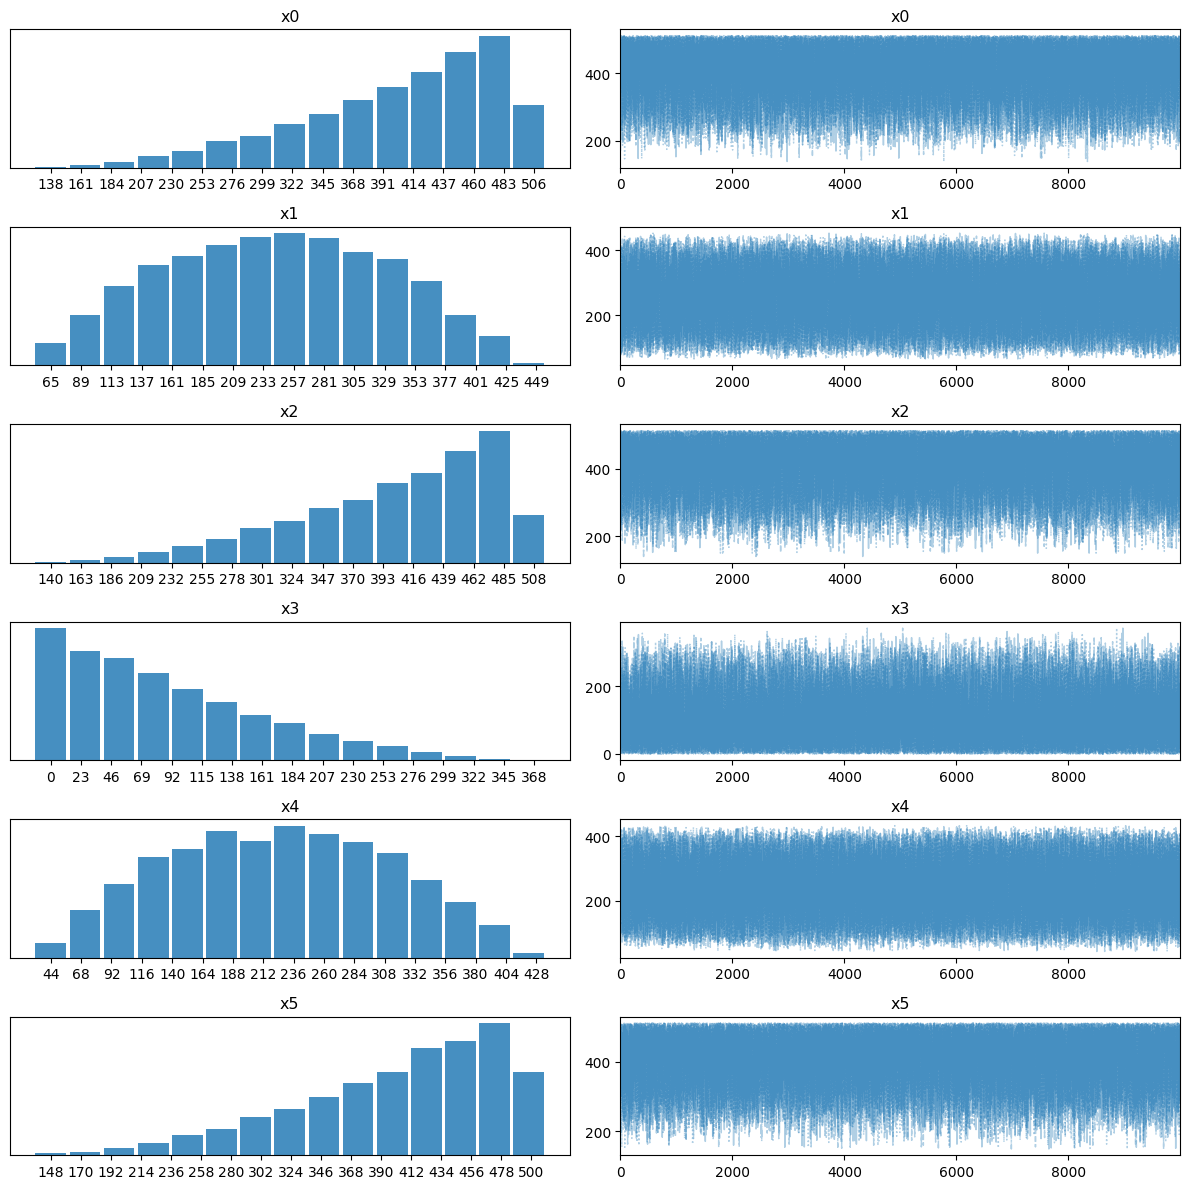

In [6]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('spur_trace_plot.png', dpi=150);

In [7]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,415.304,75.526,275.0,512.0,0.373,0.264,41032.0,40160.0,1.0
x1,256.014,87.108,100.0,408.0,0.440,0.312,39141.0,39820.0,1.0
x2,415.682,75.113,277.0,512.0,0.378,0.268,39549.0,38883.0,1.0
x3,98.151,75.708,0.0,239.0,0.376,0.266,40456.0,39532.0,1.0
x4,238.153,87.120,84.0,392.0,0.430,0.304,41143.0,39877.0,1.0
x5,414.165,74.599,278.0,512.0,0.372,0.263,39879.0,39202.0,1.0


In [8]:
num_vars = Aprime.shape[1]
num_bits = 11 # TODO: use the same variable as for input for the problem
az.to_netcdf(trace, f'roads_SAT_{num_vars}_{num_bits}.nc')

'roads_SAT_6_11.nc'